In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
## FOR BASE TPG
def runAgent(args):
    agent = args[0]
    envName = args[1]
    scoreList = args[2]
    numEpisodes = args[3] # number of times to repeat game
    numFrames = args[4] 
    gen = args[5]
    env = args[6]
    
    # skip if task already done by agent
    if agent.taskDone(envName):
        print('Agent #' + str(agent.agentNum) + ' can skip.')
        scoreList.append((agent.team.id, agent.team.outcomes))
        return

    valActs = 4
    
    # create environment object from above
    scoreTotal = 0
    for ep in range(numEpisodes):
        state = env.reset()
        scoreEp = 0
        states = []

        if numEpisodes > 1:
            for i in range(numFrames): # frame loop           
                # action selection
                act = agent.act(state)
                
                state, reward, isDone = env.step(act)
                scoreEp += reward
                
                if isDone:
                    print('win!')
                    print(states)
                    break
                    
            print('Agent #' + str(agent.agentNum) + 
              ' | Ep #' + str(ep) + ' | Score: ' + str(scoreEp))
            
        scoreTotal += scoreEp
    scoreTotal /= numEpisodes
    env.close()
    agent.reward(scoreTotal, envName)
    scoreList.append((agent.team.id, agent.team.outcomes))
    if isDone:
        return
#     else:
#         return 0

In [3]:
class Figure9:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            
            if (next == (1, 6)) or (next == (2, 6)) or (next == (3, 6)) or (next == (5, 2)) or (next == (5, 3)) or (next == (5, 4)) or (next == (5, 5)) or (next == (4, 9)) or (next == (4, 8)) or (next == (5, 8)) or (next == (6, 8)) or (next == (6, 5)) or (next == (7, 5)) or (next == (8, 5)) or (next == (9, 5)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((10, 10))
        # add barrier
        current_map[(1, 6)] = 5
        current_map[(2, 6)] = 5
        current_map[(3, 6)] = 5
        current_map[(4, 9)] = 5
        current_map[(4, 8)] = 5
        current_map[(5, 8)] = 5
        current_map[(6, 8)] = 5
        current_map[(5, 2)] = 5
        current_map[(5, 3)] = 5
        current_map[(5, 4)] = 5
        current_map[(5, 5)] = 5
        current_map[(6, 5)] = 5
        current_map[(7, 5)] = 5
        current_map[(8, 5)] = 5
        current_map[(9, 5)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
# will use Downing fig 11 for testing on this
class Figure11:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                    legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.memory = []
        self.memory_position = 0
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (1, 2)) or (next == (1, 3)) or (next == (2, 2)) or (next == (2, 3)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(1, 2)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 2)] = 5
        current_map[(2, 3)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [5]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [6]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        self.memory = []
        self.memory_position = 0
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [7]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None
    
    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    #valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
    valid_learners = [lrnr for lrnr in team.learners]

#     for test in valid_learners:
#         print(test.numTeamsReferencing)
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars)) #how does this work??
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
        
    #print(action)
    return top_learner, action

In [8]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

In [9]:
def evaluate_fitness (env_name, team, env, epsilon, alpha, discount):
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        total_reward += reward
        if isDone:
            return total_reward
        
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        if l_t.id != l_next.id:
            update(team, l_next, a_t, l_t, reward, alpha, discount)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return total_reward

In [10]:
# tpg imports
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent
# visual tools
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
# for writing
import csv
from datetime import date

In [11]:
# actions distribution tracker
# each index corresponds to its actions
# the values are the amount of times that action has been sampled
# action_counts = [0, 0, 0, 0]
# current_distribution = []

def action_distribution(counts):
    total = 0
    proportions = []
    for action in counts:
        proportion = 1 / action
        proportion = int(proportion * 10 * sum(counts))
        total += proportion
        proportions.append(proportion)
    
    return total, proportions  

# this function will sample actions in a way that is biased to the least sampled actions
def sample_action(total, proportions):
    
    sample = random.randint(1, total)
    
    if (sample > 1) and (sample <= proportions[0]):
        return 0
    elif (sample > proportions[0]) and (sample <= proportions[0] + proportions[1]):
        return 1
    elif (sample > proportions[0] + proportions[1]) and (sample <= proportions[0] + proportions[1] + proportions[2]):
        return 2
    else:
        return 3

In [12]:
# counts = [0, 0, 0, 0]
# dist_total, dist = action_distribution([1, 3, 4, 5])
# for i in range(100):
#     sample = sample_action(dist_total, dist)
#     if sample == 0:
#         counts[0] += 1
#     elif sample == 1:
#         counts[1] += 1
#     elif sample == 2:
#         counts[2] += 1
#     elif sample == 3:
#         counts[3] += 1
# print(counts)

In [13]:
action = random.randint(0, 3)
opposite = 0
if action == 0:
    opposite = 1
elif action == 2:
    opposite = 3
elif action == 3:
    opposite = 2
print(action)
print(opposite)

0
1


In [14]:
# q table helper functions
def create (agents, gen, opposite_action_samples):
    for agent in agents:
        team = agent.team
        for learner in team.learners:
            if opposite_action_samples == 0:
            # randomize actions of the learners
                action_list = [0, 1, 2, 3]

                random.shuffle(action_list)
#                 actions = random.randint(2,4)
                actions = 2
            else:
                action = random.randint(0, 3)
                opposite = 0
                if action == 0:
                    opposite = 1
                elif action == 2:
                    opposite = 3
                elif action == 3:
                    opposite = 2

                action_list = [action, opposite]
                actions = len(action_list)
            
            for i in range(actions):
                (team.q_table).append({'learner': str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
                action_counts[action_list[i]] += 1
    return action_counts

# add new learners upon evolution
def evolve (agents, lamarckian, gen, action_counts, action_dist_total, action_dist, opposite_action_samples):
    if gen % 5 == 0:
        action_dist_total, action_dist = action_distribution(action_counts)
    
    for agent in agents:
        team = agent.team
        for learner in team.learners:   
            
            found = 0
            for entry in team.q_table:
                if entry['learner'] == str(learner.id):
                    found = 1
            # found == 0 here indicates that the learner has not yet been added to the q table,
            # thus it must be a new learner, so we add it to the q table
            # if lamarckian is 1, then the new learner will inherit the characteristics of its parents
            # here, those characteristics are the parents actions with the corresponding q value
            # without lamarckian, we just assign random actions with q values set to 0
            if found == 0:
                if lamarckian == 0:
                    # let the actions converge a bit before sampling
                    if (gen > 1000000000):#if (gen > 30):
                        # new way of sampling!
                        actions = random.randint(1,4)
                        action_list = []
                        for i in range(actions):
                            action_list.append(sample_action(action_dist_total, action_dist))
                    else:
                        if opposite_action_samples == 0:
                            action_list = [0, 1, 2, 3]
                            random.shuffle(action_list)
#                             actions = random.randint(1,4)
                            actions = 2
                        else: 
                            action = random.randint(0, 3)
                            opposite = 0
                            if action == 0:
                                opposite = 1
                            elif action == 2:
                                opposite = 3
                            elif action == 3:
                                opposite = 2

                            action_list = [action, opposite]
                            actions = len(action_list)
                        
                    for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lamarck':0})
                            action_counts[entry['action']] += 1
                            
                elif lamarckian == 1:
                    parent_actions = []

                    if team.parentTeam:
                        # grab the actions from the parent learner
                        parent_actions = [entry for entry in (team.parentTeam).q_table if entry['learner'] == str(learner.id) and entry['gen'] == gen-1] 

                    if parent_actions:
                        for entry in parent_actions:
                            (team.q_table).append({'learner':str(learner.id), 'action':entry['action'], 'q':entry['q'], 'gen':gen, 'lamarck':1})
                            # increment the sampled actions count
                            action_counts[entry['action']] += 1
                    else:
                        if opposite_action_samples == 0:
#                         # let the actions converge a bit before sampling
                            if (gen > 10000000):
                                # new way of sampling!
                                actions = random.randint(2,4)
                                actions = 2
                                action_list = []
                                for i in range(actions):
                                    action_list.append(sample_action(action_dist_total, action_dist))
                            else:
                                action_list = [0, 1, 2, 3]
                                random.shuffle(action_list)
                                actions = random.randint(2,4)
                        else:
                            action = random.randint(0, 3)
                            opposite = 0
                            if action == 0:
                                opposite = 1
                            elif action == 2:
                                opposite = 3
                            elif action == 3:
                                opposite = 2
                            action_list = [action, opposite]
                            actions = len(action_list)

                        for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lamarck':0})
                            action_counts[entry['action']] += 1

    return action_counts, action_dist, action_dist_total


def clean (agents, current_gen):
    for agent in agents:
        team = agent.team
        for entry in team.q_table:
            if entry['gen'] < (current_gen):
                (team.q_table).remove(entry)

In [15]:
# obstacles: (1, 6) & (2, 6) & (3, 6) & (3, 6) & (5, 2) & (5, 3) & (5, 4) & (5, 5) & (4, 9) & (4, 8) & (5, 8) & (6, 8) & (6, 5) & (7, 5) & (8, 5) & (9, 5)
def fig9_sample_starts ():
    x = random.randint(0, 9)
    y = random.randint(0, 9)
    start = (x, y)
    if (start == (1, 6)) or (start == (2, 6)) or (start == (3, 6)) or (start == (5, 2)) or (start == (5, 3)) or (start == (5, 4)) or (start == (5, 5)) or (start == (4, 9)) or (start == (4, 8)) or (start == (5, 8)) or (start == (6, 8)) or (start == (6, 5)) or (start == (7, 5)) or (start == (8, 5)) or (start == (9, 5)):
        start = fig11_sample_starts()
    return start

In [16]:
# obstacles: (1, 2) & (1, 3) & (2, 2) & (2, 3)
def fig11_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (1, 2)) or (start == (1, 3)) or (start == (2, 2)) or (start == (2, 3)):
        start = fig11_sample_starts()
    return start

In [17]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (2, 4)
def fig12_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (2, 4)):
        start = fig12_sample_starts()
    return start

In [18]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (3, 3)  & (3, 4)
def fig13_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (3, 3)) or (start == (3, 4)):
        start = fig13_sample_starts()
    return start

In [19]:
runs = 20
num_gen = 100
lamarckian = 0
save = 0
put_away = 1
base_gp = 0
random_starts = 0
opposite_action_samples = 0

actions = 4
teamPopSize = 50
pActAtom = 1.0

pLrnDel=0.3#0.7
pLrnAdd=0.2#0.7
pLrnMut=0.7#0.3
pProgMut=0.5#0.66
pActMut=0.0#0.7#0.33
pInstDel=0.5
pInstAdd=0.5
pInstSwp=0.5
pInstMut=0.5

initMaxProgSize = 24 #64
nRegisters = 4 #8
nActRegisters = 0
initMaxActProgSize = 0

initMaxTeamSize = 2
maxTeamSize = 4#5#4
gap = 0.5

for run in range(runs):
    print(run)
    trainer = Trainer(actions=actions, teamPopSize=teamPopSize, pActAtom=pActAtom, 
                      nRegisters=nRegisters, initMaxProgSize=initMaxProgSize, 
                      initMaxActProgSize=initMaxActProgSize, nActRegisters=nActRegisters,
                      
                        pLrnDel=pLrnDel, pLrnAdd=pLrnAdd, pLrnMut=pLrnMut, pProgMut=pProgMut, pActMut=pActMut,
                        pInstDel=pInstDel, pInstAdd=pInstAdd, pInstSwp=pInstSwp, pInstMut=pInstMut,
                      
                      initMaxTeamSize=initMaxTeamSize, maxTeamSize=maxTeamSize, gap=gap) 

    # init environment
    memorySize = 20
    legalMove = 0.1
    illegalMove = -0.01
    outOfBounds = -0.01
    memoryRepeat = -0.01
    goalReached = 100

#     envName = 'randomstartsfig9'
#     envName = 'fig9'
#     env = Figure9(10, 10, (5, 9), (9, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
    envName = 'fig11'
#     envName = 'basegpfig11'
#     envName = 'randomstartsfig11'
#     envName = 'randomstartsfig12'
#     envName = 'randomstartsfig13'
    env = Figure11(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'fig12'
#     envName = 'basegpfig12'
#     env = Figure12(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'fig13'
#     envName = 'oppositesamplesfig13'
#     envName = 'basegpfig13'
#     envName = 'randomstartsbasegpfig13'
#     env = Figure13(5, 5, (2, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig12'
#     env = Figure12(5, 5, (0, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig13'
#     env = Figure13(5, 5, (2, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

    starts = []

    # init tracking tools
    allScores = []
#     num_gen = 50
    champion = None
    best_score = -10000000

    # parameters
    alpha = 0.05#0.1
    epsilon = 0.1
    discount = 0.45#0.9

    # init samplers
    action_counts = [1, 1, 1, 1]
    action_dist = [0, 0, 0, 0]
    action_dist_total = 0

    for gen in range(num_gen):
        
        # keep random starts the same for each generation 
        if random_starts == 1:
            if envName == 'randomstartsfig11':
                start = fig11_sample_starts()
                starts.append(start)
                env = Figure11(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif envName == 'randomstartsfig12':
                start = fig12_sample_starts()
                starts.append(start)
                env = Figure12(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif (envName == 'randomstartsfig13') or (envName == 'randomstartsbasegpfig13'):
                start = fig13_sample_starts()
                starts.append(start)
                env = Figure13(5, 5, (2, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif (envName == 'randomstartsfig9'):
                start = fig9_sample_starts()
                starts.append(start)
                env = Figure9(10, 10, (5, 9), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

        agent_track = 0
        print(gen)
        # keep track of starts
        if (random_starts == 1):
            print(start)
        best_score = -10000000
        scoreList = []
        #print('gen' + str(gen))
        agents = trainer.getAgents()

        # update q table with new populations
        if base_gp != 1:
            if gen == 0:
                actions_counts = create(agents, gen, opposite_action_samples)
            else:
                action_counts, action_dist, action_dist_total = evolve(agents, lamarckian, gen, 
                                                                       action_counts, action_dist_total, 
                                                                       action_dist, opposite_action_samples)
        for agent in agents:  
            fitnesses = []
            agent.zeroRegisters()
            team = agent.team
            env.reset()
            
            # for just running normal tpg
            if base_gp == 1:
                runAgent([agent, envName, scoreList, 10, 100, gen, env])
                
                if (scoreList[agent_track][1][envName] > best_score): #and (run != 0):
                    best_score = scoreList[agent_track][1][envName]
                    champ_agent = agent
                agent_track += 1
                
            else:
                fitness = evaluate_fitness(envName, team, env, epsilon, alpha, discount)
                fitnesses.append(fitness)
                # save champion for each run
                if fitness > best_score:
                    best_score = fitness
                    champ_agent = agent

                # apply scores
                agent.reward(fitness, envName)
                scoreList.append((agent.team.id, agent.team.outcomes))

        # evolution :)
        teams = trainer.applyScores(scoreList)
        trainer.evolve(tasks=[envName])

        # scores!
        scoreStats = trainer.fitnessStats

        # find medians
        if base_gp == 0:
            median = stat.median(fitnesses)
            print(median)
            allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average'], median))
        else:
            allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average']))
        
        # save champ for this generation
        #champ_agent.saveToFile('champions/'+str(gen)+'.pk1')
        
        if put_away == 1:
            print(champ_agent.team.q_table)
            champ_agent.saveToFile(f'saved-runs/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}_{gen}.pk1')
            if random_starts == 1:
                df = pd.DataFrame({
                    'starts': starts
                })
                df.to_csv(f'saved-figures/{envName}_starts_{gen}.csv')

        print('--------------')
        print(gen)
        print('agent: ' + str(scoreStats['max']))
        print('my:  ' + str(best_score))
        
    # collect average and max scores to save to csv
    if save == 1:
        averages = []
        maxes = []
        medians = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    
            medians.append(score[3])

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
            'median_score': medians
        })

        if lamarckian == 0:
            df.to_csv('../results/'+str(envName)+'/qtpg/'+str(run)+'.csv')
        else:
            df.to_csv('../results/'+str(envName)+'/lqtpg/'+str(run)+'.csv')
    
    # more advanced saving
    if put_away == 1:
        if base_gp == 0:
            averages = []
            maxes = []
            medians = []
            for score in allScores:
                averages.append(score[2])
                maxes.append(score[1])    
                medians.append(score[3])

            df = pd.DataFrame({
                'average_score': averages,
                'max_score': maxes,
                'median_score': medians,
            })

            df.to_csv(f'saved-figures/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}.csv')
        else:
            averages = []
            maxes = []
            for score in allScores:
                averages.append(score[2])
                maxes.append(score[1])    

            df = pd.DataFrame({
                'average_score': averages,
                'max_score': maxes,
            })

            df.to_csv(f'saved-figures/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}.csv')


0
0
-0.5200000000000002
[{'learner': '4bec804c-8c7e-4dfa-b0b0-1291455612aa', 'action': 2, 'q': 0.013424308512566764, 'gen': 0}, {'learner': '4bec804c-8c7e-4dfa-b0b0-1291455612aa', 'action': 1, 'q': -0.001, 'gen': 0}, {'learner': 'c45ba163-bfd4-43c4-b9b5-4674916c7be2', 'action': 0, 'q': 0.01551113199424024, 'gen': 0}, {'learner': 'c45ba163-bfd4-43c4-b9b5-4674916c7be2', 'action': 3, 'q': -0.0005, 'gen': 0}]
--------------
0
agent: 100.69
my:  100.69
1
0.45999999999999996
[{'learner': '4bec804c-8c7e-4dfa-b0b0-1291455612aa', 'action': 2, 'q': 0.02934219104320275, 'gen': 0}, {'learner': '4bec804c-8c7e-4dfa-b0b0-1291455612aa', 'action': 1, 'q': 0.004500846502561373, 'gen': 0}, {'learner': 'c45ba163-bfd4-43c4-b9b5-4674916c7be2', 'action': 0, 'q': 0.02622141652856178, 'gen': 0}, {'learner': 'c45ba163-bfd4-43c4-b9b5-4674916c7be2', 'action': 3, 'q': 0.004882227692815889, 'gen': 0}]
--------------
1
agent: 101.08
my:  101.08
2
0.14999999999999963
[{'learner': '4bec804c-8c7e-4dfa-b0b0-1291455612aa

100.97999999999999
[{'learner': 'c772133a-b419-490d-8077-59e1870e94ca', 'action': 3, 'q': 0.008212872344707352, 'gen': 12, 'lamarck': 0}, {'learner': 'c772133a-b419-490d-8077-59e1870e94ca', 'action': 2, 'q': 0.03766394905660641, 'gen': 12, 'lamarck': 0}, {'learner': 'b02b3f26-f5a6-4339-96df-6f72fb41f0ae', 'action': 0, 'q': 0.03239336843726945, 'gen': 12, 'lamarck': 0}, {'learner': 'b02b3f26-f5a6-4339-96df-6f72fb41f0ae', 'action': 1, 'q': 0.018607685599322337, 'gen': 12, 'lamarck': 0}]
--------------
18
agent: 101.25999999999999
my:  101.25999999999999
19
100.67999999999999
[{'learner': 'a98275ed-3170-4731-84f7-994910ecf653', 'action': 1, 'q': 0.03550432299236658, 'gen': 17, 'lamarck': 0}, {'learner': 'a98275ed-3170-4731-84f7-994910ecf653', 'action': 3, 'q': 0.009541783250376315, 'gen': 17, 'lamarck': 0}, {'learner': 'def95460-39d5-44c6-a708-24b8384f7297', 'action': 3, 'q': 0, 'gen': 17, 'lamarck': 0}, {'learner': 'def95460-39d5-44c6-a708-24b8384f7297', 'action': 0, 'q': 0.0339541647264

4.4499999999999975
[{'learner': '88dcfb34-c87c-49d1-9e83-fafa42132633', 'action': 0, 'q': 0.08523858584755012, 'gen': 19, 'lamarck': 0}, {'learner': '88dcfb34-c87c-49d1-9e83-fafa42132633', 'action': 3, 'q': 0.010017852951609113, 'gen': 19, 'lamarck': 0}, {'learner': 'e46af7fe-4010-46d5-9cdb-c9c956e35b39', 'action': 3, 'q': 0, 'gen': 19, 'lamarck': 0}, {'learner': 'e46af7fe-4010-46d5-9cdb-c9c956e35b39', 'action': 2, 'q': 0.07446494772478486, 'gen': 19, 'lamarck': 0}]
--------------
30
agent: 101.03
my:  101.03
31
100.74
[{'learner': 'affb59a9-8c84-4134-b3e3-51080d0c73fc', 'action': 0, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'affb59a9-8c84-4134-b3e3-51080d0c73fc', 'action': 2, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': '705eebc3-797d-494a-81c0-7668715e330e', 'action': 1, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': '705eebc3-797d-494a-81c0-7668715e330e', 'action': 0, 'q': 0.0264908109375, 'gen': 26, 'lamarck': 0}, {'learner': '592a018b-00cd-4be0-a3ba-7ac9d835e5da', 'action': 3,

-0.2800000000000001
[{'learner': '20cc2252-c280-498a-b09d-7665356b187b', 'action': 1, 'q': -0.00028596572529413134, 'gen': 34, 'lamarck': 0}, {'learner': '20cc2252-c280-498a-b09d-7665356b187b', 'action': 2, 'q': 0.06964165664233328, 'gen': 34, 'lamarck': 0}, {'learner': '27e5806c-7d94-4170-80dd-cea5682256a0', 'action': 0, 'q': 0, 'gen': 34, 'lamarck': 0}, {'learner': '27e5806c-7d94-4170-80dd-cea5682256a0', 'action': 3, 'q': 0, 'gen': 34, 'lamarck': 0}, {'learner': '4666d635-1bfd-4078-9fab-511ed1c8543c', 'action': 0, 'q': 0.07071977077328251, 'gen': 34, 'lamarck': 0}, {'learner': '4666d635-1bfd-4078-9fab-511ed1c8543c', 'action': 1, 'q': 0.00601869333372167, 'gen': 34, 'lamarck': 0}]
--------------
42
agent: 101.25
my:  101.25
43
-0.31
[{'learner': '03cc239d-95c8-422e-8eb5-49b5e225dcaa', 'action': 0, 'q': 0.006194344465891052, 'gen': 25, 'lamarck': 0}, {'learner': '03cc239d-95c8-422e-8eb5-49b5e225dcaa', 'action': 2, 'q': 0.07417650905825185, 'gen': 25, 'lamarck': 0}, {'learner': 'a19437f

-0.5400000000000001
[{'learner': '9bfbd814-15a6-4019-b43a-f4e8418b2d0f', 'action': 1, 'q': 0.0060006321572889515, 'gen': 38, 'lamarck': 0}, {'learner': '9bfbd814-15a6-4019-b43a-f4e8418b2d0f', 'action': 2, 'q': 0.05156427016298831, 'gen': 38, 'lamarck': 0}, {'learner': '705eebc3-797d-494a-81c0-7668715e330e', 'action': 1, 'q': 0.011650811312182726, 'gen': 38, 'lamarck': 0}, {'learner': '705eebc3-797d-494a-81c0-7668715e330e', 'action': 0, 'q': 0.09438517395892987, 'gen': 38, 'lamarck': 0}, {'learner': 'd6632c4f-cb96-4df0-a576-b9268d3114d9', 'action': 2, 'q': 0, 'gen': 38, 'lamarck': 0}, {'learner': 'd6632c4f-cb96-4df0-a576-b9268d3114d9', 'action': 3, 'q': 0, 'gen': 38, 'lamarck': 0}]
--------------
54
agent: 101.08
my:  101.08
55
4.419999999999997
[{'learner': '896df2b4-fb13-47d5-a5ac-8d0c4cafe5f9', 'action': 0, 'q': 0, 'gen': 53, 'lamarck': 0}, {'learner': '896df2b4-fb13-47d5-a5ac-8d0c4cafe5f9', 'action': 3, 'q': 0.013697775656342493, 'gen': 53, 'lamarck': 0}, {'learner': 'b6156084-60eb-

100.97999999999999
[{'learner': '631c6cc9-2ed7-4b0b-9d23-9297ec4e6aa7', 'action': 1, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '631c6cc9-2ed7-4b0b-9d23-9297ec4e6aa7', 'action': 0, 'q': 0.016121699697650472, 'gen': 68, 'lamarck': 0}, {'learner': '7cf9b98b-ba95-4fe1-ae20-0f138eb6367c', 'action': 3, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '7cf9b98b-ba95-4fe1-ae20-0f138eb6367c', 'action': 2, 'q': 0.019527585939970695, 'gen': 68, 'lamarck': 0}]
--------------
69
agent: 101.14
my:  101.14
70
0.27
[{'learner': '04e33983-0e12-4248-aa63-39079a4ae8ed', 'action': 0, 'q': 0.09450116347273663, 'gen': 62, 'lamarck': 0}, {'learner': '04e33983-0e12-4248-aa63-39079a4ae8ed', 'action': 1, 'q': 0.011274110929012503, 'gen': 62, 'lamarck': 0}, {'learner': 'b3f725c8-1476-4c5e-bd87-f245a87a8c3a', 'action': 0, 'q': 0, 'gen': 62, 'lamarck': 0}, {'learner': 'b3f725c8-1476-4c5e-bd87-f245a87a8c3a', 'action': 3, 'q': 0.03997354790044889, 'gen': 62, 'lamarck': 0}, {'learner': '4c69b07c-8f34-441f-94da-6f45b

0.8499999999999991
[{'learner': 'b2705c36-1c31-4617-9d09-e7c97dafd183', 'action': 2, 'q': 0.02888435370934893, 'gen': 82, 'lamarck': 0}, {'learner': 'b2705c36-1c31-4617-9d09-e7c97dafd183', 'action': 0, 'q': 0.005208125000000001, 'gen': 82, 'lamarck': 0}, {'learner': '96db5eb0-f263-40b3-9685-5e0b909c7c9b', 'action': 2, 'q': 0, 'gen': 82, 'lamarck': 0}, {'learner': '96db5eb0-f263-40b3-9685-5e0b909c7c9b', 'action': 1, 'q': 0.01898015881748217, 'gen': 82, 'lamarck': 0}, {'learner': '288b06a4-cb19-4f6b-a47e-03daf72378b0', 'action': 1, 'q': 0.00534594130027462, 'gen': 82, 'lamarck': 0}, {'learner': '288b06a4-cb19-4f6b-a47e-03daf72378b0', 'action': 0, 'q': 0.02514359547182076, 'gen': 82, 'lamarck': 0}]
--------------
83
agent: 101.25
my:  101.25
84
3.4899999999999993
[{'learner': '2be6266c-445a-4465-b658-50275b938fef', 'action': 2, 'q': 0.007379507560785184, 'gen': 66, 'lamarck': 0}, {'learner': '2be6266c-445a-4465-b658-50275b938fef', 'action': 0, 'q': 0.08884401634465137, 'gen': 66, 'lamarck

2.1700000000000004
[{'learner': 'cf67aa0c-5ff6-4c39-b583-cfc75b6bfa47', 'action': 3, 'q': 0, 'gen': 98, 'lamarck': 0}, {'learner': 'cf67aa0c-5ff6-4c39-b583-cfc75b6bfa47', 'action': 2, 'q': 0, 'gen': 98, 'lamarck': 0}, {'learner': '76b47943-8e86-499c-9dd6-b04357decfc5', 'action': 1, 'q': 0, 'gen': 98, 'lamarck': 0}, {'learner': '76b47943-8e86-499c-9dd6-b04357decfc5', 'action': 0, 'q': 0.005000000000000001, 'gen': 98, 'lamarck': 0}, {'learner': 'fab136c0-4341-461c-a8b2-47213f3c5fba', 'action': 0, 'q': 0, 'gen': 98, 'lamarck': 0}, {'learner': 'fab136c0-4341-461c-a8b2-47213f3c5fba', 'action': 3, 'q': 0, 'gen': 98, 'lamarck': 0}]
--------------
98
agent: 100.99
my:  100.99
99
2.7799999999999994
[{'learner': 'fe7875f6-b086-4aad-b97c-8a67f7142607', 'action': 3, 'q': 0, 'gen': 88, 'lamarck': 0}, {'learner': 'fe7875f6-b086-4aad-b97c-8a67f7142607', 'action': 0, 'q': 0.04221855015658009, 'gen': 88, 'lamarck': 0}, {'learner': 'b99e1a4e-5bd7-45df-a758-d180fbf93eb3', 'action': 3, 'q': 0, 'gen': 88, 

-0.04000000000000001
[{'learner': 'db52759a-56e1-405e-83c2-d23186792a4d', 'action': 1, 'q': 0.011138267759460033, 'gen': 11, 'lamarck': 0}, {'learner': 'db52759a-56e1-405e-83c2-d23186792a4d', 'action': 0, 'q': 0.031982492373962654, 'gen': 11, 'lamarck': 0}, {'learner': '7fda71e8-2fb8-41ec-a47f-db9bbff24245', 'action': 3, 'q': 0, 'gen': 11, 'lamarck': 0}, {'learner': '7fda71e8-2fb8-41ec-a47f-db9bbff24245', 'action': 2, 'q': 0, 'gen': 11, 'lamarck': 0}, {'learner': '26fe7930-c293-45eb-959d-4ecdf6711716', 'action': 2, 'q': 0.05062544385115547, 'gen': 11, 'lamarck': 0}, {'learner': '26fe7930-c293-45eb-959d-4ecdf6711716', 'action': 3, 'q': 0.009450519934671175, 'gen': 11, 'lamarck': 0}]
--------------
14
agent: 101.28
my:  101.28
15
-0.3100000000000001
[{'learner': '5bbc1168-224e-4299-a5df-afb4bf445908', 'action': 1, 'q': 0.004921285526374199, 'gen': 12, 'lamarck': 0}, {'learner': '5bbc1168-224e-4299-a5df-afb4bf445908', 'action': 2, 'q': -0.0004133897515488308, 'gen': 12, 'lamarck': 0}, {'l

2.5799999999999996
[{'learner': '5f2e28e4-d06f-43a1-a2bf-a6915a3ad7f1', 'action': 1, 'q': 0.01680105786904056, 'gen': 6, 'lamarck': 0}, {'learner': '5f2e28e4-d06f-43a1-a2bf-a6915a3ad7f1', 'action': 2, 'q': 0.13433755481814869, 'gen': 6, 'lamarck': 0}, {'learner': 'db52759a-56e1-405e-83c2-d23186792a4d', 'action': 3, 'q': 0.045142697341585346, 'gen': 6, 'lamarck': 0}, {'learner': 'db52759a-56e1-405e-83c2-d23186792a4d', 'action': 0, 'q': 0.0951338532033527, 'gen': 6, 'lamarck': 0}]
--------------
29
agent: 101.11999999999999
my:  101.11999999999999
30
100.69999999999999
[{'learner': '2a4540fc-8d1e-4dab-9aca-801e5985de5f', 'action': 3, 'q': 0.029637074691811212, 'gen': 30, 'lamarck': 0}, {'learner': '2a4540fc-8d1e-4dab-9aca-801e5985de5f', 'action': 0, 'q': -0.0003964356180275611, 'gen': 30, 'lamarck': 0}, {'learner': 'fb82c418-ef81-4b81-ad9d-288d3906538f', 'action': 2, 'q': 0.029427385375345054, 'gen': 30, 'lamarck': 0}, {'learner': 'fb82c418-ef81-4b81-ad9d-288d3906538f', 'action': 0, 'q':

1.6600000000000001
[{'learner': '15a1b52e-061f-468f-891b-3df3d5861bdc', 'action': 3, 'q': 0.07880582797002669, 'gen': 22, 'lamarck': 0}, {'learner': '15a1b52e-061f-468f-891b-3df3d5861bdc', 'action': 0, 'q': 0.037199850508601945, 'gen': 22, 'lamarck': 0}, {'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 2, 'q': 0.016313097319997985, 'gen': 22, 'lamarck': 0}, {'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 0, 'q': 0.12006265858483745, 'gen': 22, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 2, 'q': 0.11282488680710528, 'gen': 22, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 0, 'q': -0.002167492742508186, 'gen': 22, 'lamarck': 0}]
--------------
41
agent: 101.22999999999999
my:  101.22999999999999
42
100.69999999999999
[{'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 3, 'q': -0.0008874999999999999, 'gen': 31, 'lamarck': 0}, {'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 1

-0.7500000000000006
[{'learner': '15a1b52e-061f-468f-891b-3df3d5861bdc', 'action': 3, 'q': 0.08496653349968505, 'gen': 22, 'lamarck': 0}, {'learner': '15a1b52e-061f-468f-891b-3df3d5861bdc', 'action': 0, 'q': 0.057421351499368785, 'gen': 22, 'lamarck': 0}, {'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 2, 'q': 0.027900184129369534, 'gen': 22, 'lamarck': 0}, {'learner': '7c7133dd-36ae-41f8-b703-8acddb49d977', 'action': 0, 'q': 0.1326873653258119, 'gen': 22, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 2, 'q': 0.12377737101447557, 'gen': 22, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 0, 'q': -0.0015074118482413397, 'gen': 22, 'lamarck': 0}]
--------------
53
agent: 101.19
my:  101.19
54
100.58
[{'learner': '94eeb1b9-c804-40ff-b1c0-508c4fe30123', 'action': 0, 'q': 0.05014968034692162, 'gen': 54, 'lamarck': 0}, {'learner': '94eeb1b9-c804-40ff-b1c0-508c4fe30123', 'action': 2, 'q': 0, 'gen': 54, 'lamarck': 0}, {'

1.6700000000000004
[{'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 3, 'q': 0.010520345486050235, 'gen': 55, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 0, 'q': 0.09917655325783098, 'gen': 55, 'lamarck': 0}, {'learner': 'e5b89866-b628-4736-a469-a02ca09849c7', 'action': 1, 'q': 0.005764671494270959, 'gen': 55, 'lamarck': 0}, {'learner': 'e5b89866-b628-4736-a469-a02ca09849c7', 'action': 2, 'q': 0.050285424178654003, 'gen': 55, 'lamarck': 0}, {'learner': '40d38d57-0350-44c5-9beb-909a46aff6d1', 'action': 2, 'q': -0.0007565091492917538, 'gen': 55, 'lamarck': 0}, {'learner': '40d38d57-0350-44c5-9beb-909a46aff6d1', 'action': 1, 'q': -0.0006786559469352703, 'gen': 55, 'lamarck': 0}]
--------------
65
agent: 101.44
my:  101.44
66
0.59
[{'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 3, 'q': 0.010520345486050235, 'gen': 55, 'lamarck': 0}, {'learner': '1db85f37-277c-4b66-8478-2fb150c27f8f', 'action': 0, 'q': 0.10285058037928746, 'gen': 

100.63
[{'learner': 'eb1b0319-2bae-4ea1-8c96-f55e73e69d26', 'action': 3, 'q': 0.004836325329144507, 'gen': 74, 'lamarck': 0}, {'learner': 'eb1b0319-2bae-4ea1-8c96-f55e73e69d26', 'action': 1, 'q': 0.04305737327567026, 'gen': 74, 'lamarck': 0}, {'learner': 'def0f53e-e09e-4c22-be83-063dfbbe9eea', 'action': 2, 'q': 0.025082024805007888, 'gen': 74, 'lamarck': 0}, {'learner': 'def0f53e-e09e-4c22-be83-063dfbbe9eea', 'action': 3, 'q': -0.001, 'gen': 74, 'lamarck': 0}, {'learner': 'c2b1fd0b-d88a-46cf-b1c2-d8aad64433db', 'action': 1, 'q': 0, 'gen': 74, 'lamarck': 0}, {'learner': 'c2b1fd0b-d88a-46cf-b1c2-d8aad64433db', 'action': 0, 'q': 0.055397286289480194, 'gen': 74, 'lamarck': 0}]
--------------
77
agent: 101.50999999999999
my:  101.50999999999999
78
-0.3199999999999999
[{'learner': 'eb1b0319-2bae-4ea1-8c96-f55e73e69d26', 'action': 3, 'q': 0.004836325329144507, 'gen': 74, 'lamarck': 0}, {'learner': 'eb1b0319-2bae-4ea1-8c96-f55e73e69d26', 'action': 1, 'q': 0.04797597731331847, 'gen': 74, 'lamar

-0.7600000000000005
[{'learner': '014b8e5e-5246-4130-aac0-e69ffe66a3bf', 'action': 2, 'q': 0.005256727557535187, 'gen': 90, 'lamarck': 0}, {'learner': '014b8e5e-5246-4130-aac0-e69ffe66a3bf', 'action': 3, 'q': 0.04019313599160196, 'gen': 90, 'lamarck': 0}, {'learner': 'cecbbc5b-fa70-4ba6-9ff8-2a42294530f8', 'action': 2, 'q': 0.005112500000000001, 'gen': 90, 'lamarck': 0}, {'learner': 'cecbbc5b-fa70-4ba6-9ff8-2a42294530f8', 'action': 0, 'q': 0, 'gen': 90, 'lamarck': 0}, {'learner': 'bfc7d5a1-53df-4f2c-a226-069a6039a468', 'action': 2, 'q': 0.0444776023593094, 'gen': 90, 'lamarck': 0}, {'learner': 'bfc7d5a1-53df-4f2c-a226-069a6039a468', 'action': 0, 'q': 0.003853781250000001, 'gen': 90, 'lamarck': 0}]
--------------
90
agent: 102.58
my:  102.58
91
-0.1600000000000004
[{'learner': 'e3dc7979-13ed-43fb-9759-1fde74ccb37d', 'action': 1, 'q': 0.037446607648895854, 'gen': 91, 'lamarck': 0}, {'learner': 'e3dc7979-13ed-43fb-9759-1fde74ccb37d', 'action': 2, 'q': 0, 'gen': 91, 'lamarck': 0}, {'learne

--------------
2
agent: 100.8
my:  100.8
3
-0.6300000000000004
[{'learner': 'd596886d-3134-4949-9214-b6230e69eeee', 'action': 0, 'q': 0, 'gen': 3, 'lamarck': 0}, {'learner': 'd596886d-3134-4949-9214-b6230e69eeee', 'action': 3, 'q': -0.0008874999999999999, 'gen': 3, 'lamarck': 0}, {'learner': 'c4e5ccbd-02c7-4c3a-93b3-89482f73047a', 'action': 1, 'q': 0, 'gen': 3, 'lamarck': 0}, {'learner': 'c4e5ccbd-02c7-4c3a-93b3-89482f73047a', 'action': 2, 'q': 0.009750000000000002, 'gen': 3, 'lamarck': 0}]
--------------
3
agent: 101.16999999999999
my:  101.16999999999999
4
-0.05000000000000049
[{'learner': 'b0f39ff8-1bce-4cee-90de-c7a2e5ec6b0d', 'action': 0, 'q': 0.004292843906250001, 'gen': 4, 'lamarck': 0}, {'learner': 'b0f39ff8-1bce-4cee-90de-c7a2e5ec6b0d', 'action': 2, 'q': -0.0008874999999999999, 'gen': 4, 'lamarck': 0}, {'learner': 'ab21e6e0-f7da-4171-b2a4-f48bb16e7673', 'action': 0, 'q': 0, 'gen': 4, 'lamarck': 0}, {'learner': 'ab21e6e0-f7da-4171-b2a4-f48bb16e7673', 'action': 2, 'q': 0.0048639

--------------
14
agent: 101.19
my:  101.19
15
-0.5400000000000001
[{'learner': '9a5d62db-c118-47db-a2cc-fc268112b405', 'action': 3, 'q': 0, 'gen': 12, 'lamarck': 0}, {'learner': '9a5d62db-c118-47db-a2cc-fc268112b405', 'action': 0, 'q': 0.030336632579108246, 'gen': 12, 'lamarck': 0}, {'learner': 'aa3c2c5b-f733-4224-b7e2-765530d0eb69', 'action': 2, 'q': 0, 'gen': 12, 'lamarck': 0}, {'learner': 'aa3c2c5b-f733-4224-b7e2-765530d0eb69', 'action': 1, 'q': 0.019157873069597958, 'gen': 12, 'lamarck': 0}, {'learner': '3cd3257e-8c1c-48a4-a49a-45509d9c5845', 'action': 3, 'q': 0, 'gen': 12, 'lamarck': 0}, {'learner': '3cd3257e-8c1c-48a4-a49a-45509d9c5845', 'action': 2, 'q': 0.018807151902392336, 'gen': 12, 'lamarck': 0}]
--------------
15
agent: 101.19
my:  101.19
16
100.72
[{'learner': '9a5d62db-c118-47db-a2cc-fc268112b405', 'action': 3, 'q': 0, 'gen': 12, 'lamarck': 0}, {'learner': '9a5d62db-c118-47db-a2cc-fc268112b405', 'action': 0, 'q': 0.038070152805800436, 'gen': 12, 'lamarck': 0}, {'learner

2.7799999999999994
[{'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 3, 'q': 0.045163252255265324, 'gen': 28, 'lamarck': 0}, {'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 1, 'q': 0.00016042965790977922, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 0, 'q': -0.00031476089087554876, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 2, 'q': 0.051574651462656856, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 0, 'q': 0.020878018187653825, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 1, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 0, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 2, 'q': 0, 'gen': 28, 'lamarck': 0}]
--------------
28
agent: 102.86999999999999
my:  102.86999999999999
29
4.309999999999998

--------------
37
agent: 102.61999999999999
my:  102.61999999999999
38
-0.1600000000000004
[{'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 3, 'q': 0.12187306990120794, 'gen': 28, 'lamarck': 0}, {'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 1, 'q': 0.004737896089439297, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 0, 'q': 0.032091748440438536, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 2, 'q': 0.13276866612071872, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 0, 'q': 0.09119414441929088, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 1, 'q': 0.028128290054170998, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 0, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 2, 'q': 0, 'gen': 28, 'lamarck': 0}]
-----

--------------
47
agent: 102.36999999999999
my:  102.36999999999999
48
2.7799999999999994
[{'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 3, 'q': 0.14707861520193852, 'gen': 28, 'lamarck': 0}, {'learner': 'eae60702-14c8-49c5-8336-4c30c0831969', 'action': 1, 'q': 0.019351203340521008, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 0, 'q': 0.038088749141412186, 'gen': 28, 'lamarck': 0}, {'learner': '80341f06-e22e-4345-9940-ff4182c03b00', 'action': 2, 'q': 0.1469330158021439, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 0, 'q': 0.10727208999455086, 'gen': 28, 'lamarck': 0}, {'learner': 'f4b573a7-7e23-4454-aea2-1e9568d7e2e5', 'action': 1, 'q': 0.04158966622890226, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 0, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f1b17467-0a7d-4688-834b-0e47a103d225', 'action': 2, 'q': 0, 'gen': 28, 'lamarck': 0}]
--------

--------------
58
agent: 102.91999999999999
my:  102.91999999999999
59
100.55
[{'learner': '4dbce317-3bcf-4776-9c60-a3a04b1111fe', 'action': 2, 'q': 0.006627162662892113, 'gen': 58, 'lamarck': 0}, {'learner': '4dbce317-3bcf-4776-9c60-a3a04b1111fe', 'action': 3, 'q': 0.06359212367092519, 'gen': 58, 'lamarck': 0}, {'learner': '520e03e4-58f9-4d24-abd2-c6204c4b2ab4', 'action': 2, 'q': 0.07400478089600776, 'gen': 58, 'lamarck': 0}, {'learner': '520e03e4-58f9-4d24-abd2-c6204c4b2ab4', 'action': 3, 'q': 0.009899800135807607, 'gen': 58, 'lamarck': 0}, {'learner': '195d8561-cbe7-42cb-a642-f0827a4c827c', 'action': 0, 'q': 0.025806583366464186, 'gen': 58, 'lamarck': 0}, {'learner': '195d8561-cbe7-42cb-a642-f0827a4c827c', 'action': 1, 'q': -0.001, 'gen': 58, 'lamarck': 0}, {'learner': '067fecc8-9803-4406-a796-042711ce3875', 'action': 3, 'q': 0, 'gen': 58, 'lamarck': 0}, {'learner': '067fecc8-9803-4406-a796-042711ce3875', 'action': 0, 'q': 0, 'gen': 58, 'lamarck': 0}]
--------------
59
agent: 103.39

--------------
68
agent: 102.24
my:  102.24
69
100.94999999999999
[{'learner': '8c807c88-8b43-4400-8619-cd4492d654c8', 'action': 2, 'q': 0.09678894524057947, 'gen': 55, 'lamarck': 0}, {'learner': '8c807c88-8b43-4400-8619-cd4492d654c8', 'action': 3, 'q': 0.016921090796346967, 'gen': 55, 'lamarck': 0}, {'learner': 'd59d2f45-f1b4-4056-93c7-fc44a8d960a7', 'action': 0, 'q': 0.07960964386258877, 'gen': 55, 'lamarck': 0}, {'learner': 'd59d2f45-f1b4-4056-93c7-fc44a8d960a7', 'action': 2, 'q': 0.011507916057674053, 'gen': 55, 'lamarck': 0}, {'learner': '647b5bcc-6335-4888-b48a-9f2592b01468', 'action': 0, 'q': 0, 'gen': 55, 'lamarck': 0}, {'learner': '647b5bcc-6335-4888-b48a-9f2592b01468', 'action': 1, 'q': 0, 'gen': 55, 'lamarck': 0}, {'learner': '36e2affd-1b9b-41a6-adc7-3bc3be99f555', 'action': 2, 'q': 0.02290046908227547, 'gen': 55, 'lamarck': 0}, {'learner': '36e2affd-1b9b-41a6-adc7-3bc3be99f555', 'action': 3, 'q': 0.11988702913889086, 'gen': 55, 'lamarck': 0}]
--------------
69
agent: 102.94

--------------
78
agent: 102.97
my:  102.97
79
-0.9900000000000005
[{'learner': '0465dbd6-04a9-457f-8e69-293079ccbb0f', 'action': 2, 'q': 0.0931683394292554, 'gen': 74, 'lamarck': 0}, {'learner': '0465dbd6-04a9-457f-8e69-293079ccbb0f', 'action': 3, 'q': 0.020211921061897314, 'gen': 74, 'lamarck': 0}, {'learner': '597fc702-dc2c-4fdd-8f8c-08e8fa88b076', 'action': 2, 'q': 0.017590532130738117, 'gen': 74, 'lamarck': 0}, {'learner': '597fc702-dc2c-4fdd-8f8c-08e8fa88b076', 'action': 0, 'q': 0.054844724371472336, 'gen': 74, 'lamarck': 0}, {'learner': '366ee194-707a-4d3e-9ee4-ca760c5b2433', 'action': 1, 'q': 0.0001800499250162248, 'gen': 74, 'lamarck': 0}, {'learner': '366ee194-707a-4d3e-9ee4-ca760c5b2433', 'action': 3, 'q': 0.0829234848265476, 'gen': 74, 'lamarck': 0}, {'learner': '5c8945fb-cfbb-43f6-afb6-b11071b7636f', 'action': 3, 'q': 0, 'gen': 74, 'lamarck': 0}, {'learner': '5c8945fb-cfbb-43f6-afb6-b11071b7636f', 'action': 2, 'q': 0, 'gen': 74, 'lamarck': 0}]
--------------
79
agent: 102.

--------------
88
agent: 102.86
my:  102.86
89
-0.5100000000000002
[{'learner': 'b6ed768c-e675-4059-8405-8ef8a92fceb9', 'action': 0, 'q': 0.08828383110617187, 'gen': 76, 'lamarck': 0}, {'learner': 'b6ed768c-e675-4059-8405-8ef8a92fceb9', 'action': 1, 'q': 0.012242100337005074, 'gen': 76, 'lamarck': 0}, {'learner': '96e8e347-45ae-4fa7-b2a5-cc63fa93d68d', 'action': 1, 'q': 0.03021747564725924, 'gen': 76, 'lamarck': 0}, {'learner': '96e8e347-45ae-4fa7-b2a5-cc63fa93d68d', 'action': 2, 'q': 0.0989826555407959, 'gen': 76, 'lamarck': 0}, {'learner': 'a27462b1-c0e2-456e-8f86-80df3f44ccc1', 'action': 1, 'q': 0.0005474047108329336, 'gen': 76, 'lamarck': 0}, {'learner': 'a27462b1-c0e2-456e-8f86-80df3f44ccc1', 'action': 3, 'q': 0.09546064731655106, 'gen': 76, 'lamarck': 0}, {'learner': '2135cf87-9070-43bc-aeb2-e0a9f5d3c511', 'action': 3, 'q': 0, 'gen': 76, 'lamarck': 0}, {'learner': '2135cf87-9070-43bc-aeb2-e0a9f5d3c511', 'action': 2, 'q': 0, 'gen': 76, 'lamarck': 0}]
--------------
89
agent: 102.2

--------------
98
agent: 103.08
my:  103.08
99
100.52
[{'learner': '38cd0a72-40bc-4db6-b18c-a256939e7752', 'action': 0, 'q': 0.051716040301111876, 'gen': 99, 'lamarck': 0}, {'learner': '38cd0a72-40bc-4db6-b18c-a256939e7752', 'action': 1, 'q': 0.004025000000000001, 'gen': 99, 'lamarck': 0}, {'learner': 'b5be480a-2a89-4592-adfc-090f93bc45c9', 'action': 0, 'q': 0, 'gen': 99, 'lamarck': 0}, {'learner': 'b5be480a-2a89-4592-adfc-090f93bc45c9', 'action': 2, 'q': 0.01901463961831784, 'gen': 99, 'lamarck': 0}, {'learner': 'a4ea13af-448d-4e5c-b2a3-6ca61e8a77cd', 'action': 1, 'q': 0.004719375000000001, 'gen': 99, 'lamarck': 0}, {'learner': 'a4ea13af-448d-4e5c-b2a3-6ca61e8a77cd', 'action': 3, 'q': -0.0018375, 'gen': 99, 'lamarck': 0}, {'learner': '762a8a1f-acd9-48d1-a1dd-1cb41c995581', 'action': 1, 'q': 0.04239886747787208, 'gen': 99, 'lamarck': 0}, {'learner': '762a8a1f-acd9-48d1-a1dd-1cb41c995581', 'action': 2, 'q': 0, 'gen': 99, 'lamarck': 0}]
--------------
99
agent: 102.85
my:  102.85
3
0
-0.

-0.8700000000000004
[{'learner': '95bce48d-1408-4c15-ba54-00fa10924726', 'action': 2, 'q': 0.045247418211596946, 'gen': 14, 'lamarck': 0}, {'learner': '95bce48d-1408-4c15-ba54-00fa10924726', 'action': 3, 'q': -0.0008095692574535386, 'gen': 14, 'lamarck': 0}, {'learner': '6c49cc93-2311-4270-a0e2-86b512502736', 'action': 3, 'q': 0.005348783887558754, 'gen': 14, 'lamarck': 0}, {'learner': '6c49cc93-2311-4270-a0e2-86b512502736', 'action': 0, 'q': 0.03504793701808542, 'gen': 14, 'lamarck': 0}]
--------------
16
agent: 101.05999999999999
my:  101.05999999999999
17
-0.30999999999999994
[{'learner': '8ad9140c-1ef0-4615-9d3e-e48d8bc281e9', 'action': 2, 'q': 0.03157317141869052, 'gen': 15, 'lamarck': 0}, {'learner': '8ad9140c-1ef0-4615-9d3e-e48d8bc281e9', 'action': 3, 'q': -0.001, 'gen': 15, 'lamarck': 0}, {'learner': '5ad535fa-2aae-4781-8fd2-40866addb673', 'action': 0, 'q': 0.034832023786532294, 'gen': 15, 'lamarck': 0}, {'learner': '5ad535fa-2aae-4781-8fd2-40866addb673', 'action': 3, 'q': 0.01

3.239999999999999
[{'learner': 'b6a53e78-cd11-4d55-9109-b87f4e4cbf31', 'action': 3, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'b6a53e78-cd11-4d55-9109-b87f4e4cbf31', 'action': 0, 'q': -0.0003964356180275611, 'gen': 31, 'lamarck': 0}, {'learner': 'ed96a414-771d-4830-93bc-cb642a3a8172', 'action': 2, 'q': 0.018049375000000003, 'gen': 31, 'lamarck': 0}, {'learner': 'ed96a414-771d-4830-93bc-cb642a3a8172', 'action': 0, 'q': -0.00037790121764227046, 'gen': 31, 'lamarck': 0}, {'learner': '439be24f-563d-4246-b233-c913da5d6dd7', 'action': 1, 'q': -0.0007806250000000001, 'gen': 31, 'lamarck': 0}, {'learner': '439be24f-563d-4246-b233-c913da5d6dd7', 'action': 3, 'q': -0.0008874999999999999, 'gen': 31, 'lamarck': 0}]
--------------
31
agent: 101.11999999999999
my:  101.11999999999999
32
3.009999999999999
[{'learner': '34713143-e59f-4861-9071-49d2b9828ce0', 'action': 2, 'q': 0.09403874135334289, 'gen': 17, 'lamarck': 0}, {'learner': '34713143-e59f-4861-9071-49d2b9828ce0', 'action': 1, 'q': 0.0375

-0.9900000000000005
[{'learner': 'de462a4c-152e-441c-b53c-785bcdb1e639', 'action': 0, 'q': 0.005333253059384528, 'gen': 41, 'lamarck': 0}, {'learner': 'de462a4c-152e-441c-b53c-785bcdb1e639', 'action': 2, 'q': 0.07169045489264758, 'gen': 41, 'lamarck': 0}, {'learner': 'a253c6ca-3773-4aee-8821-0f3c62cd1052', 'action': 2, 'q': 0.04560171305342116, 'gen': 41, 'lamarck': 0}, {'learner': 'a253c6ca-3773-4aee-8821-0f3c62cd1052', 'action': 1, 'q': -0.001, 'gen': 41, 'lamarck': 0}, {'learner': '0120cf9d-043c-48bb-8e09-d8e944e5fafa', 'action': 1, 'q': 0, 'gen': 41, 'lamarck': 0}, {'learner': '0120cf9d-043c-48bb-8e09-d8e944e5fafa', 'action': 3, 'q': 0.08351428831107702, 'gen': 41, 'lamarck': 0}, {'learner': 'dc003e32-6d98-4724-a625-a432584345f6', 'action': 2, 'q': 0, 'gen': 41, 'lamarck': 0}, {'learner': 'dc003e32-6d98-4724-a625-a432584345f6', 'action': 0, 'q': 0.047293959753387946, 'gen': 41, 'lamarck': 0}]
--------------
44
agent: 102.42999999999999
my:  102.42999999999999
45
3.029999999999999
[

--------------
53
agent: 102.55999999999999
my:  102.55999999999999
54
0.6599999999999996
[{'learner': 'de462a4c-152e-441c-b53c-785bcdb1e639', 'action': 0, 'q': 0.031119215008034926, 'gen': 41, 'lamarck': 0}, {'learner': 'de462a4c-152e-441c-b53c-785bcdb1e639', 'action': 2, 'q': 0.10389797931309576, 'gen': 41, 'lamarck': 0}, {'learner': 'a253c6ca-3773-4aee-8821-0f3c62cd1052', 'action': 2, 'q': 0.08302206867074191, 'gen': 41, 'lamarck': 0}, {'learner': 'a253c6ca-3773-4aee-8821-0f3c62cd1052', 'action': 1, 'q': 0.005682073038792032, 'gen': 41, 'lamarck': 0}, {'learner': '0120cf9d-043c-48bb-8e09-d8e944e5fafa', 'action': 1, 'q': 0.014848970376159397, 'gen': 41, 'lamarck': 0}, {'learner': '0120cf9d-043c-48bb-8e09-d8e944e5fafa', 'action': 3, 'q': 0.12342424203650973, 'gen': 41, 'lamarck': 0}, {'learner': 'dc003e32-6d98-4724-a625-a432584345f6', 'action': 2, 'q': 0.007191812472299719, 'gen': 41, 'lamarck': 0}, {'learner': 'dc003e32-6d98-4724-a625-a432584345f6', 'action': 0, 'q': 0.09944911526262

2.7099999999999995
[{'learner': '65991a6d-ede4-497d-81f3-d869d6890d03', 'action': 0, 'q': 0.020921239738531897, 'gen': 60, 'lamarck': 0}, {'learner': '65991a6d-ede4-497d-81f3-d869d6890d03', 'action': 2, 'q': 0.10861886490647618, 'gen': 60, 'lamarck': 0}, {'learner': '811dbfcb-1fdc-4d6d-ac05-5e801f47914a', 'action': 0, 'q': 0.05223305953695211, 'gen': 60, 'lamarck': 0}, {'learner': '811dbfcb-1fdc-4d6d-ac05-5e801f47914a', 'action': 1, 'q': -0.0010434256138148446, 'gen': 60, 'lamarck': 0}, {'learner': '9d0bcd2e-7892-45bb-858f-4ab82617a459', 'action': 2, 'q': 0.00024106134138949956, 'gen': 60, 'lamarck': 0}, {'learner': '9d0bcd2e-7892-45bb-858f-4ab82617a459', 'action': 3, 'q': 0.10430315729753332, 'gen': 60, 'lamarck': 0}, {'learner': '1dd9fe82-3d20-4113-bd62-c7111f792472', 'action': 2, 'q': 0, 'gen': 60, 'lamarck': 0}, {'learner': '1dd9fe82-3d20-4113-bd62-c7111f792472', 'action': 3, 'q': 0.00609704068484719, 'gen': 60, 'lamarck': 0}]
--------------
63
agent: 102.89999999999999
my:  102.89

1.47
[{'learner': '739120aa-591a-4254-b0ca-b1cffc34ad6b', 'action': 1, 'q': 0.04351967403068219, 'gen': 60, 'lamarck': 0}, {'learner': '739120aa-591a-4254-b0ca-b1cffc34ad6b', 'action': 0, 'q': 0.12111811680998794, 'gen': 60, 'lamarck': 0}, {'learner': '29064ab8-a917-4ce0-acc1-9b4f38a74b6c', 'action': 3, 'q': 0.023916078304650472, 'gen': 60, 'lamarck': 0}, {'learner': '29064ab8-a917-4ce0-acc1-9b4f38a74b6c', 'action': 1, 'q': 0.1205800283081551, 'gen': 60, 'lamarck': 0}, {'learner': 'ce93d2d7-307c-4423-b16d-b16f6472afdc', 'action': 3, 'q': 0.016227421247011743, 'gen': 60, 'lamarck': 0}, {'learner': 'ce93d2d7-307c-4423-b16d-b16f6472afdc', 'action': 2, 'q': 0.10114126786580471, 'gen': 60, 'lamarck': 0}, {'learner': '3c10a91d-9806-4070-a5f7-c949199d24f9', 'action': 1, 'q': 0.08373620484320422, 'gen': 60, 'lamarck': 0}, {'learner': '3c10a91d-9806-4070-a5f7-c949199d24f9', 'action': 0, 'q': 8.80600017247069e-05, 'gen': 60, 'lamarck': 0}]
--------------
73
agent: 102.66
my:  102.66
74
2.8899999

1.9500000000000006
[{'learner': '739120aa-591a-4254-b0ca-b1cffc34ad6b', 'action': 1, 'q': 0.06104990173686395, 'gen': 60, 'lamarck': 0}, {'learner': '739120aa-591a-4254-b0ca-b1cffc34ad6b', 'action': 0, 'q': 0.10244641774376105, 'gen': 60, 'lamarck': 0}, {'learner': '29064ab8-a917-4ce0-acc1-9b4f38a74b6c', 'action': 3, 'q': 0.03578358032687286, 'gen': 60, 'lamarck': 0}, {'learner': '29064ab8-a917-4ce0-acc1-9b4f38a74b6c', 'action': 1, 'q': 0.12574231260004776, 'gen': 60, 'lamarck': 0}, {'learner': 'ce93d2d7-307c-4423-b16d-b16f6472afdc', 'action': 3, 'q': 0.04607080217822653, 'gen': 60, 'lamarck': 0}, {'learner': 'ce93d2d7-307c-4423-b16d-b16f6472afdc', 'action': 2, 'q': 0.11061292499251367, 'gen': 60, 'lamarck': 0}, {'learner': '3c10a91d-9806-4070-a5f7-c949199d24f9', 'action': 1, 'q': 0.115869504513058, 'gen': 60, 'lamarck': 0}, {'learner': '3c10a91d-9806-4070-a5f7-c949199d24f9', 'action': 0, 'q': 0.0017660268346462054, 'gen': 60, 'lamarck': 0}]
--------------
83
agent: 102.66999999999999


-0.4000000000000001
[{'learner': '3bc6739f-95df-466c-b9c5-aafda67c9b62', 'action': 2, 'q': 0.03287199924724037, 'gen': 63, 'lamarck': 0}, {'learner': '3bc6739f-95df-466c-b9c5-aafda67c9b62', 'action': 0, 'q': 0.13720651263678843, 'gen': 63, 'lamarck': 0}, {'learner': '50b6fade-adaa-4677-bc79-3f8544115e2d', 'action': 3, 'q': 0.04395758088781303, 'gen': 63, 'lamarck': 0}, {'learner': '50b6fade-adaa-4677-bc79-3f8544115e2d', 'action': 1, 'q': 0.11557512727837019, 'gen': 63, 'lamarck': 0}, {'learner': 'e5926de4-2fe5-415f-ab03-2e4cef0e4b72', 'action': 2, 'q': 0.06182041759005383, 'gen': 63, 'lamarck': 0}, {'learner': 'e5926de4-2fe5-415f-ab03-2e4cef0e4b72', 'action': 0, 'q': 0.10684279538325167, 'gen': 63, 'lamarck': 0}, {'learner': 'c46422e2-f30f-46ec-862a-5308191d0092', 'action': 1, 'q': 0.020298897063658488, 'gen': 63, 'lamarck': 0}, {'learner': 'c46422e2-f30f-46ec-862a-5308191d0092', 'action': 2, 'q': 0.1317302171702535, 'gen': 63, 'lamarck': 0}]
--------------
93
agent: 102.13
my:  102.13

-0.16000000000000028
[{'learner': '313c231b-ac6b-4a31-b2d9-37b90d4b8423', 'action': 0, 'q': 0.005112500000000001, 'gen': 5, 'lamarck': 0}, {'learner': '313c231b-ac6b-4a31-b2d9-37b90d4b8423', 'action': 3, 'q': 0.0090790682890625, 'gen': 5, 'lamarck': 0}, {'learner': '82f7acf4-69da-45b7-b47b-986280e20c46', 'action': 3, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': '82f7acf4-69da-45b7-b47b-986280e20c46', 'action': 2, 'q': 0.008786810937500002, 'gen': 5, 'lamarck': 0}, {'learner': 'e5723449-beec-4131-b1b0-de0fdd785921', 'action': 1, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'e5723449-beec-4131-b1b0-de0fdd785921', 'action': 0, 'q': 0, 'gen': 5, 'lamarck': 0}]
--------------
5
agent: 101.1
my:  101.1
6
1.6900000000000004
[{'learner': '73c76402-eefa-4051-9a5c-4db242b5f0f7', 'action': 1, 'q': 0.005541108226731643, 'gen': 4, 'lamarck': 0}, {'learner': '73c76402-eefa-4051-9a5c-4db242b5f0f7', 'action': 0, 'q': 0.046591321610155, 'gen': 4, 'lamarck': 0}, {'learner': 'c7a798db-c10d-49e8-868d-f993

2.3499999999999996
[{'learner': 'cb6ce1db-c62b-45af-b687-665e912416dd', 'action': 1, 'q': 0.0034674598026669928, 'gen': 19, 'lamarck': 0}, {'learner': 'cb6ce1db-c62b-45af-b687-665e912416dd', 'action': 0, 'q': 0.00858968225481428, 'gen': 19, 'lamarck': 0}, {'learner': '3e0951d7-931b-485d-945f-527f45b865e7', 'action': 0, 'q': 0, 'gen': 19, 'lamarck': 0}, {'learner': '3e0951d7-931b-485d-945f-527f45b865e7', 'action': 2, 'q': 0.006040163555979852, 'gen': 19, 'lamarck': 0}]
--------------
19
agent: 101.14999999999999
my:  101.14999999999999
20
-0.04999999999999993
[{'learner': '1b25fa91-d501-4624-9fe6-733692b9012f', 'action': 2, 'q': 0.02187111066753487, 'gen': 20, 'lamarck': 0}, {'learner': '1b25fa91-d501-4624-9fe6-733692b9012f', 'action': 1, 'q': 0.008700535852884968, 'gen': 20, 'lamarck': 0}, {'learner': 'b422fde6-95b4-4ea9-a551-08ac101e34a4', 'action': 2, 'q': -0.0008874999999999999, 'gen': 20, 'lamarck': 0}, {'learner': 'b422fde6-95b4-4ea9-a551-08ac101e34a4', 'action': 1, 'q': 0.0092574

-0.9900000000000005
[{'learner': '13eb48ec-a0eb-4f7d-9222-cc00faf9589c', 'action': 2, 'q': 0.029339949565852973, 'gen': 25, 'lamarck': 0}, {'learner': '13eb48ec-a0eb-4f7d-9222-cc00faf9589c', 'action': 3, 'q': 0.009125509583646975, 'gen': 25, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 2, 'q': 0.04835924481198773, 'gen': 25, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 1, 'q': 0.003944444976225363, 'gen': 25, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 2, 'q': 0, 'gen': 25, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 3, 'q': 0.04113355046915275, 'gen': 25, 'lamarck': 0}, {'learner': '50a38596-851c-47b1-a18c-add5d69a86ea', 'action': 0, 'q': 0.057750264211898036, 'gen': 25, 'lamarck': 0}, {'learner': '50a38596-851c-47b1-a18c-add5d69a86ea', 'action': 1, 'q': -0.0014188518867620748, 'gen': 25, 'lamarck': 0}]
--------------
33
agent: 101.03999999999999
my:  101.0

3.9999999999999973
[{'learner': '13eb48ec-a0eb-4f7d-9222-cc00faf9589c', 'action': 2, 'q': 0.008866606794196596, 'gen': 39, 'lamarck': 0}, {'learner': '13eb48ec-a0eb-4f7d-9222-cc00faf9589c', 'action': 0, 'q': 0.04353068430459678, 'gen': 39, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 0, 'q': 0.005302157254526814, 'gen': 39, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 3, 'q': 0.08600947045682357, 'gen': 39, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 2, 'q': 0.006072117126772051, 'gen': 39, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 1, 'q': 0.03385493206671115, 'gen': 39, 'lamarck': 0}, {'learner': '7503204f-5518-412d-be93-9f6a1e2d598f', 'action': 2, 'q': 0.08189108034739233, 'gen': 39, 'lamarck': 0}, {'learner': '7503204f-5518-412d-be93-9f6a1e2d598f', 'action': 0, 'q': 0.0010407609059491139, 'gen': 39, 'lamarck': 0}]
--------------
44
agent: 102.5399999999

--------------
52
agent: 102.57
my:  102.57
53
101.05999999999999
[{'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 2, 'q': 0.036233056046344504, 'gen': 52, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 1, 'q': 0.004231414908417337, 'gen': 52, 'lamarck': 0}, {'learner': 'e10092ad-7d3d-45fb-bf83-d4dc063a94cc', 'action': 3, 'q': 0.005086433275126058, 'gen': 52, 'lamarck': 0}, {'learner': 'e10092ad-7d3d-45fb-bf83-d4dc063a94cc', 'action': 0, 'q': 0.009752859173571994, 'gen': 52, 'lamarck': 0}, {'learner': '3651eba1-d262-4a80-8b80-dbc0c2ae471d', 'action': 0, 'q': 0, 'gen': 52, 'lamarck': 0}, {'learner': '3651eba1-d262-4a80-8b80-dbc0c2ae471d', 'action': 2, 'q': 0, 'gen': 52, 'lamarck': 0}, {'learner': 'bb909c16-45db-43d6-82e2-3a3ead13d3e3', 'action': 0, 'q': 0.004512636494597646, 'gen': 52, 'lamarck': 0}, {'learner': 'bb909c16-45db-43d6-82e2-3a3ead13d3e3', 'action': 1, 'q': 0.007952549556690443, 'gen': 52, 'lamarck': 0}]
--------------
53
agent: 10

--------------
62
agent: 101.77
my:  101.77
63
2.2
[{'learner': '004682f4-432f-4512-a5d5-b1dbc218ec33', 'action': 0, 'q': -0.00127917237890625, 'gen': 63, 'lamarck': 0}, {'learner': '004682f4-432f-4512-a5d5-b1dbc218ec33', 'action': 1, 'q': -0.001, 'gen': 63, 'lamarck': 0}, {'learner': '3a8e840d-760f-41b2-929e-8febdb1e5a90', 'action': 2, 'q': 0.025064560937500004, 'gen': 63, 'lamarck': 0}, {'learner': '3a8e840d-760f-41b2-929e-8febdb1e5a90', 'action': 0, 'q': 0.0025625000000000005, 'gen': 63, 'lamarck': 0}]
--------------
63
agent: 102.66999999999999
my:  102.66999999999999
64
-0.060000000000000164
[{'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 3, 'q': 0.005911859962653028, 'gen': 56, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 1, 'q': 0.10667936926832307, 'gen': 56, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 3, 'q': 0.009160265325463718, 'gen': 56, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337

--------------
73
agent: 101.77
my:  101.77
74
-0.5200000000000002
[{'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 3, 'q': 0.011770939953278837, 'gen': 56, 'lamarck': 0}, {'learner': '34cc14f7-7c10-449b-8a61-3ed09013adc8', 'action': 1, 'q': 0.12270014489527907, 'gen': 56, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 3, 'q': 0.029663114677721245, 'gen': 56, 'lamarck': 0}, {'learner': 'b471ce9a-f9cc-4004-b8f9-13337ca05bf9', 'action': 2, 'q': 0.05982128116392323, 'gen': 56, 'lamarck': 0}, {'learner': 'ffbf432f-6363-455b-a23e-77c1c5838fe8', 'action': 2, 'q': 0.011138260699640991, 'gen': 56, 'lamarck': 0}, {'learner': 'ffbf432f-6363-455b-a23e-77c1c5838fe8', 'action': 0, 'q': 0.11550626133440826, 'gen': 56, 'lamarck': 0}]
--------------
74
agent: 102.44999999999999
my:  102.44999999999999
75
-0.07000000000000016
[{'learner': 'b900e7c5-c816-4286-a1c4-5cdb3169649d', 'action': 3, 'q': -0.0005, 'gen': 75, 'lamarck': 0}, {'learner': 'b900e7c5-c816-42

100.78999999999999
[{'learner': 'd57dbe31-5810-45f9-8b16-613bc88f397a', 'action': 1, 'q': 0.00581201210212701, 'gen': 80, 'lamarck': 0}, {'learner': 'd57dbe31-5810-45f9-8b16-613bc88f397a', 'action': 2, 'q': 0.058883683580117946, 'gen': 80, 'lamarck': 0}, {'learner': '42e206aa-e655-424d-822d-17672cec741c', 'action': 2, 'q': 0.0004521507573183774, 'gen': 80, 'lamarck': 0}, {'learner': '42e206aa-e655-424d-822d-17672cec741c', 'action': 1, 'q': 0.08304459475525845, 'gen': 80, 'lamarck': 0}, {'learner': '4296b491-ebaf-4a28-a3cd-d155c6fcac15', 'action': 3, 'q': 0.025229580427403843, 'gen': 80, 'lamarck': 0}, {'learner': '4296b491-ebaf-4a28-a3cd-d155c6fcac15', 'action': 0, 'q': 0.09036816129861558, 'gen': 80, 'lamarck': 0}, {'learner': '47f5afd8-617c-4f5b-a03b-e4ebf05b1ca5', 'action': 1, 'q': 0, 'gen': 80, 'lamarck': 0}, {'learner': '47f5afd8-617c-4f5b-a03b-e4ebf05b1ca5', 'action': 0, 'q': 0.0796179149408152, 'gen': 80, 'lamarck': 0}]
--------------
84
agent: 103.41999999999999
my:  103.419999

100.72
[{'learner': '50a38596-851c-47b1-a18c-add5d69a86ea', 'action': 1, 'q': 0.007375118212190459, 'gen': 82, 'lamarck': 0}, {'learner': '50a38596-851c-47b1-a18c-add5d69a86ea', 'action': 0, 'q': 0.09913044212961108, 'gen': 82, 'lamarck': 0}, {'learner': '51bdbc3f-b508-4fd7-96ad-15ea564667dc', 'action': 0, 'q': 0.012540619569275113, 'gen': 82, 'lamarck': 0}, {'learner': '51bdbc3f-b508-4fd7-96ad-15ea564667dc', 'action': 2, 'q': 0.09211078495389168, 'gen': 82, 'lamarck': 0}, {'learner': '07dc638e-2e7e-4503-b947-01fec565e947', 'action': 3, 'q': 0, 'gen': 82, 'lamarck': 0}, {'learner': '07dc638e-2e7e-4503-b947-01fec565e947', 'action': 1, 'q': 0, 'gen': 82, 'lamarck': 0}, {'learner': '9826b714-c5ab-42e5-a43e-14d797a37687', 'action': 1, 'q': 0.08436899304425552, 'gen': 82, 'lamarck': 0}, {'learner': '9826b714-c5ab-42e5-a43e-14d797a37687', 'action': 3, 'q': 0.01926931086827159, 'gen': 82, 'lamarck': 0}]
--------------
94
agent: 103.02999999999999
my:  103.02999999999999
95
0.8599999999999999


-0.5100000000000001
[{'learner': '1f1e60dd-e2ed-477b-b6de-896fdaafa25d', 'action': 0, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': '1f1e60dd-e2ed-477b-b6de-896fdaafa25d', 'action': 2, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': '34613388-7cdd-4be9-820d-5298b0e00526', 'action': 2, 'q': 0.014204601279891581, 'gen': 5, 'lamarck': 0}, {'learner': '34613388-7cdd-4be9-820d-5298b0e00526', 'action': 1, 'q': 0.004525000000000001, 'gen': 5, 'lamarck': 0}, {'learner': 'db795291-4cf2-49d2-834b-d8ba5d1dcf8b', 'action': 0, 'q': 0.009204887257333986, 'gen': 5, 'lamarck': 0}, {'learner': 'db795291-4cf2-49d2-834b-d8ba5d1dcf8b', 'action': 1, 'q': -0.001, 'gen': 5, 'lamarck': 0}]
--------------
5
agent: 101.94
my:  101.94
6
-0.3000000000000001
[{'learner': 'e480184a-5827-490c-a110-cbdba7eb1800', 'action': 2, 'q': 0, 'gen': 2, 'lamarck': 0}, {'learner': 'e480184a-5827-490c-a110-cbdba7eb1800', 'action': 0, 'q': 0.055053272409768685, 'gen': 2, 'lamarck': 0}, {'learner': '00dcc1d1-2dc2-4f48-b7f9-58ab984b3b0

100.72
[{'learner': '79ae3d9a-6633-4676-9373-6450afeed5cc', 'action': 1, 'q': -0.001, 'gen': 16, 'lamarck': 0}, {'learner': '79ae3d9a-6633-4676-9373-6450afeed5cc', 'action': 3, 'q': -0.0005, 'gen': 16, 'lamarck': 0}, {'learner': 'c22c3ca9-02ab-4100-aa77-d229436d0f6b', 'action': 0, 'q': 0.0014343750000000005, 'gen': 16, 'lamarck': 0}, {'learner': 'c22c3ca9-02ab-4100-aa77-d229436d0f6b', 'action': 2, 'q': 0.003550000000000001, 'gen': 16, 'lamarck': 0}, {'learner': '10de164e-a5bc-461b-b707-ec261282d262', 'action': 1, 'q': 0, 'gen': 16, 'lamarck': 0}, {'learner': '10de164e-a5bc-461b-b707-ec261282d262', 'action': 0, 'q': 0, 'gen': 16, 'lamarck': 0}]
--------------
17
agent: 101.33
my:  101.33
18
-0.40000000000000013
[{'learner': 'f2595d57-99b2-4364-b2ed-59358c8ad0d3', 'action': 3, 'q': 0.005240259895100258, 'gen': 0}, {'learner': 'f2595d57-99b2-4364-b2ed-59358c8ad0d3', 'action': 2, 'q': 0.05350705893899083, 'gen': 0}, {'learner': '0b034881-98fd-47a5-894f-db2ed4df601f', 'action': 1, 'q': 0.01

--------------
30
agent: 101.36999999999999
my:  101.36999999999999
31
100.74
[{'learner': '5441eaaf-3486-4c35-9bfe-a050e35970b2', 'action': 0, 'q': -0.0010183211951961789, 'gen': 31, 'lamarck': 0}, {'learner': '5441eaaf-3486-4c35-9bfe-a050e35970b2', 'action': 3, 'q': -0.0008874999999999999, 'gen': 31, 'lamarck': 0}, {'learner': '0c55507d-309f-42fb-bfc9-26d0d199914a', 'action': 2, 'q': 0.024693189863939282, 'gen': 31, 'lamarck': 0}, {'learner': '0c55507d-309f-42fb-bfc9-26d0d199914a', 'action': 0, 'q': 0.003262396495629592, 'gen': 31, 'lamarck': 0}, {'learner': 'c7aefab2-3b73-4592-a7d0-07b4a005cf41', 'action': 2, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'c7aefab2-3b73-4592-a7d0-07b4a005cf41', 'action': 1, 'q': 0, 'gen': 31, 'lamarck': 0}]
--------------
31
agent: 101.66
my:  101.66
32
100.72
[{'learner': '1608d155-d858-4553-ad6b-a8dfca96814b', 'action': 2, 'q': 0, 'gen': 32, 'lamarck': 0}, {'learner': '1608d155-d858-4553-ad6b-a8dfca96814b', 'action': 3, 'q': 0.018185261655134823, '

--------------
42
agent: 102.16
my:  102.16
43
100.69
[{'learner': '09816d7f-a91d-48bf-b3d5-ba7192c8625e', 'action': 0, 'q': 0.08037157055610253, 'gen': 37, 'lamarck': 0}, {'learner': '09816d7f-a91d-48bf-b3d5-ba7192c8625e', 'action': 1, 'q': 0.005990302296804266, 'gen': 37, 'lamarck': 0}, {'learner': '128a239f-bfe7-4628-af78-2ce30fc91d2a', 'action': 3, 'q': 0, 'gen': 37, 'lamarck': 0}, {'learner': '128a239f-bfe7-4628-af78-2ce30fc91d2a', 'action': 0, 'q': 0.006467929991190297, 'gen': 37, 'lamarck': 0}, {'learner': '0caa4572-7322-4b4e-a1ee-6e429d6283fc', 'action': 2, 'q': 0.005967929991190297, 'gen': 37, 'lamarck': 0}, {'learner': '0caa4572-7322-4b4e-a1ee-6e429d6283fc', 'action': 3, 'q': 0.12166773709423252, 'gen': 37, 'lamarck': 0}, {'learner': '8bd6b0ac-706d-4011-a8ce-8e93f1440e62', 'action': 3, 'q': 0.019244307856254667, 'gen': 37, 'lamarck': 0}, {'learner': '8bd6b0ac-706d-4011-a8ce-8e93f1440e62', 'action': 2, 'q': 0.11837610937571409, 'gen': 37, 'lamarck': 0}]
--------------
43
agent

1.9300000000000004
[{'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 3, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 1, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '2d5fcf64-94b4-4061-96f7-9b0279dabbcb', 'action': 0, 'q': 0.056220769178323055, 'gen': 51, 'lamarck': 0}, {'learner': '2d5fcf64-94b4-4061-96f7-9b0279dabbcb', 'action': 1, 'q': 0.008736016326615834, 'gen': 51, 'lamarck': 0}, {'learner': '84fd83ba-8b06-477f-94e9-668d799b2f3f', 'action': 2, 'q': -0.0007806250000000001, 'gen': 51, 'lamarck': 0}, {'learner': '84fd83ba-8b06-477f-94e9-668d799b2f3f', 'action': 1, 'q': 0.04227433173909859, 'gen': 51, 'lamarck': 0}, {'learner': '958051ff-4c72-47a8-965c-8c29292fbac2', 'action': 2, 'q': 0.030483636271395075, 'gen': 51, 'lamarck': 0}, {'learner': '958051ff-4c72-47a8-965c-8c29292fbac2', 'action': 1, 'q': -0.001, 'gen': 51, 'lamarck': 0}]
--------------
52
agent: 102.66999999999999
my:  102.66999999999999
53
-0.1600000000000

-0.5100000000000002
[{'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 3, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 1, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '2d5fcf64-94b4-4061-96f7-9b0279dabbcb', 'action': 0, 'q': 0.1176160965679821, 'gen': 51, 'lamarck': 0}, {'learner': '2d5fcf64-94b4-4061-96f7-9b0279dabbcb', 'action': 1, 'q': 0.0412418658624093, 'gen': 51, 'lamarck': 0}, {'learner': '84fd83ba-8b06-477f-94e9-668d799b2f3f', 'action': 2, 'q': 0.02671056542669876, 'gen': 51, 'lamarck': 0}, {'learner': '84fd83ba-8b06-477f-94e9-668d799b2f3f', 'action': 1, 'q': 0.12303393509548649, 'gen': 51, 'lamarck': 0}, {'learner': '958051ff-4c72-47a8-965c-8c29292fbac2', 'action': 2, 'q': 0.08568342984842209, 'gen': 51, 'lamarck': 0}, {'learner': '958051ff-4c72-47a8-965c-8c29292fbac2', 'action': 1, 'q': 0.02800496711964022, 'gen': 51, 'lamarck': 0}]
--------------
61
agent: 101.97
my:  101.97
62
100.72
[{'learner': '4e25abba-b051

--------------
69
agent: 101.97999999999999
my:  101.97999999999999
70
0.1499999999999997
[{'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 0, 'q': 0, 'gen': 62, 'lamarck': 0}, {'learner': '4e25abba-b051-49d8-add8-5522d8f9d3d9', 'action': 3, 'q': 0, 'gen': 62, 'lamarck': 0}, {'learner': 'd53f19b6-6705-47b7-95e2-7334cc302aaa', 'action': 3, 'q': 0.00645343044042114, 'gen': 62, 'lamarck': 0}, {'learner': 'd53f19b6-6705-47b7-95e2-7334cc302aaa', 'action': 2, 'q': 0.07634046534276054, 'gen': 62, 'lamarck': 0}, {'learner': '520d1271-c370-409d-944d-c167c4528ec9', 'action': 0, 'q': 0.019544555905917638, 'gen': 62, 'lamarck': 0}, {'learner': '520d1271-c370-409d-944d-c167c4528ec9', 'action': 1, 'q': 0.11427449259661887, 'gen': 62, 'lamarck': 0}, {'learner': 'dbef9060-693d-4f55-85ad-abe79666b097', 'action': 0, 'q': 0.1089926201156548, 'gen': 62, 'lamarck': 0}, {'learner': 'dbef9060-693d-4f55-85ad-abe79666b097', 'action': 2, 'q': 0.01955693764423952, 'gen': 62, 'lamarck': 0}]
---------

--------------
79
agent: 102.38
my:  102.38
80
3.889999999999998
[{'learner': 'a76de68d-e7cc-4158-9063-f4a1d819b8ff', 'action': 1, 'q': 0.00460378125, 'gen': 78, 'lamarck': 0}, {'learner': 'a76de68d-e7cc-4158-9063-f4a1d819b8ff', 'action': 2, 'q': 0.0764860337241751, 'gen': 78, 'lamarck': 0}, {'learner': '7c894032-afc6-4b16-a903-fe1f1324da26', 'action': 3, 'q': 0.005881291706510851, 'gen': 78, 'lamarck': 0}, {'learner': '7c894032-afc6-4b16-a903-fe1f1324da26', 'action': 0, 'q': 0.04866776582684279, 'gen': 78, 'lamarck': 0}, {'learner': 'd881fc1c-919b-4fb4-955f-599cb75cf9aa', 'action': 3, 'q': 0, 'gen': 78, 'lamarck': 0}, {'learner': 'd881fc1c-919b-4fb4-955f-599cb75cf9aa', 'action': 1, 'q': 0, 'gen': 78, 'lamarck': 0}, {'learner': '53f6ff54-65cc-45eb-bce4-7b9c7e4f7de5', 'action': 2, 'q': 0, 'gen': 78, 'lamarck': 0}, {'learner': '53f6ff54-65cc-45eb-bce4-7b9c7e4f7de5', 'action': 3, 'q': 0.06653030861971837, 'gen': 78, 'lamarck': 0}]
--------------
80
agent: 102.0
my:  102.0
81
100.6
[{'lear

3.889999999999998
[{'learner': 'a76de68d-e7cc-4158-9063-f4a1d819b8ff', 'action': 1, 'q': 0.031703599281476, 'gen': 78, 'lamarck': 0}, {'learner': 'a76de68d-e7cc-4158-9063-f4a1d819b8ff', 'action': 2, 'q': 0.12254482930699566, 'gen': 78, 'lamarck': 0}, {'learner': '7c894032-afc6-4b16-a903-fe1f1324da26', 'action': 3, 'q': 0.024908877294314652, 'gen': 78, 'lamarck': 0}, {'learner': '7c894032-afc6-4b16-a903-fe1f1324da26', 'action': 0, 'q': 0.10905763254127514, 'gen': 78, 'lamarck': 0}, {'learner': 'd881fc1c-919b-4fb4-955f-599cb75cf9aa', 'action': 3, 'q': 0, 'gen': 78, 'lamarck': 0}, {'learner': 'd881fc1c-919b-4fb4-955f-599cb75cf9aa', 'action': 1, 'q': 0, 'gen': 78, 'lamarck': 0}, {'learner': '53f6ff54-65cc-45eb-bce4-7b9c7e4f7de5', 'action': 2, 'q': 0.010106982775047423, 'gen': 78, 'lamarck': 0}, {'learner': '53f6ff54-65cc-45eb-bce4-7b9c7e4f7de5', 'action': 3, 'q': 0.13510770046043302, 'gen': 78, 'lamarck': 0}]
--------------
91
agent: 102.0
my:  102.0
92
101.44999999999999
[{'learner': '2d5

-0.28
[{'learner': 'df08e98a-2ecc-442a-a7cb-01aa5787007b', 'action': 0, 'q': 0, 'gen': 0}, {'learner': 'df08e98a-2ecc-442a-a7cb-01aa5787007b', 'action': 2, 'q': 0.009750000000000002, 'gen': 0}, {'learner': 'b4601971-11b2-41d2-a076-78e27206f627', 'action': 2, 'q': 0, 'gen': 0}, {'learner': 'b4601971-11b2-41d2-a076-78e27206f627', 'action': 0, 'q': 0, 'gen': 0}]
--------------
1
agent: 100.6
my:  100.6
2
0.07999999999999986
[{'learner': 'fac85211-a3a9-4233-a21d-1253a41e7cc9', 'action': 0, 'q': 0.007419034413876742, 'gen': 1, 'lamarck': 0}, {'learner': 'fac85211-a3a9-4233-a21d-1253a41e7cc9', 'action': 2, 'q': -0.00195, 'gen': 1, 'lamarck': 0}, {'learner': 'cc4a7403-f3fa-4c84-9df7-34a4c555a85c', 'action': 2, 'q': 0.013554255213510525, 'gen': 1, 'lamarck': 0}, {'learner': 'cc4a7403-f3fa-4c84-9df7-34a4c555a85c', 'action': 3, 'q': 0, 'gen': 1, 'lamarck': 0}, {'learner': '9bda6d3b-6323-4a19-a600-7cf0f52813f4', 'action': 3, 'q': 0, 'gen': 1, 'lamarck': 0}, {'learner': '9bda6d3b-6323-4a19-a600-7c

my:  101.13
17
-0.5200000000000002
[{'learner': 'bb0ddb13-f200-4db3-83c7-301d3f0caab8', 'action': 0, 'q': 0.005915195893562273, 'gen': 14, 'lamarck': 0}, {'learner': 'bb0ddb13-f200-4db3-83c7-301d3f0caab8', 'action': 2, 'q': 0.05345975145511238, 'gen': 14, 'lamarck': 0}, {'learner': '0e2321c1-ab8c-4629-8aa9-00b9fc26b675', 'action': 3, 'q': 0.005543336980174622, 'gen': 14, 'lamarck': 0}, {'learner': '0e2321c1-ab8c-4629-8aa9-00b9fc26b675', 'action': 0, 'q': 0.04067537304721209, 'gen': 14, 'lamarck': 0}]
--------------
17
agent: 100.89999999999999
my:  100.89999999999999
18
100.41999999999999
[{'learner': '286c640a-9a96-43e8-9e70-ca47e8284466', 'action': 2, 'q': 0.04388748833120029, 'gen': 15, 'lamarck': 0}, {'learner': '286c640a-9a96-43e8-9e70-ca47e8284466', 'action': 0, 'q': 0, 'gen': 15, 'lamarck': 0}, {'learner': 'd2050d5c-04e3-492b-b34d-8ca4a70c3406', 'action': 2, 'q': 0, 'gen': 15, 'lamarck': 0}, {'learner': 'd2050d5c-04e3-492b-b34d-8ca4a70c3406', 'action': 0, 'q': 0, 'gen': 15, 'lam

-0.6400000000000005
[{'learner': 'f9a890e5-b78a-4069-9f91-870ceabaa7ea', 'action': 0, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f9a890e5-b78a-4069-9f91-870ceabaa7ea', 'action': 2, 'q': 0.017574375000000003, 'gen': 28, 'lamarck': 0}, {'learner': 'feacb211-3430-4d3d-aa82-fb13546297e6', 'action': 0, 'q': 0.010309313797197104, 'gen': 28, 'lamarck': 0}, {'learner': 'feacb211-3430-4d3d-aa82-fb13546297e6', 'action': 2, 'q': -0.001, 'gen': 28, 'lamarck': 0}, {'learner': '2f66adbd-d103-447c-bffc-b83add53f2d1', 'action': 2, 'q': 0.009185128755595073, 'gen': 28, 'lamarck': 0}, {'learner': '2f66adbd-d103-447c-bffc-b83add53f2d1', 'action': 1, 'q': 0.0036486145384840175, 'gen': 28, 'lamarck': 0}, {'learner': 'f714ba51-6c54-44de-83bc-c6f44b2f3ea9', 'action': 2, 'q': 0, 'gen': 28, 'lamarck': 0}, {'learner': 'f714ba51-6c54-44de-83bc-c6f44b2f3ea9', 'action': 3, 'q': 0, 'gen': 28, 'lamarck': 0}]
--------------
29
agent: 101.25
my:  101.25
30
100.72
[{'learner': 'a152cb08-0891-44ce-b287-3e5246ad3d2a'

-0.0800000000000003
[{'learner': '80ac118b-46e0-46bd-aef4-10ed8bfa4c00', 'action': 3, 'q': 0.0055504610558711875, 'gen': 40, 'lamarck': 0}, {'learner': '80ac118b-46e0-46bd-aef4-10ed8bfa4c00', 'action': 2, 'q': 0.029756656027010765, 'gen': 40, 'lamarck': 0}, {'learner': '46beb276-f430-46ab-8812-2c007d691465', 'action': 1, 'q': 0.004462206409484214, 'gen': 40, 'lamarck': 0}, {'learner': '46beb276-f430-46ab-8812-2c007d691465', 'action': 0, 'q': 0.05038572061672717, 'gen': 40, 'lamarck': 0}, {'learner': '6564213a-3484-468a-ab96-7175f0957704', 'action': 2, 'q': 0, 'gen': 40, 'lamarck': 0}, {'learner': '6564213a-3484-468a-ab96-7175f0957704', 'action': 0, 'q': 0, 'gen': 40, 'lamarck': 0}]
--------------
43
agent: 101.08
my:  101.08
44
100.00999999999999
[{'learner': '80ac118b-46e0-46bd-aef4-10ed8bfa4c00', 'action': 3, 'q': 0.021526758599551818, 'gen': 40, 'lamarck': 0}, {'learner': '80ac118b-46e0-46bd-aef4-10ed8bfa4c00', 'action': 2, 'q': 0.04813675381180754, 'gen': 40, 'lamarck': 0}, {'learn

-0.9900000000000005
[{'learner': '0fb49610-2a39-4508-a70d-295146705bcd', 'action': 0, 'q': 0.01025476214059563, 'gen': 57, 'lamarck': 0}, {'learner': '0fb49610-2a39-4508-a70d-295146705bcd', 'action': 2, 'q': 0.005710848746093752, 'gen': 57, 'lamarck': 0}, {'learner': '1b97fd55-0315-4103-961c-6daddd276ec1', 'action': 0, 'q': 0, 'gen': 57, 'lamarck': 0}, {'learner': '1b97fd55-0315-4103-961c-6daddd276ec1', 'action': 3, 'q': 0.00901036909678711, 'gen': 57, 'lamarck': 0}, {'learner': '5d5fadac-a8dd-40b6-becd-5281b20cbde6', 'action': 3, 'q': 0.01232285647893391, 'gen': 57, 'lamarck': 0}, {'learner': '5d5fadac-a8dd-40b6-becd-5281b20cbde6', 'action': 2, 'q': -0.0007806250000000001, 'gen': 57, 'lamarck': 0}]
--------------
57
agent: 101.44999999999999
my:  101.44999999999999
58
4.539999999999997
[{'learner': '0fb49610-2a39-4508-a70d-295146705bcd', 'action': 0, 'q': 0.01025476214059563, 'gen': 57, 'lamarck': 0}, {'learner': '0fb49610-2a39-4508-a70d-295146705bcd', 'action': 2, 'q': 0.023329551423

-0.16000000000000006
[{'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 2, 'q': 0.004352187804318311, 'gen': 63, 'lamarck': 0}, {'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 0, 'q': 0.08193415673734414, 'gen': 63, 'lamarck': 0}, {'learner': '176c82f0-03d5-4f70-a52a-0d05b2f1d610', 'action': 1, 'q': 0.03079740692109947, 'gen': 63, 'lamarck': 0}, {'learner': '176c82f0-03d5-4f70-a52a-0d05b2f1d610', 'action': 2, 'q': 0.00044594629508063697, 'gen': 63, 'lamarck': 0}, {'learner': '2ba2aeab-988e-4e3b-be0b-81e04a27293a', 'action': 2, 'q': 0.02544910591048659, 'gen': 63, 'lamarck': 0}, {'learner': '2ba2aeab-988e-4e3b-be0b-81e04a27293a', 'action': 1, 'q': 0.01614502885915372, 'gen': 63, 'lamarck': 0}]
--------------
69
agent: 101.47
my:  101.47
70
-0.30000000000000016
[{'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 2, 'q': 0.0031766410475866915, 'gen': 63, 'lamarck': 0}, {'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 0, 'q': 0.089128929385

--------------
79
agent: 100.97999999999999
my:  100.97999999999999
80
0.15000000000000013
[{'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 2, 'q': 0.004250095742362879, 'gen': 63, 'lamarck': 0}, {'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 0, 'q': 0.12286651201568932, 'gen': 63, 'lamarck': 0}, {'learner': '176c82f0-03d5-4f70-a52a-0d05b2f1d610', 'action': 1, 'q': 0.13233353836778472, 'gen': 63, 'lamarck': 0}, {'learner': '176c82f0-03d5-4f70-a52a-0d05b2f1d610', 'action': 2, 'q': 0.006785017679618453, 'gen': 63, 'lamarck': 0}, {'learner': '2ba2aeab-988e-4e3b-be0b-81e04a27293a', 'action': 2, 'q': 0.051597410276614485, 'gen': 63, 'lamarck': 0}, {'learner': '2ba2aeab-988e-4e3b-be0b-81e04a27293a', 'action': 1, 'q': 0.01614502885915372, 'gen': 63, 'lamarck': 0}]
--------------
80
agent: 101.57
my:  101.57
81
4.099999999999998
[{'learner': 'ccd77342-9d56-456c-9905-0d121bc8282c', 'action': 2, 'q': 0.004319979453706061, 'gen': 63, 'lamarck': 0}, {'learner': 'ccd773

-0.28000000000000014
[{'learner': 'a9f40709-99bc-445e-b2b1-d250223bb69a', 'action': 2, 'q': 0.03117631225214292, 'gen': 86, 'lamarck': 0}, {'learner': 'a9f40709-99bc-445e-b2b1-d250223bb69a', 'action': 3, 'q': -0.0008874999999999999, 'gen': 86, 'lamarck': 0}, {'learner': '9e0e3fdf-06f6-4465-9395-9d2e9e0e384c', 'action': 3, 'q': 0, 'gen': 86, 'lamarck': 0}, {'learner': '9e0e3fdf-06f6-4465-9395-9d2e9e0e384c', 'action': 0, 'q': 0.05986365699703763, 'gen': 86, 'lamarck': 0}]
--------------
94
agent: 100.97999999999999
my:  100.97999999999999
95
100.78
[{'learner': 'a9f40709-99bc-445e-b2b1-d250223bb69a', 'action': 2, 'q': 0.09723401087155446, 'gen': 69, 'lamarck': 0}, {'learner': 'a9f40709-99bc-445e-b2b1-d250223bb69a', 'action': 3, 'q': -0.0008874999999999999, 'gen': 69, 'lamarck': 0}, {'learner': '68be5870-3334-4472-a67c-affd9df54c0a', 'action': 1, 'q': 0, 'gen': 69, 'lamarck': 0}, {'learner': '68be5870-3334-4472-a67c-affd9df54c0a', 'action': 0, 'q': 0.12188784487363198, 'gen': 69, 'lamarck

--------------
11
agent: 101.97
my:  101.97
12
-0.29000000000000015
[{'learner': '9c40e101-a438-48c7-bedb-8d152e92fbcc', 'action': 0, 'q': 0, 'gen': 11, 'lamarck': 0}, {'learner': '9c40e101-a438-48c7-bedb-8d152e92fbcc', 'action': 2, 'q': 0.018049375000000003, 'gen': 11, 'lamarck': 0}, {'learner': '8be5b039-c455-4642-957e-b79661ab6fdc', 'action': 3, 'q': 0, 'gen': 11, 'lamarck': 0}, {'learner': '8be5b039-c455-4642-957e-b79661ab6fdc', 'action': 0, 'q': 0.018210625, 'gen': 11, 'lamarck': 0}, {'learner': 'ab41931d-279e-410d-9d76-03eb33d199eb', 'action': 0, 'q': -0.001, 'gen': 11, 'lamarck': 0}, {'learner': 'ab41931d-279e-410d-9d76-03eb33d199eb', 'action': 1, 'q': -0.0008874999999999999, 'gen': 11, 'lamarck': 0}]
--------------
12
agent: 102.08
my:  102.08
13
102.19
[{'learner': 'd615f532-135f-43c5-9265-4117cd78d82b', 'action': 1, 'q': 0.002978768009496583, 'gen': 13, 'lamarck': 0}, {'learner': 'd615f532-135f-43c5-9265-4117cd78d82b', 'action': 0, 'q': 0.0038534867594965834, 'gen': 13, 'lama

-0.06999999999999999
[{'learner': 'd6b587eb-5f48-4f9e-bbb2-66deaa08ada2', 'action': 1, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'd6b587eb-5f48-4f9e-bbb2-66deaa08ada2', 'action': 0, 'q': 0.013466919726757814, 'gen': 26, 'lamarck': 0}, {'learner': '3536c83a-3313-42b8-aa66-95ccd4b998f8', 'action': 1, 'q': 0.0027157240180708015, 'gen': 26, 'lamarck': 0}, {'learner': '3536c83a-3313-42b8-aa66-95ccd4b998f8', 'action': 2, 'q': -0.001, 'gen': 26, 'lamarck': 0}]
--------------
26
agent: 102.16
my:  102.16
27
-0.5100000000000002
[{'learner': 'edbbd5fe-a756-4c81-9812-e401468d967f', 'action': 0, 'q': -0.001678285864201097, 'gen': 12, 'lamarck': 0}, {'learner': 'edbbd5fe-a756-4c81-9812-e401468d967f', 'action': 1, 'q': -0.0008874999999999999, 'gen': 12, 'lamarck': 0}, {'learner': '1b8e5802-f943-4390-a99b-815ab7ccb788', 'action': 3, 'q': 0, 'gen': 12, 'lamarck': 0}, {'learner': '1b8e5802-f943-4390-a99b-815ab7ccb788', 'action': 0, 'q': 0.07640022666153642, 'gen': 12, 'lamarck': 0}, {'learner': 'd6

--------------
37
agent: 101.07
my:  101.07
38
3.549999999999998
[{'learner': '35660f53-6a53-40bf-acc6-7353308143c4', 'action': 2, 'q': 0.003922937500000001, 'gen': 38, 'lamarck': 0}, {'learner': '35660f53-6a53-40bf-acc6-7353308143c4', 'action': 1, 'q': -0.0008874999999999999, 'gen': 38, 'lamarck': 0}, {'learner': '4e4bb411-86d4-4622-9d82-864f9f50e881', 'action': 1, 'q': 0, 'gen': 38, 'lamarck': 0}, {'learner': '4e4bb411-86d4-4622-9d82-864f9f50e881', 'action': 0, 'q': 0.006486391093750001, 'gen': 38, 'lamarck': 0}]
--------------
38
agent: 101.6
my:  101.6
39
-0.9900000000000005
[{'learner': 'da9ee099-9365-47b1-bbdc-d9d0deb02f4d', 'action': 0, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'da9ee099-9365-47b1-bbdc-d9d0deb02f4d', 'action': 2, 'q': 0.05545022753016274, 'gen': 26, 'lamarck': 0}, {'learner': 'c8851de1-eec8-4889-bbcb-446f4498cfe1', 'action': 2, 'q': 0.010388973851835983, 'gen': 26, 'lamarck': 0}, {'learner': 'c8851de1-eec8-4889-bbcb-446f4498cfe1', 'action': 3, 'q': 0.0344281

0.3699999999999992
[{'learner': 'da9ee099-9365-47b1-bbdc-d9d0deb02f4d', 'action': 0, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'da9ee099-9365-47b1-bbdc-d9d0deb02f4d', 'action': 2, 'q': 0.08630202244787644, 'gen': 26, 'lamarck': 0}, {'learner': 'c8851de1-eec8-4889-bbcb-446f4498cfe1', 'action': 2, 'q': 0.010388973851835983, 'gen': 26, 'lamarck': 0}, {'learner': 'c8851de1-eec8-4889-bbcb-446f4498cfe1', 'action': 3, 'q': 0.04749720130281641, 'gen': 26, 'lamarck': 0}, {'learner': 'f92fd3f2-ce7f-468f-b190-c394fe218693', 'action': 3, 'q': 6.844238082068249e-05, 'gen': 26, 'lamarck': 0}, {'learner': 'f92fd3f2-ce7f-468f-b190-c394fe218693', 'action': 0, 'q': 0.04472484689515425, 'gen': 26, 'lamarck': 0}, {'learner': '6bd9e104-b8d4-4484-80fa-207c17cc0b8a', 'action': 3, 'q': 0.010080428599168589, 'gen': 26, 'lamarck': 0}, {'learner': '6bd9e104-b8d4-4484-80fa-207c17cc0b8a', 'action': 2, 'q': 0.08163710063084335, 'gen': 26, 'lamarck': 0}]
--------------
52
agent: 101.05
my:  101.05
53
4.569999999

0.16000000000000006
[{'learner': '2550187b-85ba-42fc-ac65-d808b61569a2', 'action': 3, 'q': 0, 'gen': 61, 'lamarck': 0}, {'learner': '2550187b-85ba-42fc-ac65-d808b61569a2', 'action': 2, 'q': 0.028440501869291875, 'gen': 61, 'lamarck': 0}, {'learner': 'ad096da3-d369-4524-9211-d76b42be2571', 'action': 2, 'q': 0, 'gen': 61, 'lamarck': 0}, {'learner': 'ad096da3-d369-4524-9211-d76b42be2571', 'action': 0, 'q': 0.03935626394261325, 'gen': 61, 'lamarck': 0}, {'learner': 'e3d9e8e2-7fc1-4a3e-a70d-7af7facf2840', 'action': 3, 'q': 0, 'gen': 61, 'lamarck': 0}, {'learner': 'e3d9e8e2-7fc1-4a3e-a70d-7af7facf2840', 'action': 1, 'q': 0, 'gen': 61, 'lamarck': 0}, {'learner': 'cb1215cc-8e23-4a9f-ab79-ab930523e102', 'action': 1, 'q': 0.020804240227324633, 'gen': 61, 'lamarck': 0}, {'learner': 'cb1215cc-8e23-4a9f-ab79-ab930523e102', 'action': 0, 'q': 0.004126761794258996, 'gen': 61, 'lamarck': 0}]
--------------
64
agent: 102.49
my:  102.49
65
-0.16000000000000017
[{'learner': '2550187b-85ba-42fc-ac65-d808b6

-0.6300000000000002
[{'learner': 'ad096da3-d369-4524-9211-d76b42be2571', 'action': 3, 'q': 0.0002820033760403826, 'gen': 63, 'lamarck': 0}, {'learner': 'ad096da3-d369-4524-9211-d76b42be2571', 'action': 0, 'q': 0.09386703687100713, 'gen': 63, 'lamarck': 0}, {'learner': 'cb1215cc-8e23-4a9f-ab79-ab930523e102', 'action': 2, 'q': 0.00011077906454246071, 'gen': 63, 'lamarck': 0}, {'learner': 'cb1215cc-8e23-4a9f-ab79-ab930523e102', 'action': 1, 'q': 0.06324607176923977, 'gen': 63, 'lamarck': 0}, {'learner': '8784c131-6a4e-434b-821f-3e05fa3713a3', 'action': 0, 'q': -0.00026138113347192436, 'gen': 63, 'lamarck': 0}, {'learner': '8784c131-6a4e-434b-821f-3e05fa3713a3', 'action': 2, 'q': 0.07942239632429726, 'gen': 63, 'lamarck': 0}, {'learner': 'bd0d8b22-e458-4323-a614-82f48d41ca76', 'action': 3, 'q': 0, 'gen': 63, 'lamarck': 0}, {'learner': 'bd0d8b22-e458-4323-a614-82f48d41ca76', 'action': 1, 'q': 0, 'gen': 63, 'lamarck': 0}]
--------------
74
agent: 102.21
my:  102.21
75
3.239999999999999
[{'le

-0.9900000000000005
[{'learner': '1096476a-de84-4cd2-95cc-1f790617baba', 'action': 2, 'q': 0.030581198309662737, 'gen': 77, 'lamarck': 0}, {'learner': '1096476a-de84-4cd2-95cc-1f790617baba', 'action': 3, 'q': -0.0012639919440602877, 'gen': 77, 'lamarck': 0}, {'learner': '8874facd-8c2c-4f70-bf17-af1c844dcab8', 'action': 2, 'q': 0.005981430936993653, 'gen': 77, 'lamarck': 0}, {'learner': '8874facd-8c2c-4f70-bf17-af1c844dcab8', 'action': 0, 'q': 0.0688111540572101, 'gen': 77, 'lamarck': 0}, {'learner': '303a400f-a4dd-4faf-b351-3f5af3e15617', 'action': 0, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '303a400f-a4dd-4faf-b351-3f5af3e15617', 'action': 2, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '10488e85-e961-4b47-bfbd-18a8f088e771', 'action': 0, 'q': 0.005580108061962599, 'gen': 77, 'lamarck': 0}, {'learner': '10488e85-e961-4b47-bfbd-18a8f088e771', 'action': 1, 'q': 0.043421422947983505, 'gen': 77, 'lamarck': 0}]
--------------
83
agent: 102.19
my:  102.19
84
0.18999999999999953
[{'lea

-0.3199999999999999
[{'learner': '1096476a-de84-4cd2-95cc-1f790617baba', 'action': 1, 'q': 0.004480912147819023, 'gen': 87, 'lamarck': 0}, {'learner': '1096476a-de84-4cd2-95cc-1f790617baba', 'action': 2, 'q': 0.04426010997032048, 'gen': 87, 'lamarck': 0}, {'learner': '10488e85-e961-4b47-bfbd-18a8f088e771', 'action': 1, 'q': 0.04486320725121109, 'gen': 87, 'lamarck': 0}, {'learner': '10488e85-e961-4b47-bfbd-18a8f088e771', 'action': 3, 'q': 0.0038434759118322116, 'gen': 87, 'lamarck': 0}, {'learner': '5b2c5b52-28c0-48d3-996f-7efc3f484a85', 'action': 0, 'q': 0.06332245372649542, 'gen': 87, 'lamarck': 0}, {'learner': '5b2c5b52-28c0-48d3-996f-7efc3f484a85', 'action': 3, 'q': -0.001813066514488247, 'gen': 87, 'lamarck': 0}, {'learner': '4202c36f-8740-4f69-a74e-92051dbbb182', 'action': 3, 'q': 0, 'gen': 87, 'lamarck': 0}, {'learner': '4202c36f-8740-4f69-a74e-92051dbbb182', 'action': 0, 'q': 0, 'gen': 87, 'lamarck': 0}]
--------------
92
agent: 102.5
my:  102.5
93
-0.5200000000000002
[{'learne

-0.5200000000000002
[{'learner': '4e91e518-3678-4f18-822d-a8f5f3528134', 'action': 3, 'q': 0.0016995217696166318, 'gen': 0}, {'learner': '4e91e518-3678-4f18-822d-a8f5f3528134', 'action': 2, 'q': 0.01772881094128611, 'gen': 0}, {'learner': 'fe1138d0-2c57-4b8e-a5f1-3582c4ae998e', 'action': 2, 'q': 0, 'gen': 0}, {'learner': 'fe1138d0-2c57-4b8e-a5f1-3582c4ae998e', 'action': 0, 'q': 0.031195753793561782, 'gen': 0}]
--------------
2
agent: 100.74
my:  100.74
3
-0.5300000000000001
[{'learner': 'c9af9575-7c98-4ee7-abee-74ce41dcf8c8', 'action': 3, 'q': 0, 'gen': 2, 'lamarck': 0}, {'learner': 'c9af9575-7c98-4ee7-abee-74ce41dcf8c8', 'action': 0, 'q': 0.006465066430877886, 'gen': 2, 'lamarck': 0}, {'learner': 'bf1cafd4-26e7-41b6-97fa-586bbe3403ad', 'action': 2, 'q': 0.03735536960952958, 'gen': 2, 'lamarck': 0}, {'learner': 'bf1cafd4-26e7-41b6-97fa-586bbe3403ad', 'action': 0, 'q': 0, 'gen': 2, 'lamarck': 0}]
--------------
3
agent: 100.88
my:  100.88
4
-0.6300000000000006
[{'learner': '3ba5baaa-951

100.69999999999999
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.01226880433094952, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.10330405044036997, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 0, 'q': -0.0005406010597252367, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 3, 'q': 0.1062434556396298, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': 0.006266640202414499, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 0, 'q': 0.058263914383659826, 'gen': 8, 'lamarck': 0}]
--------------
15
agent: 101.55999999999999
my:  101.55999999999999
16
-0.9900000000000005
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.01226880433094952, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.

--------------
26
agent: 101.91
my:  101.91
27
1.2999999999999998
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.03186408898752417, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.11996292402500207, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 0, 'q': 0.00822881806644609, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 3, 'q': 0.13080205762117203, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': 0.014903111595416909, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 0, 'q': 0.08920455384930207, 'gen': 8, 'lamarck': 0}]
--------------
27
agent: 101.58999999999999
my:  101.58999999999999
28
0.9499999999999997
[{'learner': 'baa30d4b-5b91-47ad-b2d1-332ab1d0787a', 'action': 2, 'q': 0.05038259775599759, 'gen': 28, 'lamarck': 0}, {'learner': 'baa30d4b-5b91-4

-0.5200000000000002
[{'learner': '3409eeea-144a-4b2b-83f7-5ba98793f0ba', 'action': 0, 'q': 0.009650023497471575, 'gen': 38, 'lamarck': 0}, {'learner': '3409eeea-144a-4b2b-83f7-5ba98793f0ba', 'action': 3, 'q': -0.0005, 'gen': 38, 'lamarck': 0}, {'learner': 'aa791859-edb2-4a1c-8802-e9f9dccec923', 'action': 3, 'q': 0, 'gen': 38, 'lamarck': 0}, {'learner': 'aa791859-edb2-4a1c-8802-e9f9dccec923', 'action': 2, 'q': 0.03503623672858248, 'gen': 38, 'lamarck': 0}]
--------------
38
agent: 103.39999999999999
my:  103.39999999999999
39
-0.5300000000000001
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.029087019134063908, 'gen': 38, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 1, 'q': -0.0005, 'gen': 38, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': -0.0008874999999999999, 'gen': 38, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 3, 'q': -0.001, 'gen': 38, 'lamarck': 0}, {

0.6499999999999992
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.04131777947673254, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.10040194203674405, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 0, 'q': 0.016396531585129846, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 3, 'q': 0.11234680589647345, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': 0.03048153356933673, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 0, 'q': 0.10222812779118116, 'gen': 8, 'lamarck': 0}]
--------------
50
agent: 101.63
my:  101.63
51
0.8099999999999996
[{'learner': '47deded8-f396-419d-ab82-9df489dbb97b', 'action': 1, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '47deded8-f396-419d-ab82-9df489dbb97b', 'action': 0, 'q': 0.004231560937500002, 'gen': 51, 'lamarck': 0},

-0.9900000000000005
[{'learner': '3ba5baaa-951f-4602-a424-85e5d7d055af', 'action': 2, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '3ba5baaa-951f-4602-a424-85e5d7d055af', 'action': 3, 'q': 0, 'gen': 51, 'lamarck': 0}, {'learner': '004f57d6-c25d-4b82-98f2-a8dbdd68256b', 'action': 1, 'q': 0.0969912733598542, 'gen': 51, 'lamarck': 0}, {'learner': '004f57d6-c25d-4b82-98f2-a8dbdd68256b', 'action': 0, 'q': 0.011268891370675414, 'gen': 51, 'lamarck': 0}, {'learner': '880d6ed3-37df-409f-b2b1-ed984ecb90a3', 'action': 2, 'q': 0.0014631108277919766, 'gen': 51, 'lamarck': 0}, {'learner': '880d6ed3-37df-409f-b2b1-ed984ecb90a3', 'action': 0, 'q': 0.09867400093164753, 'gen': 51, 'lamarck': 0}, {'learner': '802ae065-433e-42e8-aa3e-076a97ca3a7c', 'action': 3, 'q': 0.016865825511628775, 'gen': 51, 'lamarck': 0}, {'learner': '802ae065-433e-42e8-aa3e-076a97ca3a7c', 'action': 2, 'q': 0.09499429540891018, 'gen': 51, 'lamarck': 0}]
--------------
62
agent: 101.41999999999999
my:  101.41999999999999
63
1.720

100.63
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.0713931442101364, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.1270872080460451, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 0, 'q': 0.01855117691264895, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 3, 'q': 0.14758717201010957, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': 0.04060148906519888, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 0, 'q': 0.10160494663638642, 'gen': 8, 'lamarck': 0}]
--------------
75
agent: 101.44999999999999
my:  101.44999999999999
76
101.28
[{'learner': 'eb51e0bf-eba0-4170-b04e-438d87e5edb3', 'action': 2, 'q': 0.005000000000000001, 'gen': 76, 'lamarck': 0}, {'learner': 'eb51e0bf-eba0-4170-b04e-438d87e5edb3', 'action': 3, 'q': -0.0005, 'gen': 76, 'lamarck': 

--------------
86
agent: 102.0
my:  102.0
87
-0.5100000000000002
[{'learner': '3dae6c32-ba57-4c42-843c-d67d751c8492', 'action': 2, 'q': 0.03627937009832104, 'gen': 62, 'lamarck': 0}, {'learner': '3dae6c32-ba57-4c42-843c-d67d751c8492', 'action': 3, 'q': 0.057247972112711314, 'gen': 62, 'lamarck': 0}, {'learner': 'ae16fddc-42cc-4912-8fc0-98165a941c10', 'action': 1, 'q': 0.017137587203268988, 'gen': 62, 'lamarck': 0}, {'learner': 'ae16fddc-42cc-4912-8fc0-98165a941c10', 'action': 2, 'q': 0.0917740361594324, 'gen': 62, 'lamarck': 0}, {'learner': 'af010855-c7ca-46c8-9066-08e36fbfa09e', 'action': 0, 'q': 0.04078311633271659, 'gen': 62, 'lamarck': 0}, {'learner': 'af010855-c7ca-46c8-9066-08e36fbfa09e', 'action': 1, 'q': -0.0008874999999999999, 'gen': 62, 'lamarck': 0}]
--------------
87
agent: 102.0
my:  102.0
88
0.030000000000000044
[{'learner': 'eb51e0bf-eba0-4170-b04e-438d87e5edb3', 'action': 0, 'q': 0, 'gen': 88, 'lamarck': 0}, {'learner': 'eb51e0bf-eba0-4170-b04e-438d87e5edb3', 'action': 

1.4900000000000002
[{'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 0, 'q': 0.06926600541113341, 'gen': 8, 'lamarck': 0}, {'learner': 'b4bb343a-ce01-4d94-bb7e-4d66c2491511', 'action': 2, 'q': 0.10271619455011498, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 0, 'q': 0.02704760983506524, 'gen': 8, 'lamarck': 0}, {'learner': '67863ec1-a6c4-4905-bb78-c28638ebe7c6', 'action': 3, 'q': 0.12794472509602325, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 1, 'q': 0.060010930570226884, 'gen': 8, 'lamarck': 0}, {'learner': '7c318a6c-4a7c-4c9a-b15b-fe69aebd9541', 'action': 0, 'q': 0.10196606239021293, 'gen': 8, 'lamarck': 0}]
--------------
98
agent: 102.42999999999999
my:  102.42999999999999
99
1.61
[{'learner': '1baa7dcd-5857-4aca-9adf-d0b343a34249', 'action': 0, 'q': 0.04454468675255153, 'gen': 99, 'lamarck': 0}, {'learner': '1baa7dcd-5857-4aca-9adf-d0b343a34249', 'action': 3, 'q': 0.00306915846378253

--------------
12
agent: 100.99
my:  100.99
13
-0.8700000000000006
[{'learner': '046cab5e-94bd-4226-9559-a9ba0073f03a', 'action': 3, 'q': 0.009846593951115968, 'gen': 12, 'lamarck': 0}, {'learner': '046cab5e-94bd-4226-9559-a9ba0073f03a', 'action': 0, 'q': 0.017374339930290437, 'gen': 12, 'lamarck': 0}, {'learner': '75900fe7-5afb-4146-98cc-6c3cddaff2de', 'action': 2, 'q': 0.0318917113670358, 'gen': 12, 'lamarck': 0}, {'learner': '75900fe7-5afb-4146-98cc-6c3cddaff2de', 'action': 0, 'q': 0.0038930811615238052, 'gen': 12, 'lamarck': 0}]
--------------
13
agent: 101.08
my:  101.08
14
-0.7600000000000003
[{'learner': '349d8fbd-5777-4c1d-a0e0-f3e2a9af24f5', 'action': 1, 'q': 0, 'gen': 0}, {'learner': '349d8fbd-5777-4c1d-a0e0-f3e2a9af24f5', 'action': 0, 'q': 0.07023413684982388, 'gen': 0}, {'learner': '5ff673aa-b506-4001-baad-15bf82d93feb', 'action': 2, 'q': 0.060404983892072564, 'gen': 0}, {'learner': '5ff673aa-b506-4001-baad-15bf82d93feb', 'action': 1, 'q': 0.00463957863527917, 'gen': 0}]
--

1.1099999999999997
[{'learner': '1c8a8132-45ca-4eb5-a0f9-e76a5f0847ec', 'action': 1, 'q': 0.011361097210032775, 'gen': 22, 'lamarck': 0}, {'learner': '1c8a8132-45ca-4eb5-a0f9-e76a5f0847ec', 'action': 0, 'q': 0.05148047717771333, 'gen': 22, 'lamarck': 0}, {'learner': '1ebb0919-78bf-463c-b622-b36e60a1b6a6', 'action': 0, 'q': 0.0051759943705788364, 'gen': 22, 'lamarck': 0}, {'learner': '1ebb0919-78bf-463c-b622-b36e60a1b6a6', 'action': 2, 'q': 0.03833997337508939, 'gen': 22, 'lamarck': 0}, {'learner': '9d71c32f-2b14-488b-80a1-92df6adfcd8d', 'action': 0, 'q': 0, 'gen': 22, 'lamarck': 0}, {'learner': '9d71c32f-2b14-488b-80a1-92df6adfcd8d', 'action': 3, 'q': 0, 'gen': 22, 'lamarck': 0}, {'learner': '34844fab-3bad-4068-a3f1-3a275c4499cf', 'action': 0, 'q': 0, 'gen': 22, 'lamarck': 0}, {'learner': '34844fab-3bad-4068-a3f1-3a275c4499cf', 'action': 3, 'q': 0, 'gen': 22, 'lamarck': 0}]
--------------
25
agent: 101.30999999999999
my:  101.30999999999999
26
1.25
[{'learner': '3a8d7a92-980a-4ae6-a5c5

--------------
36
agent: 101.38
my:  101.38
37
3.8699999999999974
[{'learner': '1c8a8132-45ca-4eb5-a0f9-e76a5f0847ec', 'action': 0, 'q': 0.008092901511991544, 'gen': 37, 'lamarck': 0}, {'learner': '1c8a8132-45ca-4eb5-a0f9-e76a5f0847ec', 'action': 1, 'q': -0.001, 'gen': 37, 'lamarck': 0}, {'learner': '1b8988cf-b232-454e-88bb-035627e17044', 'action': 0, 'q': 0, 'gen': 37, 'lamarck': 0}, {'learner': '1b8988cf-b232-454e-88bb-035627e17044', 'action': 2, 'q': 0.005000000000000001, 'gen': 37, 'lamarck': 0}, {'learner': '69efa21e-0cea-4573-aa2b-629c40a79fe5', 'action': 2, 'q': 0.010189702614024153, 'gen': 37, 'lamarck': 0}, {'learner': '69efa21e-0cea-4573-aa2b-629c40a79fe5', 'action': 0, 'q': 0.003136164671240692, 'gen': 37, 'lamarck': 0}, {'learner': 'c05beef5-fecc-4c35-9f5f-625b60e21c9c', 'action': 1, 'q': 0.01750298561201604, 'gen': 37, 'lamarck': 0}, {'learner': 'c05beef5-fecc-4c35-9f5f-625b60e21c9c', 'action': 0, 'q': 0.004043328246093751, 'gen': 37, 'lamarck': 0}]
--------------
37
agent

--------------
49
agent: 101.97999999999999
my:  101.97999999999999
50
4.519999999999997
[{'learner': '23204a65-5aba-4c31-bea5-d820646c258d', 'action': 0, 'q': 0.10876296890532465, 'gen': 33, 'lamarck': 0}, {'learner': '23204a65-5aba-4c31-bea5-d820646c258d', 'action': 1, 'q': 0.02614047834996757, 'gen': 33, 'lamarck': 0}, {'learner': '77789dc6-5a4e-4699-a1e5-a267939059a5', 'action': 2, 'q': 0, 'gen': 33, 'lamarck': 0}, {'learner': '77789dc6-5a4e-4699-a1e5-a267939059a5', 'action': 0, 'q': 0.002966236481008435, 'gen': 33, 'lamarck': 0}, {'learner': '5762577e-cf97-4aa0-a36c-18d06ccfd537', 'action': 3, 'q': 0.06494587616887874, 'gen': 33, 'lamarck': 0}, {'learner': '5762577e-cf97-4aa0-a36c-18d06ccfd537', 'action': 0, 'q': 0.011302111662118858, 'gen': 33, 'lamarck': 0}, {'learner': '17b7c6ac-8136-460e-b622-a523195e5d7b', 'action': 3, 'q': 0, 'gen': 33, 'lamarck': 0}, {'learner': '17b7c6ac-8136-460e-b622-a523195e5d7b', 'action': 2, 'q': 0.05639219842917811, 'gen': 33, 'lamarck': 0}]
--------

100.88
[{'learner': '758218df-1e22-4efd-b130-b30b6c47b2c7', 'action': 1, 'q': 0.004580139849055551, 'gen': 53, 'lamarck': 0}, {'learner': '758218df-1e22-4efd-b130-b30b6c47b2c7', 'action': 3, 'q': 0.09642973076214548, 'gen': 53, 'lamarck': 0}, {'learner': '39170c44-f915-4c3f-b1f7-908704cc584a', 'action': 0, 'q': 0.005403538430230064, 'gen': 53, 'lamarck': 0}, {'learner': '39170c44-f915-4c3f-b1f7-908704cc584a', 'action': 2, 'q': 0.09451379989169616, 'gen': 53, 'lamarck': 0}, {'learner': 'e51bd8c6-2767-4dae-be35-81aab7e89e85', 'action': 2, 'q': 0.06980575261240793, 'gen': 53, 'lamarck': 0}, {'learner': 'e51bd8c6-2767-4dae-be35-81aab7e89e85', 'action': 1, 'q': 0.003613871353921767, 'gen': 53, 'lamarck': 0}, {'learner': 'fa868102-70a2-49d6-86c3-80ed95f0274c', 'action': 1, 'q': 0, 'gen': 53, 'lamarck': 0}, {'learner': 'fa868102-70a2-49d6-86c3-80ed95f0274c', 'action': 0, 'q': 0.026221797641191986, 'gen': 53, 'lamarck': 0}]
--------------
60
agent: 101.67999999999999
my:  101.67999999999999
61

100.83
[{'learner': '77789dc6-5a4e-4699-a1e5-a267939059a5', 'action': 3, 'q': -0.001900636126907659, 'gen': 67, 'lamarck': 0}, {'learner': '77789dc6-5a4e-4699-a1e5-a267939059a5', 'action': 0, 'q': 0.0395997094077587, 'gen': 67, 'lamarck': 0}, {'learner': '5762577e-cf97-4aa0-a36c-18d06ccfd537', 'action': 1, 'q': 0, 'gen': 67, 'lamarck': 0}, {'learner': '5762577e-cf97-4aa0-a36c-18d06ccfd537', 'action': 3, 'q': 0.05104985419194619, 'gen': 67, 'lamarck': 0}, {'learner': 'e1051a20-abad-45c8-ab8b-40e5993c4b34', 'action': 0, 'q': 0, 'gen': 67, 'lamarck': 0}, {'learner': 'e1051a20-abad-45c8-ab8b-40e5993c4b34', 'action': 2, 'q': 0.015287455181323628, 'gen': 67, 'lamarck': 0}, {'learner': '0e798322-6f20-49a2-9a55-96edff7df9c8', 'action': 0, 'q': 0.005999368280947222, 'gen': 67, 'lamarck': 0}, {'learner': '0e798322-6f20-49a2-9a55-96edff7df9c8', 'action': 2, 'q': 0.01933090976311813, 'gen': 67, 'lamarck': 0}]
--------------
69
agent: 101.75999999999999
my:  101.75999999999999
70
-0.29
[{'learner':

3.8799999999999977
[{'learner': '758218df-1e22-4efd-b130-b30b6c47b2c7', 'action': 2, 'q': 0.0068497927064033745, 'gen': 69, 'lamarck': 0}, {'learner': '758218df-1e22-4efd-b130-b30b6c47b2c7', 'action': 3, 'q': 0.12765267461103857, 'gen': 69, 'lamarck': 0}, {'learner': '459cd7a9-c4ce-4d08-ad18-3c226da7b8b6', 'action': 3, 'q': 0.018656849397370633, 'gen': 69, 'lamarck': 0}, {'learner': '459cd7a9-c4ce-4d08-ad18-3c226da7b8b6', 'action': 2, 'q': 0.11583769800290604, 'gen': 69, 'lamarck': 0}, {'learner': 'efc180a7-cdf9-4aa3-8e40-7a32d4d19190', 'action': 3, 'q': 0.004758254334054621, 'gen': 69, 'lamarck': 0}, {'learner': 'efc180a7-cdf9-4aa3-8e40-7a32d4d19190', 'action': 2, 'q': 0.1024709563745481, 'gen': 69, 'lamarck': 0}, {'learner': '91506d9c-e280-442b-854c-b468a9f63c0a', 'action': 0, 'q': 0.037412209774910735, 'gen': 69, 'lamarck': 0}, {'learner': '91506d9c-e280-442b-854c-b468a9f63c0a', 'action': 3, 'q': 0.022543254580817445, 'gen': 69, 'lamarck': 0}]
--------------
80
agent: 102.4199999999

--------------
89
agent: 101.86999999999999
my:  101.86999999999999
90
4.089999999999998
[{'learner': '253e68cd-b5ef-4774-965d-ae571f01259e', 'action': 1, 'q': 0.020692551303788775, 'gen': 81, 'lamarck': 0}, {'learner': '253e68cd-b5ef-4774-965d-ae571f01259e', 'action': 0, 'q': 0.08786541026401039, 'gen': 81, 'lamarck': 0}, {'learner': '49a1af74-52d3-48b7-af21-e45afb85eb61', 'action': 3, 'q': 0.019420839081604253, 'gen': 81, 'lamarck': 0}, {'learner': '49a1af74-52d3-48b7-af21-e45afb85eb61', 'action': 2, 'q': 0.09308782245827366, 'gen': 81, 'lamarck': 0}, {'learner': 'c4eec891-37f3-4139-89e9-8ace3d6af547', 'action': 0, 'q': 0, 'gen': 81, 'lamarck': 0}, {'learner': 'c4eec891-37f3-4139-89e9-8ace3d6af547', 'action': 1, 'q': 0, 'gen': 81, 'lamarck': 0}, {'learner': '7120f9d6-8c19-400b-a3cd-fae16c847a0f', 'action': 1, 'q': 0.076996453072823, 'gen': 81, 'lamarck': 0}, {'learner': '7120f9d6-8c19-400b-a3cd-fae16c847a0f', 'action': 3, 'q': 0.0062554545822872815, 'gen': 81, 'lamarck': 0}]
--------

-0.8700000000000006
[{'learner': 'dda3960d-5fef-4517-b877-d854042b4440', 'action': 2, 'q': 0.01551113199424024, 'gen': 0}, {'learner': 'dda3960d-5fef-4517-b877-d854042b4440', 'action': 3, 'q': 0, 'gen': 0}, {'learner': '628b8cc1-221b-42fd-bfe0-acc9d4dd7b57', 'action': 3, 'q': 0, 'gen': 0}, {'learner': '628b8cc1-221b-42fd-bfe0-acc9d4dd7b57', 'action': 0, 'q': 0.013424308512566764, 'gen': 0}]
--------------
0
agent: 100.41
my:  100.41
1
-0.9900000000000005
[{'learner': 'dda3960d-5fef-4517-b877-d854042b4440', 'action': 2, 'q': 0.028411166421378493, 'gen': 0}, {'learner': 'dda3960d-5fef-4517-b877-d854042b4440', 'action': 3, 'q': 0, 'gen': 0}, {'learner': '628b8cc1-221b-42fd-bfe0-acc9d4dd7b57', 'action': 3, 'q': 0, 'gen': 0}, {'learner': '628b8cc1-221b-42fd-bfe0-acc9d4dd7b57', 'action': 0, 'q': 0.02524804660747021, 'gen': 0}]
--------------
1
agent: 100.72
my:  100.72
2
3.6899999999999986
[{'learner': '261d9720-c823-462b-80b4-90b6a0c2c653', 'action': 2, 'q': 0.025330971829915526, 'gen': 0},

-0.3100000000000002
[{'learner': '261d9720-c823-462b-80b4-90b6a0c2c653', 'action': 2, 'q': 0.08716414828726597, 'gen': 0}, {'learner': '261d9720-c823-462b-80b4-90b6a0c2c653', 'action': 0, 'q': 0.018720724069048428, 'gen': 0}, {'learner': '70ffe30a-a370-448c-8f65-061d09e3a3bd', 'action': 0, 'q': 0.0973007822478812, 'gen': 0}, {'learner': '70ffe30a-a370-448c-8f65-061d09e3a3bd', 'action': 1, 'q': 0.046187788567190594, 'gen': 0}]
--------------
16
agent: 101.1
my:  101.1
17
-0.2800000000000001
[{'learner': '261d9720-c823-462b-80b4-90b6a0c2c653', 'action': 2, 'q': 0.054669085756782955, 'gen': 13, 'lamarck': 0}, {'learner': '261d9720-c823-462b-80b4-90b6a0c2c653', 'action': 3, 'q': 0.0057164699184271, 'gen': 13, 'lamarck': 0}, {'learner': 'f9308ca8-50da-437b-ad67-24695a1a51aa', 'action': 0, 'q': 0.06399596145232277, 'gen': 13, 'lamarck': 0}, {'learner': 'f9308ca8-50da-437b-ad67-24695a1a51aa', 'action': 1, 'q': 0.020080879229627775, 'gen': 13, 'lamarck': 0}]
--------------
17
agent: 101.28
my:

0.14999999999999952
[{'learner': 'c76b4243-895d-468f-b474-52f5ab5c2e47', 'action': 0, 'q': 0, 'gen': 29, 'lamarck': 0}, {'learner': 'c76b4243-895d-468f-b474-52f5ab5c2e47', 'action': 2, 'q': 0.013562552923105538, 'gen': 29, 'lamarck': 0}, {'learner': '6bc1c366-d7dc-466a-8aaf-ebb04a2a1dcb', 'action': 3, 'q': -0.0006948425592301255, 'gen': 29, 'lamarck': 0}, {'learner': '6bc1c366-d7dc-466a-8aaf-ebb04a2a1dcb', 'action': 0, 'q': 0.047015399397696715, 'gen': 29, 'lamarck': 0}, {'learner': '430dcbe6-7d3c-4098-853d-fdcf2d393933', 'action': 3, 'q': 0, 'gen': 29, 'lamarck': 0}, {'learner': '430dcbe6-7d3c-4098-853d-fdcf2d393933', 'action': 1, 'q': 0.02827352263754078, 'gen': 29, 'lamarck': 0}]
--------------
31
agent: 101.21
my:  101.21
32
-0.9900000000000005
[{'learner': 'c76b4243-895d-468f-b474-52f5ab5c2e47', 'action': 0, 'q': 0.005315740815128624, 'gen': 29, 'lamarck': 0}, {'learner': 'c76b4243-895d-468f-b474-52f5ab5c2e47', 'action': 2, 'q': 0.018360618104729214, 'gen': 29, 'lamarck': 0}, {'le

0.3799999999999992
[{'learner': '4ee4d0a2-6222-4bcb-9607-acb62cd651c6', 'action': 0, 'q': -0.0006554765624999996, 'gen': 38, 'lamarck': 0}, {'learner': '4ee4d0a2-6222-4bcb-9607-acb62cd651c6', 'action': 2, 'q': -0.0003114472809883415, 'gen': 38, 'lamarck': 0}, {'learner': '21ee2924-e75d-44ac-861a-fbdc22d73c3e', 'action': 1, 'q': 0, 'gen': 38, 'lamarck': 0}, {'learner': '21ee2924-e75d-44ac-861a-fbdc22d73c3e', 'action': 0, 'q': 0.05709819786850866, 'gen': 38, 'lamarck': 0}, {'learner': '5a07230b-1410-4c40-a207-4db04bb6d51b', 'action': 1, 'q': 0.004826406557247575, 'gen': 38, 'lamarck': 0}, {'learner': '5a07230b-1410-4c40-a207-4db04bb6d51b', 'action': 2, 'q': 0.025064560937500004, 'gen': 38, 'lamarck': 0}, {'learner': 'b8f50bd6-e1fa-4377-9909-236a062c3f8a', 'action': 2, 'q': 0.02926245279974408, 'gen': 38, 'lamarck': 0}, {'learner': 'b8f50bd6-e1fa-4377-9909-236a062c3f8a', 'action': 3, 'q': -0.0008874999999999999, 'gen': 38, 'lamarck': 0}]
--------------
44
agent: 103.02999999999999
my:  10

-0.9900000000000005
[{'learner': '1fb7a4d2-3fa4-435d-a3f9-86fa2846a6c8', 'action': 3, 'q': 0.02189303712100288, 'gen': 40, 'lamarck': 0}, {'learner': '1fb7a4d2-3fa4-435d-a3f9-86fa2846a6c8', 'action': 2, 'q': 0.10485388067240603, 'gen': 40, 'lamarck': 0}, {'learner': '8bda9e79-1266-4f6e-967e-2e5f7c8cfd24', 'action': 0, 'q': 0.07691213712102084, 'gen': 40, 'lamarck': 0}, {'learner': '8bda9e79-1266-4f6e-967e-2e5f7c8cfd24', 'action': 1, 'q': 4.7972078765373856e-05, 'gen': 40, 'lamarck': 0}, {'learner': '4c50be0b-1ca3-4f1c-ad1d-98c268c8667e', 'action': 2, 'q': 0.01501826586273285, 'gen': 40, 'lamarck': 0}, {'learner': '4c50be0b-1ca3-4f1c-ad1d-98c268c8667e', 'action': 3, 'q': 0.09818304157303623, 'gen': 40, 'lamarck': 0}]
--------------
53
agent: 102.27
my:  102.27
54
3.8999999999999977
[{'learner': 'd732ce4b-da8c-4eb7-97d3-078b00a3d84e', 'action': 0, 'q': 0.054007524413787346, 'gen': 39, 'lamarck': 0}, {'learner': 'd732ce4b-da8c-4eb7-97d3-078b00a3d84e', 'action': 3, 'q': -0.00195, 'gen': 39

--------------
62
agent: 101.83999999999999
my:  101.83999999999999
63
3.9199999999999977
[{'learner': 'c650266c-2e86-43d1-bc46-35eb4656d687', 'action': 0, 'q': 0.02646245249607097, 'gen': 57, 'lamarck': 0}, {'learner': 'c650266c-2e86-43d1-bc46-35eb4656d687', 'action': 1, 'q': 0.00460843715874283, 'gen': 57, 'lamarck': 0}, {'learner': '9f4a72f6-225c-4f76-ad4c-ec977cd74360', 'action': 0, 'q': 3.958380808706773e-05, 'gen': 57, 'lamarck': 0}, {'learner': '9f4a72f6-225c-4f76-ad4c-ec977cd74360', 'action': 3, 'q': 0.04477957532116138, 'gen': 57, 'lamarck': 0}, {'learner': 'b332eaa1-52b0-48ee-bba2-cc37bfce6d9d', 'action': 1, 'q': 0, 'gen': 57, 'lamarck': 0}, {'learner': 'b332eaa1-52b0-48ee-bba2-cc37bfce6d9d', 'action': 2, 'q': 0.06079359272879596, 'gen': 57, 'lamarck': 0}, {'learner': '252f786e-a68b-416d-8118-464dac2c25b4', 'action': 2, 'q': 0, 'gen': 57, 'lamarck': 0}, {'learner': '252f786e-a68b-416d-8118-464dac2c25b4', 'action': 0, 'q': 0.039050988856480555, 'gen': 57, 'lamarck': 0}]
------

--------------
72
agent: 102.91999999999999
my:  102.91999999999999
73
2.0300000000000007
[{'learner': '252f786e-a68b-416d-8118-464dac2c25b4', 'action': 3, 'q': 0, 'gen': 65, 'lamarck': 0}, {'learner': '252f786e-a68b-416d-8118-464dac2c25b4', 'action': 2, 'q': 0, 'gen': 65, 'lamarck': 0}, {'learner': '00340cb7-4d4f-4e53-96c0-620fec735a23', 'action': 2, 'q': 0.07099307412938921, 'gen': 65, 'lamarck': 0}, {'learner': '00340cb7-4d4f-4e53-96c0-620fec735a23', 'action': 0, 'q': -0.0028525, 'gen': 65, 'lamarck': 0}, {'learner': '6e99f9af-6076-4299-b441-1689c81704be', 'action': 3, 'q': -0.001, 'gen': 65, 'lamarck': 0}, {'learner': '6e99f9af-6076-4299-b441-1689c81704be', 'action': 0, 'q': 0.049419153616220866, 'gen': 65, 'lamarck': 0}, {'learner': '964dd505-eb19-4873-a24d-a01819884b65', 'action': 3, 'q': -0.001, 'gen': 65, 'lamarck': 0}, {'learner': '964dd505-eb19-4873-a24d-a01819884b65', 'action': 0, 'q': -0.00137276541796875, 'gen': 65, 'lamarck': 0}]
--------------
73
agent: 102.6799999999999

--------------
82
agent: 102.46
my:  102.46
83
1.0299999999999994
[{'learner': '35f26738-aa7c-4898-b27f-cd63baf67840', 'action': 2, 'q': 0.014948380162080416, 'gen': 81, 'lamarck': 0}, {'learner': '35f26738-aa7c-4898-b27f-cd63baf67840', 'action': 3, 'q': -0.000714680950126815, 'gen': 81, 'lamarck': 0}, {'learner': '0945ade3-6123-49fe-94b6-16454085be83', 'action': 2, 'q': 0.03382807198754644, 'gen': 81, 'lamarck': 0}, {'learner': '0945ade3-6123-49fe-94b6-16454085be83', 'action': 1, 'q': 0.00476073878608718, 'gen': 81, 'lamarck': 0}, {'learner': '33ff704e-fef9-49a6-96e9-357b2f0ce457', 'action': 0, 'q': 0.04966462519356403, 'gen': 81, 'lamarck': 0}, {'learner': '33ff704e-fef9-49a6-96e9-357b2f0ce457', 'action': 3, 'q': -0.001, 'gen': 81, 'lamarck': 0}, {'learner': '8888ca01-13de-4d1a-a2d2-88f9b10a4689', 'action': 0, 'q': 0, 'gen': 81, 'lamarck': 0}, {'learner': '8888ca01-13de-4d1a-a2d2-88f9b10a4689', 'action': 3, 'q': 0.05370559209789834, 'gen': 81, 'lamarck': 0}]
--------------
83
agent: 

--------------
92
agent: 102.25
my:  102.25
93
-0.8700000000000006
[{'learner': '35f26738-aa7c-4898-b27f-cd63baf67840', 'action': 2, 'q': 0.025656531849556182, 'gen': 81, 'lamarck': 0}, {'learner': '35f26738-aa7c-4898-b27f-cd63baf67840', 'action': 3, 'q': -0.000714680950126815, 'gen': 81, 'lamarck': 0}, {'learner': '0945ade3-6123-49fe-94b6-16454085be83', 'action': 2, 'q': 0.10202597886237112, 'gen': 81, 'lamarck': 0}, {'learner': '0945ade3-6123-49fe-94b6-16454085be83', 'action': 1, 'q': 0.00476073878608718, 'gen': 81, 'lamarck': 0}, {'learner': '33ff704e-fef9-49a6-96e9-357b2f0ce457', 'action': 0, 'q': 0.1187903241800955, 'gen': 81, 'lamarck': 0}, {'learner': '33ff704e-fef9-49a6-96e9-357b2f0ce457', 'action': 3, 'q': -0.001, 'gen': 81, 'lamarck': 0}, {'learner': '8888ca01-13de-4d1a-a2d2-88f9b10a4689', 'action': 0, 'q': 0, 'gen': 81, 'lamarck': 0}, {'learner': '8888ca01-13de-4d1a-a2d2-88f9b10a4689', 'action': 3, 'q': 0.11834187970670468, 'gen': 81, 'lamarck': 0}]
--------------
93
agent: 

--------------
4
agent: 101.08999999999999
my:  101.08999999999999
5
3.709999999999999
[{'learner': '10635ee7-5af6-45e2-82e3-bb7707cb15d6', 'action': 3, 'q': -0.000915625, 'gen': 5, 'lamarck': 0}, {'learner': '10635ee7-5af6-45e2-82e3-bb7707cb15d6', 'action': 2, 'q': -0.0008874999999999999, 'gen': 5, 'lamarck': 0}, {'learner': 'a85fca9f-9c67-4c80-8ce4-40088b286630', 'action': 2, 'q': 0.013787500000000001, 'gen': 5, 'lamarck': 0}, {'learner': 'a85fca9f-9c67-4c80-8ce4-40088b286630', 'action': 0, 'q': -0.0006554765624999996, 'gen': 5, 'lamarck': 0}]
--------------
5
agent: 101.52
my:  101.52
6
-0.16000000000000023
[{'learner': 'c410705d-0fc4-4952-9c68-0923366a8339', 'action': 2, 'q': 0.017194437500000003, 'gen': 6, 'lamarck': 0}, {'learner': 'c410705d-0fc4-4952-9c68-0923366a8339', 'action': 0, 'q': 0.0014343750000000005, 'gen': 6, 'lamarck': 0}, {'learner': '9a8ae71e-ff0e-4533-ad51-12597450eb57', 'action': 2, 'q': -0.0008874999999999999, 'gen': 6, 'lamarck': 0}, {'learner': '9a8ae71e-ff0e-

--------------
18
agent: 101.32
my:  101.32
19
-0.28000000000000014
[{'learner': '43226e6b-951b-4a45-bf30-2098c670aa01', 'action': 2, 'q': 0.016396903757019046, 'gen': 17, 'lamarck': 0}, {'learner': '43226e6b-951b-4a45-bf30-2098c670aa01', 'action': 3, 'q': -0.001, 'gen': 17, 'lamarck': 0}, {'learner': 'fb3a3952-c7ce-4477-87cd-69a237ce446d', 'action': 0, 'q': 0.009730670990131415, 'gen': 17, 'lamarck': 0}, {'learner': 'fb3a3952-c7ce-4477-87cd-69a237ce446d', 'action': 1, 'q': 0.004076042757162116, 'gen': 17, 'lamarck': 0}, {'learner': '565e6f84-4c60-4c8d-b96d-1b5259832ce6', 'action': 0, 'q': 0, 'gen': 17, 'lamarck': 0}, {'learner': '565e6f84-4c60-4c8d-b96d-1b5259832ce6', 'action': 3, 'q': 0, 'gen': 17, 'lamarck': 0}]
--------------
19
agent: 101.38
my:  101.38
20
102.22999999999999
[{'learner': 'c40b404d-c9b7-4971-a96c-2461c4140999', 'action': 1, 'q': 0, 'gen': 20, 'lamarck': 0}, {'learner': 'c40b404d-c9b7-4971-a96c-2461c4140999', 'action': 0, 'q': 0.0003811439273979513, 'gen': 20, 'lama

-0.9900000000000005
[{'learner': '36773443-6651-41e4-b0b0-b69913e2b189', 'action': 3, 'q': 0, 'gen': 33, 'lamarck': 0}, {'learner': '36773443-6651-41e4-b0b0-b69913e2b189', 'action': 2, 'q': 0.011177918728965824, 'gen': 33, 'lamarck': 0}, {'learner': '000b2013-7ae5-467a-99db-d776ab9fb616', 'action': 0, 'q': 0.003378457745703125, 'gen': 33, 'lamarck': 0}, {'learner': '000b2013-7ae5-467a-99db-d776ab9fb616', 'action': 3, 'q': 0.003908378171401732, 'gen': 33, 'lamarck': 0}]
--------------
33
agent: 102.0
my:  102.0
34
100.69
[{'learner': '5c9dd135-bcaa-46c5-882b-ab348ec16d54', 'action': 2, 'q': 0.025268695925353593, 'gen': 31, 'lamarck': 0}, {'learner': '5c9dd135-bcaa-46c5-882b-ab348ec16d54', 'action': 1, 'q': 0.00515415849103679, 'gen': 31, 'lamarck': 0}, {'learner': 'c33fb4c9-0613-4911-9c1a-8398a3e518d1', 'action': 1, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'c33fb4c9-0613-4911-9c1a-8398a3e518d1', 'action': 3, 'q': 0.012145848734502411, 'gen': 31, 'lamarck': 0}, {'learner': '013e81a0

3.9999999999999973
[{'learner': '27223bc6-81c2-4949-a4af-e337bffea235', 'action': 1, 'q': 0, 'gen': 44, 'lamarck': 0}, {'learner': '27223bc6-81c2-4949-a4af-e337bffea235', 'action': 2, 'q': 0.021461642624037013, 'gen': 44, 'lamarck': 0}, {'learner': 'e24fa23b-1ed6-4726-a216-ece8cc0dc2eb', 'action': 0, 'q': -0.0008874999999999999, 'gen': 44, 'lamarck': 0}, {'learner': 'e24fa23b-1ed6-4726-a216-ece8cc0dc2eb', 'action': 1, 'q': -0.001, 'gen': 44, 'lamarck': 0}, {'learner': '74651db7-c01d-4602-a470-32b1dd15c70c', 'action': 3, 'q': 0, 'gen': 44, 'lamarck': 0}, {'learner': '74651db7-c01d-4602-a470-32b1dd15c70c', 'action': 0, 'q': 0.011987415458087895, 'gen': 44, 'lamarck': 0}]
--------------
45
agent: 101.55999999999999
my:  101.55999999999999
46
2.789999999999999
[{'learner': '178c9376-2a06-4ad4-9746-c4a6ed6c0743', 'action': 2, 'q': 0.010908096192582583, 'gen': 46, 'lamarck': 0}, {'learner': '178c9376-2a06-4ad4-9746-c4a6ed6c0743', 'action': 3, 'q': -0.0015466457037846678, 'gen': 46, 'lamarck'

100.71
[{'learner': '6b7cde86-fe4b-4d07-bb6c-45c742e2413e', 'action': 0, 'q': 0, 'gen': 58, 'lamarck': 0}, {'learner': '6b7cde86-fe4b-4d07-bb6c-45c742e2413e', 'action': 3, 'q': 0.016021145108593753, 'gen': 58, 'lamarck': 0}, {'learner': '346a3272-b2d7-4d3d-a058-6b20f051c83c', 'action': 3, 'q': -0.0007895399218750001, 'gen': 58, 'lamarck': 0}, {'learner': '346a3272-b2d7-4d3d-a058-6b20f051c83c', 'action': 0, 'q': 0.007112583688066408, 'gen': 58, 'lamarck': 0}, {'learner': '02f7dc4c-de2d-498a-900e-ef0a7abdea82', 'action': 3, 'q': 0, 'gen': 58, 'lamarck': 0}, {'learner': '02f7dc4c-de2d-498a-900e-ef0a7abdea82', 'action': 2, 'q': 0.021810743507812504, 'gen': 58, 'lamarck': 0}, {'learner': '3771a6cb-8f3e-4c38-8337-f490246499df', 'action': 0, 'q': -0.000706495234375, 'gen': 58, 'lamarck': 0}, {'learner': '3771a6cb-8f3e-4c38-8337-f490246499df', 'action': 2, 'q': 0.003944312500000002, 'gen': 58, 'lamarck': 0}]
--------------
58
agent: 101.66999999999999
my:  101.66999999999999
59
1.9000000000000

-0.5200000000000002
[{'learner': '6487bcbb-ae3e-4ddc-9f7a-7dd4fa519edd', 'action': 2, 'q': 0.014350491649414062, 'gen': 68, 'lamarck': 0}, {'learner': '6487bcbb-ae3e-4ddc-9f7a-7dd4fa519edd', 'action': 3, 'q': -0.0005, 'gen': 68, 'lamarck': 0}, {'learner': '3a7978ec-630c-4514-b4fd-cc400d02fecb', 'action': 0, 'q': 0.004518031640625001, 'gen': 68, 'lamarck': 0}, {'learner': '3a7978ec-630c-4514-b4fd-cc400d02fecb', 'action': 3, 'q': -0.001, 'gen': 68, 'lamarck': 0}, {'learner': '3c7001e8-48a2-48b8-a2a1-045153a77df0', 'action': 3, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '3c7001e8-48a2-48b8-a2a1-045153a77df0', 'action': 1, 'q': 0, 'gen': 68, 'lamarck': 0}]
--------------
68
agent: 102.39
my:  102.39
69
3.2299999999999986
[{'learner': '0b8cd849-eb89-44eb-aff5-b3fcc013a46c', 'action': 3, 'q': 0.014771818786007172, 'gen': 60, 'lamarck': 0}, {'learner': '0b8cd849-eb89-44eb-aff5-b3fcc013a46c', 'action': 2, 'q': 0.08003019208845107, 'gen': 60, 'lamarck': 0}, {'learner': '6b07ed09-06f1-4e5e-89

--------------
77
agent: 101.75
my:  101.75
78
0.1399999999999994
[{'learner': '4712623e-07dc-49f6-85ff-fc71f307aef2', 'action': 0, 'q': 0.006348949323189292, 'gen': 74, 'lamarck': 0}, {'learner': '4712623e-07dc-49f6-85ff-fc71f307aef2', 'action': 2, 'q': 0.031706527929779627, 'gen': 74, 'lamarck': 0}, {'learner': 'd9bb83ee-434c-4ed4-8ff5-dd8fb0067a7b', 'action': 3, 'q': 0.08654844201260428, 'gen': 74, 'lamarck': 0}, {'learner': 'd9bb83ee-434c-4ed4-8ff5-dd8fb0067a7b', 'action': 0, 'q': 0.016630709454765243, 'gen': 74, 'lamarck': 0}, {'learner': '5ece5a1d-0188-4af8-9dfa-52e94e1d5a8c', 'action': 3, 'q': 0, 'gen': 74, 'lamarck': 0}, {'learner': '5ece5a1d-0188-4af8-9dfa-52e94e1d5a8c', 'action': 0, 'q': 0.044741706411672105, 'gen': 74, 'lamarck': 0}, {'learner': '66f47069-49c3-4691-88fe-31bbe1822715', 'action': 1, 'q': 0.0003105904911965876, 'gen': 74, 'lamarck': 0}, {'learner': '66f47069-49c3-4691-88fe-31bbe1822715', 'action': 2, 'q': 0.08065929016111462, 'gen': 74, 'lamarck': 0}]
---------

100.78
[{'learner': 'ec612620-ca68-485e-aff0-e74706614e2c', 'action': 0, 'q': 0.08344636663948642, 'gen': 45, 'lamarck': 0}, {'learner': 'ec612620-ca68-485e-aff0-e74706614e2c', 'action': 1, 'q': 0.04223557442127076, 'gen': 45, 'lamarck': 0}, {'learner': '330f5442-689c-49a5-93ea-bc29a1da4b4b', 'action': 3, 'q': 0.09608731489306359, 'gen': 45, 'lamarck': 0}, {'learner': '330f5442-689c-49a5-93ea-bc29a1da4b4b', 'action': 1, 'q': 0.040547909016711646, 'gen': 45, 'lamarck': 0}, {'learner': '35f196bc-3300-41d6-9e9e-a43f8c6700f9', 'action': 0, 'q': 0.04010475021953039, 'gen': 45, 'lamarck': 0}, {'learner': '35f196bc-3300-41d6-9e9e-a43f8c6700f9', 'action': 2, 'q': 0.09162702177188527, 'gen': 45, 'lamarck': 0}]
--------------
89
agent: 101.99
my:  101.99
90
100.99
[{'learner': '66fbdc23-2bfc-45fb-85b2-0bc8fdb11544', 'action': 3, 'q': 0.005981217092123216, 'gen': 87, 'lamarck': 0}, {'learner': '66fbdc23-2bfc-45fb-85b2-0bc8fdb11544', 'action': 2, 'q': 0.06830189711626923, 'gen': 87, 'lamarck': 0},

0.8099999999999996
[{'learner': '66fbdc23-2bfc-45fb-85b2-0bc8fdb11544', 'action': 3, 'q': 0.027294465565505598, 'gen': 87, 'lamarck': 0}, {'learner': '66fbdc23-2bfc-45fb-85b2-0bc8fdb11544', 'action': 2, 'q': 0.1257826954749927, 'gen': 87, 'lamarck': 0}, {'learner': '7192ab42-e228-46fb-b067-8076a4cc54ac', 'action': 3, 'q': 0.10258797166140766, 'gen': 87, 'lamarck': 0}, {'learner': '7192ab42-e228-46fb-b067-8076a4cc54ac', 'action': 1, 'q': 0.04139256042619611, 'gen': 87, 'lamarck': 0}, {'learner': 'db89a2ff-6513-4dab-b11f-134974248443', 'action': 0, 'q': 0.06950999072963439, 'gen': 87, 'lamarck': 0}, {'learner': 'db89a2ff-6513-4dab-b11f-134974248443', 'action': 3, 'q': 0.0203911911604796, 'gen': 87, 'lamarck': 0}, {'learner': '1910d5d8-ea35-473c-b3ed-df309fa65082', 'action': 3, 'q': 0, 'gen': 87, 'lamarck': 0}, {'learner': '1910d5d8-ea35-473c-b3ed-df309fa65082', 'action': 1, 'q': 0, 'gen': 87, 'lamarck': 0}]
--------------
99
agent: 103.13
my:  103.13
12
0
-0.17000000000000015
[{'learner'

-0.06999999999999997
[{'learner': '760f03ec-5d28-42b5-ac77-36ecb5a52334', 'action': 0, 'q': 0, 'gen': 14, 'lamarck': 0}, {'learner': '760f03ec-5d28-42b5-ac77-36ecb5a52334', 'action': 2, 'q': 0.018049375000000003, 'gen': 14, 'lamarck': 0}, {'learner': '3548a546-f55d-4f20-8689-af7ae727d067', 'action': 1, 'q': -0.0007806250000000001, 'gen': 14, 'lamarck': 0}, {'learner': '3548a546-f55d-4f20-8689-af7ae727d067', 'action': 0, 'q': -0.0014370140624999999, 'gen': 14, 'lamarck': 0}, {'learner': '0dd477ac-3eeb-4ab5-a258-ef1d40c5a3c2', 'action': 0, 'q': 0, 'gen': 14, 'lamarck': 0}, {'learner': '0dd477ac-3eeb-4ab5-a258-ef1d40c5a3c2', 'action': 2, 'q': 0, 'gen': 14, 'lamarck': 0}]
--------------
14
agent: 101.58999999999999
my:  101.58999999999999
15
-0.9900000000000005
[{'learner': '4729e26b-8d48-4016-9a2a-33aae0d617d0', 'action': 1, 'q': 0.005199246937859803, 'gen': 12, 'lamarck': 0}, {'learner': '4729e26b-8d48-4016-9a2a-33aae0d617d0', 'action': 0, 'q': 0.01590014649155748, 'gen': 12, 'lamarck': 

-0.3
[{'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 0, 'q': 0.07281845888950082, 'gen': 23, 'lamarck': 0}, {'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 3, 'q': -0.0005, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 0, 'q': 0.006116571376838459, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 2, 'q': 0.0500860026920032, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 0, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 1, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 2, 'q': 0.011285072482665972, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 3, 'q': 0.0919986799435085, 'gen': 23, 'lamarck': 0}]
--------------
29
agent: 101.52
my:  101.52
30
-0.9900000000000005
[{'learner': '9af6f318-49f2-4acb-a431-1

1.3899999999999997
[{'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 0, 'q': 0.12032913761746933, 'gen': 23, 'lamarck': 0}, {'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 3, 'q': -0.0005, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 0, 'q': 0.01985602185191998, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 2, 'q': 0.07873398634320235, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 0, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 1, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 2, 'q': 0.011928478217016602, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 3, 'q': 0.12492781594807975, 'gen': 23, 'lamarck': 0}]
--------------
39
agent: 101.89999999999999
my:  101.89999999999999
40
100.67999999999999
[

2.579999999999999
[{'learner': 'afc7b0d5-6663-4abb-b55a-7f322e7d5fce', 'action': 1, 'q': 0, 'gen': 49, 'lamarck': 0}, {'learner': 'afc7b0d5-6663-4abb-b55a-7f322e7d5fce', 'action': 0, 'q': 0.053932928257069926, 'gen': 49, 'lamarck': 0}, {'learner': '51f89af6-f6d2-48ed-b135-2d6095802dcf', 'action': 1, 'q': 0.0044726453062456685, 'gen': 49, 'lamarck': 0}, {'learner': '51f89af6-f6d2-48ed-b135-2d6095802dcf', 'action': 2, 'q': 0.010298598745903236, 'gen': 49, 'lamarck': 0}]
--------------
49
agent: 103.08999999999999
my:  103.08999999999999
50
0.4399999999999997
[{'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 0, 'q': 0.12556589282122044, 'gen': 23, 'lamarck': 0}, {'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 3, 'q': 0.0020683520694148427, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 0, 'q': 0.03306754765291924, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 2, 'q': 0.07381486773

--------------
58
agent: 102.44
my:  102.44
59
0.6099999999999992
[{'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 0, 'q': 0.12861756641766145, 'gen': 23, 'lamarck': 0}, {'learner': '7df004b4-2c44-4f7f-95b0-b9bdb20b5d36', 'action': 3, 'q': 0.008461917687538664, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 0, 'q': 0.049615682013914586, 'gen': 23, 'lamarck': 0}, {'learner': '68de05a2-f470-406d-a5c5-9f9be1b66563', 'action': 2, 'q': 0.08076981634546612, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 0, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': 'ece8e602-6837-4e93-82ac-3ee423b50237', 'action': 1, 'q': 0, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 2, 'q': 0.0269256390848547, 'gen': 23, 'lamarck': 0}, {'learner': '3c29c9eb-7b53-4c61-b452-c8b4e00f7cf3', 'action': 3, 'q': 0.12526208808609537, 'gen': 23, 'lamarck': 0}]
--------------
59
agent: 101.899

101.03
[{'learner': '3b4de8c2-ceb7-40d4-9019-0a9255268d9f', 'action': 2, 'q': 0.02178364442751552, 'gen': 62, 'lamarck': 0}, {'learner': '3b4de8c2-ceb7-40d4-9019-0a9255268d9f', 'action': 0, 'q': 0.0635548932349835, 'gen': 62, 'lamarck': 0}, {'learner': '5ecb4bc7-4383-4e86-a5bf-969a60022e13', 'action': 3, 'q': 0.006510342176055069, 'gen': 62, 'lamarck': 0}, {'learner': '5ecb4bc7-4383-4e86-a5bf-969a60022e13', 'action': 2, 'q': 0.061932365140575894, 'gen': 62, 'lamarck': 0}, {'learner': 'eac18518-6030-4fb5-b81c-3f25277a1502', 'action': 0, 'q': 0, 'gen': 62, 'lamarck': 0}, {'learner': 'eac18518-6030-4fb5-b81c-3f25277a1502', 'action': 2, 'q': 0, 'gen': 62, 'lamarck': 0}, {'learner': '9ab89ba4-995f-4a91-99bb-aecff04c5505', 'action': 1, 'q': 0.06803231485539378, 'gen': 62, 'lamarck': 0}, {'learner': '9ab89ba4-995f-4a91-99bb-aecff04c5505', 'action': 2, 'q': 0.01738037262796436, 'gen': 62, 'lamarck': 0}]
--------------
68
agent: 102.00999999999999
my:  102.00999999999999
69
-0.39000000000000024

101.14
[{'learner': '88c0a4e4-b344-489a-812c-8f5a3c3754a9', 'action': 2, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '88c0a4e4-b344-489a-812c-8f5a3c3754a9', 'action': 0, 'q': 0.02780795283178825, 'gen': 77, 'lamarck': 0}, {'learner': '1edb9ac6-34a4-4d78-982b-288a98b697fc', 'action': 0, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '1edb9ac6-34a4-4d78-982b-288a98b697fc', 'action': 2, 'q': 0.07452000609495442, 'gen': 77, 'lamarck': 0}, {'learner': '00d6626c-c20c-4eeb-833d-41aca28fbd9e', 'action': 2, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '00d6626c-c20c-4eeb-833d-41aca28fbd9e', 'action': 3, 'q': 0.06762817523746732, 'gen': 77, 'lamarck': 0}]
--------------
78
agent: 102.39
my:  102.39
79
2.17
[{'learner': '0fa114b0-a942-4205-8839-7f4adce83c4e', 'action': 1, 'q': 0.022771301077042113, 'gen': 64, 'lamarck': 0}, {'learner': '0fa114b0-a942-4205-8839-7f4adce83c4e', 'action': 0, 'q': 0.12194699150716728, 'gen': 64, 'lamarck': 0}, {'learner': '71f11bb2-c1b6-49af-8f17-18b5601d844d', 'act

100.69999999999999
[{'learner': '88c0a4e4-b344-489a-812c-8f5a3c3754a9', 'action': 2, 'q': 0.0019320926904581892, 'gen': 77, 'lamarck': 0}, {'learner': '88c0a4e4-b344-489a-812c-8f5a3c3754a9', 'action': 0, 'q': 0.0887077848377375, 'gen': 77, 'lamarck': 0}, {'learner': '1edb9ac6-34a4-4d78-982b-288a98b697fc', 'action': 0, 'q': 0.04196981395405029, 'gen': 77, 'lamarck': 0}, {'learner': '1edb9ac6-34a4-4d78-982b-288a98b697fc', 'action': 2, 'q': 0.1301547291993788, 'gen': 77, 'lamarck': 0}, {'learner': '00d6626c-c20c-4eeb-833d-41aca28fbd9e', 'action': 2, 'q': 0.027052556329425048, 'gen': 77, 'lamarck': 0}, {'learner': '00d6626c-c20c-4eeb-833d-41aca28fbd9e', 'action': 3, 'q': 0.128714894599097, 'gen': 77, 'lamarck': 0}]
--------------
88
agent: 101.83999999999999
my:  101.83999999999999
89
-0.7600000000000003
[{'learner': '0fa114b0-a942-4205-8839-7f4adce83c4e', 'action': 1, 'q': 0.05162981800797583, 'gen': 64, 'lamarck': 0}, {'learner': '0fa114b0-a942-4205-8839-7f4adce83c4e', 'action': 0, 'q': 

1.1399999999999997
[{'learner': '24a4ca5e-19ed-44e4-8ee4-e51486ba0390', 'action': 2, 'q': 0.11198841058874025, 'gen': 93, 'lamarck': 0}, {'learner': '24a4ca5e-19ed-44e4-8ee4-e51486ba0390', 'action': 3, 'q': 0.009005887990630878, 'gen': 93, 'lamarck': 0}, {'learner': '7f62df4c-a7fe-46b9-9383-5c2870b9607a', 'action': 1, 'q': 0, 'gen': 93, 'lamarck': 0}, {'learner': '7f62df4c-a7fe-46b9-9383-5c2870b9607a', 'action': 0, 'q': 0.02924797384919734, 'gen': 93, 'lamarck': 0}, {'learner': 'c237617c-1cf2-4f2e-87b5-2c223674f3c7', 'action': 1, 'q': 0.009835171583285578, 'gen': 93, 'lamarck': 0}, {'learner': 'c237617c-1cf2-4f2e-87b5-2c223674f3c7', 'action': 0, 'q': 0.033188220780643075, 'gen': 93, 'lamarck': 0}, {'learner': 'f47ea08f-aa32-45bd-b371-19e6cdfbb967', 'action': 3, 'q': 0.09603483518865617, 'gen': 93, 'lamarck': 0}, {'learner': 'f47ea08f-aa32-45bd-b371-19e6cdfbb967', 'action': 0, 'q': 0.00023893491677630418, 'gen': 93, 'lamarck': 0}]
--------------
98
agent: 102.53999999999999
my:  102.539

-0.5200000000000002
[{'learner': '89c49018-f0c5-4242-bdac-99d909cca5d2', 'action': 0, 'q': 0.0233994058133994, 'gen': 9, 'lamarck': 0}, {'learner': '89c49018-f0c5-4242-bdac-99d909cca5d2', 'action': 1, 'q': -0.001, 'gen': 9, 'lamarck': 0}, {'learner': '5ce7241e-395c-4de6-b245-5c25733099f7', 'action': 2, 'q': 0.02934227228911983, 'gen': 9, 'lamarck': 0}, {'learner': '5ce7241e-395c-4de6-b245-5c25733099f7', 'action': 3, 'q': -0.0015309495204743617, 'gen': 9, 'lamarck': 0}]
--------------
13
agent: 100.96
my:  100.96
14
100.61
[{'learner': '929feadb-1c3c-4be1-89cd-716e421d5b63', 'action': 3, 'q': 0.009881707805001593, 'gen': 13, 'lamarck': 0}, {'learner': '929feadb-1c3c-4be1-89cd-716e421d5b63', 'action': 0, 'q': 0.016963318789261213, 'gen': 13, 'lamarck': 0}, {'learner': '9abff2eb-4b3a-4842-9573-212f59d1229d', 'action': 2, 'q': 0.039622950790471366, 'gen': 13, 'lamarck': 0}, {'learner': '9abff2eb-4b3a-4842-9573-212f59d1229d', 'action': 3, 'q': 0.004115859136069135, 'gen': 13, 'lamarck': 0},

-0.9900000000000005
[{'learner': 'fb325c71-c8eb-4da1-a976-34a5577540b9', 'action': 1, 'q': 0.00415743629678711, 'gen': 26, 'lamarck': 0}, {'learner': 'fb325c71-c8eb-4da1-a976-34a5577540b9', 'action': 0, 'q': 0.009823594528734865, 'gen': 26, 'lamarck': 0}, {'learner': 'ec350274-9c32-4ee2-b1e5-e3244ff3c34a', 'action': 1, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'ec350274-9c32-4ee2-b1e5-e3244ff3c34a', 'action': 2, 'q': 0.02414435004153521, 'gen': 26, 'lamarck': 0}, {'learner': 'f4569b59-b8c2-42af-85a6-f8923b03ac35', 'action': 1, 'q': 0, 'gen': 26, 'lamarck': 0}, {'learner': 'f4569b59-b8c2-42af-85a6-f8923b03ac35', 'action': 3, 'q': 0, 'gen': 26, 'lamarck': 0}]
--------------
27
agent: 101.33
my:  101.33
28
-0.40000000000000024
[{'learner': '683ab1f2-69df-4e7c-9932-ad0162808836', 'action': 2, 'q': 0.03554191420110952, 'gen': 27, 'lamarck': 0}, {'learner': '683ab1f2-69df-4e7c-9932-ad0162808836', 'action': 3, 'q': 0.01782528804669832, 'gen': 27, 'lamarck': 0}, {'learner': '8df3dc9e-5bf2-

-0.9900000000000005
[{'learner': 'd7df561b-6d27-430b-8ddc-3af33c820366', 'action': 3, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'd7df561b-6d27-430b-8ddc-3af33c820366', 'action': 2, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'bf617cf1-43f8-49b5-a5c3-88f7d62c5ce2', 'action': 1, 'q': 0, 'gen': 31, 'lamarck': 0}, {'learner': 'bf617cf1-43f8-49b5-a5c3-88f7d62c5ce2', 'action': 0, 'q': 0.04012630607616211, 'gen': 31, 'lamarck': 0}]
--------------
40
agent: 100.97999999999999
my:  100.97999999999999
41
-0.7600000000000003
[{'learner': 'c51c67b3-3f7c-46fe-8292-c37d6b240bcc', 'action': 1, 'q': 0.04744945950883428, 'gen': 16, 'lamarck': 0}, {'learner': 'c51c67b3-3f7c-46fe-8292-c37d6b240bcc', 'action': 2, 'q': 0.09454953507475017, 'gen': 16, 'lamarck': 0}, {'learner': '0bc4efb8-ee47-4799-bfc7-e59cea5a409d', 'action': 0, 'q': 0.1367877925541503, 'gen': 16, 'lamarck': 0}, {'learner': '0bc4efb8-ee47-4799-bfc7-e59cea5a409d', 'action': 3, 'q': 0.00461121940962996, 'gen': 16, 'lamarck': 0}, {'lear

0.59
[{'learner': 'dafe564e-cfa5-43d5-a227-0b287de7afb1', 'action': 2, 'q': 0.00469506041080367, 'gen': 53, 'lamarck': 0}, {'learner': 'dafe564e-cfa5-43d5-a227-0b287de7afb1', 'action': 3, 'q': 0.03746662745730036, 'gen': 53, 'lamarck': 0}, {'learner': '0bce6e7d-fd11-4e9c-93e2-961ed8b43785', 'action': 1, 'q': 0, 'gen': 53, 'lamarck': 0}, {'learner': '0bce6e7d-fd11-4e9c-93e2-961ed8b43785', 'action': 0, 'q': 0.01325478597509385, 'gen': 53, 'lamarck': 0}, {'learner': '09c43244-16d7-4a31-92b3-de80695214bb', 'action': 3, 'q': 0, 'gen': 53, 'lamarck': 0}, {'learner': '09c43244-16d7-4a31-92b3-de80695214bb', 'action': 2, 'q': 0.04191038588029952, 'gen': 53, 'lamarck': 0}]
--------------
53
agent: 102.3
my:  102.3
54
100.41999999999999
[{'learner': 'eb6ac639-7ac7-4711-bd2b-30c9ce3e4533', 'action': 1, 'q': 0.017124897359128224, 'gen': 54, 'lamarck': 0}, {'learner': 'eb6ac639-7ac7-4711-bd2b-30c9ce3e4533', 'action': 0, 'q': -0.0009588347777969129, 'gen': 54, 'lamarck': 0}, {'learner': '7a886029-7f2

--------------
65
agent: 102.17
my:  102.17
66
1.8100000000000007
[{'learner': 'ffdf8adc-21c9-4478-a111-2ad86d70d3d3', 'action': 3, 'q': 0.01020930105624189, 'gen': 62, 'lamarck': 0}, {'learner': 'ffdf8adc-21c9-4478-a111-2ad86d70d3d3', 'action': 0, 'q': -0.0006723315399487306, 'gen': 62, 'lamarck': 0}, {'learner': 'd3348857-6867-4433-b042-6bd4b704b9d4', 'action': 3, 'q': 0.028550909434701618, 'gen': 62, 'lamarck': 0}, {'learner': 'd3348857-6867-4433-b042-6bd4b704b9d4', 'action': 2, 'q': 0.009546235293066965, 'gen': 62, 'lamarck': 0}, {'learner': '6d61a682-931d-4b60-a1b3-36ead3438351', 'action': 2, 'q': 0.023445873871530368, 'gen': 62, 'lamarck': 0}, {'learner': '6d61a682-931d-4b60-a1b3-36ead3438351', 'action': 3, 'q': 0.012984052764809404, 'gen': 62, 'lamarck': 0}, {'learner': '7a3f3422-9356-4e6a-8e62-d1ebb4e22697', 'action': 0, 'q': 0.026406684770987853, 'gen': 62, 'lamarck': 0}, {'learner': '7a3f3422-9356-4e6a-8e62-d1ebb4e22697', 'action': 3, 'q': 0.003811745710296266, 'gen': 62, 'la

--------------
75
agent: 102.16
my:  102.16
76
-0.5400000000000004
[{'learner': '226a90ea-19fb-4f96-b3fb-665c3ba8214b', 'action': 3, 'q': 0.07214690907675812, 'gen': 64, 'lamarck': 0}, {'learner': '226a90ea-19fb-4f96-b3fb-665c3ba8214b', 'action': 1, 'q': 0.011906448719600496, 'gen': 64, 'lamarck': 0}, {'learner': '7951c085-b9be-4389-8ba6-2790bd5af544', 'action': 2, 'q': 0.03029260899292353, 'gen': 64, 'lamarck': 0}, {'learner': '7951c085-b9be-4389-8ba6-2790bd5af544', 'action': 3, 'q': -0.0009132899218750001, 'gen': 64, 'lamarck': 0}, {'learner': '853f7cf2-e3fc-4adf-862e-d52d60d54863', 'action': 2, 'q': 0.06400469828138777, 'gen': 64, 'lamarck': 0}, {'learner': '853f7cf2-e3fc-4adf-862e-d52d60d54863', 'action': 3, 'q': 4.691228322801046e-05, 'gen': 64, 'lamarck': 0}, {'learner': '0fba9112-f22f-4c71-abc4-947e51f86ddd', 'action': 0, 'q': 0.10210767865939357, 'gen': 64, 'lamarck': 0}, {'learner': '0fba9112-f22f-4c71-abc4-947e51f86ddd', 'action': 2, 'q': 7.174755333169962e-06, 'gen': 64, 'la

-0.5100000000000002
[{'learner': '386e70e5-1898-4d46-90cf-fa8860e77cdc', 'action': 3, 'q': 0, 'gen': 83, 'lamarck': 0}, {'learner': '386e70e5-1898-4d46-90cf-fa8860e77cdc', 'action': 2, 'q': 0.0293621452154366, 'gen': 83, 'lamarck': 0}, {'learner': '7fc60b33-7f4d-495f-b10c-7f1bc7c22886', 'action': 0, 'q': 0.04854466724652339, 'gen': 83, 'lamarck': 0}, {'learner': '7fc60b33-7f4d-495f-b10c-7f1bc7c22886', 'action': 1, 'q': -0.0008874999999999999, 'gen': 83, 'lamarck': 0}, {'learner': '102042a4-98f7-4b14-b002-13381de81fcf', 'action': 2, 'q': 0, 'gen': 83, 'lamarck': 0}, {'learner': '102042a4-98f7-4b14-b002-13381de81fcf', 'action': 0, 'q': 0.015213672977961615, 'gen': 83, 'lamarck': 0}, {'learner': '3cc23ebe-a20e-4d33-af0e-6fe38ee05ce7', 'action': 3, 'q': 0.0054970053504191305, 'gen': 83, 'lamarck': 0}, {'learner': '3cc23ebe-a20e-4d33-af0e-6fe38ee05ce7', 'action': 1, 'q': 0.03717478376315558, 'gen': 83, 'lamarck': 0}]
--------------
85
agent: 101.97999999999999
my:  101.97999999999999
86
0.1

3.919999999999998
[{'learner': '2ad5644f-4f93-4e00-8fa9-32c253da751c', 'action': 0, 'q': 0.04664607812011788, 'gen': 92, 'lamarck': 0}, {'learner': '2ad5644f-4f93-4e00-8fa9-32c253da751c', 'action': 3, 'q': 0.004250220891854004, 'gen': 92, 'lamarck': 0}, {'learner': '517365bd-ee64-4b4d-be9a-b969b034404f', 'action': 1, 'q': 0, 'gen': 92, 'lamarck': 0}, {'learner': '517365bd-ee64-4b4d-be9a-b969b034404f', 'action': 3, 'q': 0.04917171739483798, 'gen': 92, 'lamarck': 0}, {'learner': 'd737c652-c99c-4969-9d9b-4bf4fdbad812', 'action': 1, 'q': 0.014844141373501108, 'gen': 92, 'lamarck': 0}, {'learner': 'd737c652-c99c-4969-9d9b-4bf4fdbad812', 'action': 2, 'q': 0.04679316041484062, 'gen': 92, 'lamarck': 0}]
--------------
94
agent: 102.16999999999999
my:  102.16999999999999
95
-0.07999999999999996
[{'learner': '226a90ea-19fb-4f96-b3fb-665c3ba8214b', 'action': 3, 'q': 0.003877567334620129, 'gen': 95, 'lamarck': 0}, {'learner': '226a90ea-19fb-4f96-b3fb-665c3ba8214b', 'action': 1, 'q': 0.003189076247

-0.5200000000000002
[{'learner': '990e4482-9291-451d-824a-82cca9fcc61a', 'action': 3, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': '990e4482-9291-451d-824a-82cca9fcc61a', 'action': 2, 'q': 0.01505698620338772, 'gen': 5, 'lamarck': 0}, {'learner': '319f6642-1102-4350-8c5c-af7e32924a28', 'action': 3, 'q': 0.010098763879821957, 'gen': 5, 'lamarck': 0}, {'learner': '319f6642-1102-4350-8c5c-af7e32924a28', 'action': 0, 'q': 0.035115038458701696, 'gen': 5, 'lamarck': 0}]
--------------
6
agent: 101.11
my:  101.11
7
3.569999999999998
[{'learner': '58925c4b-016b-434b-9f9e-621175dd4cfd', 'action': 3, 'q': 0, 'gen': 4, 'lamarck': 0}, {'learner': '58925c4b-016b-434b-9f9e-621175dd4cfd', 'action': 2, 'q': 0.02787273949137809, 'gen': 4, 'lamarck': 0}, {'learner': '2b3f6b61-31fc-4d35-a566-1ee1690b9b01', 'action': 0, 'q': 0.052868790110926614, 'gen': 4, 'lamarck': 0}, {'learner': '2b3f6b61-31fc-4d35-a566-1ee1690b9b01', 'action': 1, 'q': -0.0005, 'gen': 4, 'lamarck': 0}]
--------------
7
agent: 101.16
m

-0.2799999999999998
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.0898914273027223, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 0.012225603495522711, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 2, 'q': 0.02679888228161771, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 0, 'q': 0.0962443415786311, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 3, 'q': 0.006268087439423052, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 2, 'q': 0.07386046058665208, 'gen': 11, 'lamarck': 0}]
--------------
18
agent: 101.41999999999999
my:  101.41999999999999
19
3.3399999999999985
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.0981103350733801, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 

-0.9900000000000005
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.12186418558455378, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 0.025433281016538085, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 2, 'q': 0.05355316270523955, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 0, 'q': 0.11982569281134212, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 3, 'q': 0.01482177104197658, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 2, 'q': 0.10180044271373702, 'gen': 11, 'lamarck': 0}]
--------------
29
agent: 101.61
my:  101.61
30
100.66999999999999
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.11922318796472417, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 0.025433281016538085, 

-0.5200000000000002
[{'learner': '80f8c0ea-53a8-4df6-a957-07de39846edd', 'action': 3, 'q': 0, 'gen': 37, 'lamarck': 0}, {'learner': '80f8c0ea-53a8-4df6-a957-07de39846edd', 'action': 1, 'q': 0.11667748257628989, 'gen': 37, 'lamarck': 0}, {'learner': '2774f9ad-29fb-4574-890a-e7bb4d0b66e3', 'action': 3, 'q': 0, 'gen': 37, 'lamarck': 0}, {'learner': '2774f9ad-29fb-4574-890a-e7bb4d0b66e3', 'action': 2, 'q': 0.0560297078248828, 'gen': 37, 'lamarck': 0}, {'learner': '0770b31c-a0f0-4b8d-a263-6f6897fea76a', 'action': 2, 'q': 0.01993367512678492, 'gen': 37, 'lamarck': 0}, {'learner': '0770b31c-a0f0-4b8d-a263-6f6897fea76a', 'action': 0, 'q': 0.11274596956168026, 'gen': 37, 'lamarck': 0}]
--------------
40
agent: 103.24
my:  103.24
41
100.05
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.13142152495579446, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 0.03791691425615593, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-142

2.5999999999999996
[{'learner': 'c8ea00df-1423-4fcc-8a92-f9a5c50638e0', 'action': 3, 'q': 0.014116039872144933, 'gen': 50, 'lamarck': 0}, {'learner': 'c8ea00df-1423-4fcc-8a92-f9a5c50638e0', 'action': 2, 'q': 0.0672895116943394, 'gen': 50, 'lamarck': 0}, {'learner': 'df5fc18a-89be-46c4-b39c-6a2b564eae65', 'action': 2, 'q': 0.005800945107194407, 'gen': 50, 'lamarck': 0}, {'learner': 'df5fc18a-89be-46c4-b39c-6a2b564eae65', 'action': 3, 'q': 0.04937514024635866, 'gen': 50, 'lamarck': 0}, {'learner': 'ca71b30f-004a-4003-8266-0dc241151505', 'action': 1, 'q': 0, 'gen': 50, 'lamarck': 0}, {'learner': 'ca71b30f-004a-4003-8266-0dc241151505', 'action': 0, 'q': 0.02224143468931939, 'gen': 50, 'lamarck': 0}]
--------------
51
agent: 102.78999999999999
my:  102.78999999999999
52
0.48
[{'learner': 'c8ea00df-1423-4fcc-8a92-f9a5c50638e0', 'action': 3, 'q': 0.02404209653507752, 'gen': 50, 'lamarck': 0}, {'learner': 'c8ea00df-1423-4fcc-8a92-f9a5c50638e0', 'action': 2, 'q': 0.09339707334119218, 'gen': 50,

--------------
62
agent: 101.58999999999999
my:  101.58999999999999
63
100.55
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.12870585827902004, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 2, 'q': 0.0712827748639059, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 2, 'q': 0.0959539646087792, 'gen': 11, 'lamarck': 0}, {'learner': 'fdfce348-1424-438e-b3eb-9cba1a6b81a5', 'action': 0, 'q': 0.11965215066044632, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 3, 'q': 0.049878745750319836, 'gen': 11, 'lamarck': 0}, {'learner': '526e323a-3b92-4fa0-b6a2-6c5c063d2a03', 'action': 2, 'q': 0.10921229614399552, 'gen': 11, 'lamarck': 0}]
--------------
63
agent: 101.61
my:  101.61
64
-0.5200000000000002
[{'learner': 'dccc2174-cebe-458e-92f3-07ae38027639', 'action': 1, 'q': 0.1312084926101111, 'gen': 11, 'lamarck': 0}, {'learner': 'dccc2174-cebe-458e-92f3

2.919999999999999
[{'learner': '693ae79f-5d56-427a-8abb-7d156ec38b74', 'action': 1, 'q': 0.021632968632430347, 'gen': 52, 'lamarck': 0}, {'learner': '693ae79f-5d56-427a-8abb-7d156ec38b74', 'action': 2, 'q': 0.10331806679941, 'gen': 52, 'lamarck': 0}, {'learner': 'db54319c-0a1a-423a-b422-3fb73f4ed418', 'action': 3, 'q': 0.09642733424618881, 'gen': 52, 'lamarck': 0}, {'learner': 'db54319c-0a1a-423a-b422-3fb73f4ed418', 'action': 1, 'q': 0.030612830956062757, 'gen': 52, 'lamarck': 0}, {'learner': '39db35f1-de65-412e-b586-a0520fc7874f', 'action': 1, 'q': 0, 'gen': 52, 'lamarck': 0}, {'learner': '39db35f1-de65-412e-b586-a0520fc7874f', 'action': 2, 'q': 0, 'gen': 52, 'lamarck': 0}, {'learner': '0f46a587-0dff-4417-bcd7-078644959ce0', 'action': 3, 'q': 0.024032973166275493, 'gen': 52, 'lamarck': 0}, {'learner': '0f46a587-0dff-4417-bcd7-078644959ce0', 'action': 0, 'q': 0.11143643684767272, 'gen': 52, 'lamarck': 0}]
--------------
73
agent: 101.85
my:  101.85
74
4.549999999999997
[{'learner': '6d

--------------
82
agent: 102.17999999999999
my:  102.17999999999999
83
0.7799999999999995
[{'learner': '693ae79f-5d56-427a-8abb-7d156ec38b74', 'action': 0, 'q': 0.00599416182333827, 'gen': 80, 'lamarck': 0}, {'learner': '693ae79f-5d56-427a-8abb-7d156ec38b74', 'action': 2, 'q': 0.08824590508038135, 'gen': 80, 'lamarck': 0}, {'learner': '93e75dae-1cca-4922-b839-0c3663ebba81', 'action': 0, 'q': 0.0018685099952167822, 'gen': 80, 'lamarck': 0}, {'learner': '93e75dae-1cca-4922-b839-0c3663ebba81', 'action': 3, 'q': 0.07912243634642713, 'gen': 80, 'lamarck': 0}, {'learner': 'ee558c4f-050c-41b4-9795-af4c2d047a2a', 'action': 1, 'q': 0, 'gen': 80, 'lamarck': 0}, {'learner': 'ee558c4f-050c-41b4-9795-af4c2d047a2a', 'action': 0, 'q': 0, 'gen': 80, 'lamarck': 0}, {'learner': '183a5a93-6602-4155-afb4-cf8b0845cb2a', 'action': 0, 'q': 0.05385060285240423, 'gen': 80, 'lamarck': 0}, {'learner': '183a5a93-6602-4155-afb4-cf8b0845cb2a', 'action': 2, 'q': 0.004753959683478547, 'gen': 80, 'lamarck': 0}]
------

--------------
93
agent: 101.91
my:  101.91
94
4.539999999999997
[{'learner': 'cdd94803-8c73-45e1-bace-3273ad9f7d66', 'action': 2, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': 'cdd94803-8c73-45e1-bace-3273ad9f7d66', 'action': 1, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '8ae65c13-5485-45e9-804d-c4a3c5091e68', 'action': 1, 'q': 0.046321613664147956, 'gen': 77, 'lamarck': 0}, {'learner': '8ae65c13-5485-45e9-804d-c4a3c5091e68', 'action': 2, 'q': 0.10226294433733248, 'gen': 77, 'lamarck': 0}, {'learner': 'a149b2aa-4a0e-4ba8-b56a-5aaa17056561', 'action': 3, 'q': 0.018792756273968942, 'gen': 77, 'lamarck': 0}, {'learner': 'a149b2aa-4a0e-4ba8-b56a-5aaa17056561', 'action': 0, 'q': 0.10704625750728057, 'gen': 77, 'lamarck': 0}, {'learner': '744a0def-e441-4d59-b7bd-caa21e288c62', 'action': 1, 'q': 0.017534845943247054, 'gen': 77, 'lamarck': 0}, {'learner': '744a0def-e441-4d59-b7bd-caa21e288c62', 'action': 3, 'q': 0.10427612125044643, 'gen': 77, 'lamarck': 0}]
--------------
94
agent: 102.05

-0.8700000000000006
[{'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 3, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 2, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 1, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 0, 'q': 0.005000000000000001, 'gen': 5, 'lamarck': 0}]
--------------
5
agent: 100.78999999999999
my:  100.78999999999999
6
-0.5200000000000002
[{'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 3, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 2, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 1, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 0, 'q': 0.009750000000000002, 'gen': 5, 'lamarck': 0}]
--------------
6
agent: 100.8
my:  100.8
7
-0.7500000000000006
[{'l

-0.28
[{'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 3, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'b1a16660-fc57-4dc9-b256-c70f487db2bb', 'action': 2, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 1, 'q': 0, 'gen': 5, 'lamarck': 0}, {'learner': 'a7b434ba-59a8-4da9-9715-d4a9e873624a', 'action': 0, 'q': 0.05818796647808226, 'gen': 5, 'lamarck': 0}]
--------------
21
agent: 100.8
my:  100.8
22
101.03999999999999
[{'learner': '60283ac4-58a4-499b-9ecb-51546f8cf303', 'action': 0, 'q': 0.052878561380554294, 'gen': 14, 'lamarck': 0}, {'learner': '60283ac4-58a4-499b-9ecb-51546f8cf303', 'action': 1, 'q': 0.004824094733891654, 'gen': 14, 'lamarck': 0}, {'learner': 'e2605cc1-4ee1-4cfa-8691-37b59b7f2897', 'action': 2, 'q': 0.06271101557308828, 'gen': 14, 'lamarck': 0}, {'learner': 'e2605cc1-4ee1-4cfa-8691-37b59b7f2897', 'action': 3, 'q': 0.011333604651766943, 'gen': 14, 'lamarck': 0}]
--------------
22
agent: 101.28
my:  101.28
23


-0.28000000000000014
[{'learner': 'e2605cc1-4ee1-4cfa-8691-37b59b7f2897', 'action': 3, 'q': 0.006931673658300316, 'gen': 18, 'lamarck': 0}, {'learner': 'e2605cc1-4ee1-4cfa-8691-37b59b7f2897', 'action': 0, 'q': 0.06556360695782343, 'gen': 18, 'lamarck': 0}, {'learner': 'e6de0599-a444-4926-9e21-caebc8cce6f0', 'action': 1, 'q': 0, 'gen': 18, 'lamarck': 0}, {'learner': 'e6de0599-a444-4926-9e21-caebc8cce6f0', 'action': 2, 'q': 0.08585216259112514, 'gen': 18, 'lamarck': 0}]
--------------
38
agent: 100.99
my:  100.99
39
-0.5300000000000001
[{'learner': 'c921021c-1d2f-4a53-a07e-4430885169b7', 'action': 1, 'q': 0.01003844169898874, 'gen': 39, 'lamarck': 0}, {'learner': 'c921021c-1d2f-4a53-a07e-4430885169b7', 'action': 0, 'q': 0.012013173168100591, 'gen': 39, 'lamarck': 0}, {'learner': 'ce9816ad-77bb-4fb0-b463-dad4e624ed95', 'action': 3, 'q': 0.0035321626544605428, 'gen': 39, 'lamarck': 0}, {'learner': 'ce9816ad-77bb-4fb0-b463-dad4e624ed95', 'action': 2, 'q': 0.013471567836495281, 'gen': 39, 'l

-0.5200000000000002
[{'learner': '19ce55ae-7715-4f89-bb1e-79b35e65bb94', 'action': 3, 'q': 0.08606322549193375, 'gen': 54, 'lamarck': 0}, {'learner': '19ce55ae-7715-4f89-bb1e-79b35e65bb94', 'action': 0, 'q': 0.001321348412773591, 'gen': 54, 'lamarck': 0}, {'learner': '730d5756-8bae-4afa-828a-022fa431b3fd', 'action': 3, 'q': 0, 'gen': 54, 'lamarck': 0}, {'learner': '730d5756-8bae-4afa-828a-022fa431b3fd', 'action': 0, 'q': 0.01524428276446329, 'gen': 54, 'lamarck': 0}, {'learner': '33637a6c-c48c-4759-98a5-23778214c231', 'action': 1, 'q': 0.005112500000000001, 'gen': 54, 'lamarck': 0}, {'learner': '33637a6c-c48c-4759-98a5-23778214c231', 'action': 2, 'q': 0.0935140777161347, 'gen': 54, 'lamarck': 0}]
--------------
55
agent: 103.08
my:  103.08
56
-0.0800000000000004
[{'learner': 'cc727ba1-6896-45a5-9293-7e772dbe9719', 'action': 1, 'q': 0, 'gen': 56, 'lamarck': 0}, {'learner': 'cc727ba1-6896-45a5-9293-7e772dbe9719', 'action': 0, 'q': 0.022025179244550816, 'gen': 56, 'lamarck': 0}, {'learner

--------------
70
agent: 101.22
my:  101.22
71
1.6900000000000002
[{'learner': 'e37acb87-b6ee-4b9b-a387-30edc665e073', 'action': 2, 'q': 0, 'gen': 70, 'lamarck': 0}, {'learner': 'e37acb87-b6ee-4b9b-a387-30edc665e073', 'action': 1, 'q': 0, 'gen': 70, 'lamarck': 0}, {'learner': '4b0610a5-0025-49b8-845b-3af547947584', 'action': 0, 'q': 0.00869532824609375, 'gen': 70, 'lamarck': 0}, {'learner': '4b0610a5-0025-49b8-845b-3af547947584', 'action': 1, 'q': -0.001, 'gen': 70, 'lamarck': 0}, {'learner': 'f583935a-62df-4400-beab-e7e2afe3ceec', 'action': 3, 'q': 0, 'gen': 70, 'lamarck': 0}, {'learner': 'f583935a-62df-4400-beab-e7e2afe3ceec', 'action': 2, 'q': 0.009974310937500001, 'gen': 70, 'lamarck': 0}]
--------------
71
agent: 101.13
my:  101.13
72
1.4900000000000002
[{'learner': 'fbcf779a-0ae0-453b-b30f-059ca7b82ed0', 'action': 3, 'q': -0.00047659678836865565, 'gen': 58, 'lamarck': 0}, {'learner': 'fbcf779a-0ae0-453b-b30f-059ca7b82ed0', 'action': 2, 'q': 0.058224573255811304, 'gen': 58, 'lamar

--------------
84
agent: 101.13
my:  101.13
85
-0.5200000000000002
[{'learner': 'c921021c-1d2f-4a53-a07e-4430885169b7', 'action': 3, 'q': 0.00579269120064096, 'gen': 80, 'lamarck': 0}, {'learner': 'c921021c-1d2f-4a53-a07e-4430885169b7', 'action': 0, 'q': 0.04579216148589046, 'gen': 80, 'lamarck': 0}, {'learner': 'd06cb9b2-26ac-46a9-9dec-bd407091bf5a', 'action': 3, 'q': 0.010363809643943761, 'gen': 80, 'lamarck': 0}, {'learner': 'd06cb9b2-26ac-46a9-9dec-bd407091bf5a', 'action': 2, 'q': 0.06290439341349346, 'gen': 80, 'lamarck': 0}]
--------------
85
agent: 101.28
my:  101.28
86
-0.7600000000000003
[{'learner': '5b111cee-40dc-4ab2-b0ab-9ca6dc4f88b7', 'action': 2, 'q': 0.04109885687340457, 'gen': 77, 'lamarck': 0}, {'learner': '5b111cee-40dc-4ab2-b0ab-9ca6dc4f88b7', 'action': 1, 'q': -0.0005, 'gen': 77, 'lamarck': 0}, {'learner': 'e3412741-6175-4edf-aa28-71eab2f4d322', 'action': 3, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': 'e3412741-6175-4edf-aa28-71eab2f4d322', 'action': 0, 'q': 0.04

--------------
2
agent: 100.72
my:  100.72
3
-0.5200000000000002
[{'learner': 'eab8ad17-8225-4aa9-bfc4-6ad9f41a5cf8', 'action': 0, 'q': 0, 'gen': 2, 'lamarck': 0}, {'learner': 'eab8ad17-8225-4aa9-bfc4-6ad9f41a5cf8', 'action': 2, 'q': 0, 'gen': 2, 'lamarck': 0}, {'learner': '62189722-a08b-4cc5-9ab6-267231e5aed4', 'action': 0, 'q': 0, 'gen': 2, 'lamarck': 0}, {'learner': '62189722-a08b-4cc5-9ab6-267231e5aed4', 'action': 3, 'q': 0, 'gen': 2, 'lamarck': 0}]
--------------
3
agent: 100.28
my:  100.28
4
-0.5200000000000002
[{'learner': 'fd4dd355-6b48-49e5-b8d6-dafd5a4b2693', 'action': 2, 'q': 0.01551113199424024, 'gen': 4, 'lamarck': 0}, {'learner': 'fd4dd355-6b48-49e5-b8d6-dafd5a4b2693', 'action': 3, 'q': 0, 'gen': 4, 'lamarck': 0}, {'learner': 'e6880fc6-a643-4811-934a-d0b950c6c9d2', 'action': 2, 'q': 0, 'gen': 4, 'lamarck': 0}, {'learner': 'e6880fc6-a643-4811-934a-d0b950c6c9d2', 'action': 0, 'q': 0.013424308512566764, 'gen': 4, 'lamarck': 0}]
--------------
4
agent: 100.57
my:  100.57
5
-0

--------------
16
agent: 102.25999999999999
my:  102.25999999999999
17
-0.7500000000000003
[{'learner': '7ab4b4d5-c8e0-4a32-a7fd-8ea9e85aff97', 'action': 0, 'q': 0, 'gen': 17, 'lamarck': 0}, {'learner': '7ab4b4d5-c8e0-4a32-a7fd-8ea9e85aff97', 'action': 2, 'q': 0.022069720091848037, 'gen': 17, 'lamarck': 0}, {'learner': '23586393-fb1b-4d68-9461-76966820b974', 'action': 3, 'q': 0.008968515243137479, 'gen': 17, 'lamarck': 0}, {'learner': '23586393-fb1b-4d68-9461-76966820b974', 'action': 0, 'q': -0.0013465562979334193, 'gen': 17, 'lamarck': 0}]
--------------
17
agent: 101.92999999999999
my:  101.92999999999999
18
-0.07000000000000016
[{'learner': 'fd4dd355-6b48-49e5-b8d6-dafd5a4b2693', 'action': 2, 'q': 0.0990607481306157, 'gen': 4, 'lamarck': 0}, {'learner': 'fd4dd355-6b48-49e5-b8d6-dafd5a4b2693', 'action': 3, 'q': 0.005903173151426119, 'gen': 4, 'lamarck': 0}, {'learner': 'e6880fc6-a643-4811-934a-d0b950c6c9d2', 'action': 2, 'q': 0.007685692512578846, 'gen': 4, 'lamarck': 0}, {'learner':

--------------
28
agent: 101.83999999999999
my:  101.83999999999999
29
0.06999999999999952
[{'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 0, 'q': 0.0619675929910206, 'gen': 27, 'lamarck': 0}, {'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 1, 'q': 0.003662500000000001, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 2, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 3, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 1, 'q': 0.05609940846408654, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 3, 'q': -0.0008874999999999999, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 2, 'q': 0.012881058916791364, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 0, 'q': 0.0029341968227583016, 'gen': 27, 'lamarck': 0}]
--

--------------
37
agent: 101.83999999999999
my:  101.83999999999999
38
-0.09999999999999983
[{'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 0, 'q': 0.13814172989932394, 'gen': 27, 'lamarck': 0}, {'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 1, 'q': 0.003662500000000001, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 2, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 3, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 1, 'q': 0.1307507124957081, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 3, 'q': 0.006472228184008829, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 2, 'q': 0.05455252772190339, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 0, 'q': 0.010117253300434193, 'gen': 27, 'lamarck': 0}]
-----

--------------
47
agent: 102.36999999999999
my:  102.36999999999999
48
0.3699999999999992
[{'learner': '49f7d88a-40b0-42e1-a6d5-b5c31dc07cd9', 'action': 0, 'q': -0.0008874999999999999, 'gen': 46, 'lamarck': 0}, {'learner': '49f7d88a-40b0-42e1-a6d5-b5c31dc07cd9', 'action': 3, 'q': -0.001, 'gen': 46, 'lamarck': 0}, {'learner': 'eb62afbe-8b17-47dd-a279-ffc0aef67ce7', 'action': 0, 'q': 0, 'gen': 46, 'lamarck': 0}, {'learner': 'eb62afbe-8b17-47dd-a279-ffc0aef67ce7', 'action': 2, 'q': 0.011506906250000002, 'gen': 46, 'lamarck': 0}]
--------------
48
agent: 102.57
my:  102.57
49
3.6699999999999977
[{'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 0, 'q': 0.15261884598723727, 'gen': 27, 'lamarck': 0}, {'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 1, 'q': 0.004528534642445689, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 2, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 3, 'q

--------------
59
agent: 102.41999999999999
my:  102.41999999999999
60
100.66999999999999
[{'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 0, 'q': 0.1508785121923452, 'gen': 27, 'lamarck': 0}, {'learner': '0b8a11f9-9d16-4672-8af0-23d9bf5f6b63', 'action': 1, 'q': 0.010513258850639777, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 2, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': '584f3049-fcbc-4936-a868-33f14a5dc9a5', 'action': 3, 'q': 0, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 1, 'q': 0.15087033359598528, 'gen': 27, 'lamarck': 0}, {'learner': 'af498c82-1a8e-4363-b56b-63780f740ea4', 'action': 3, 'q': 0.024709770627135863, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 2, 'q': 0.07912284573420765, 'gen': 27, 'lamarck': 0}, {'learner': '1049d023-c9e9-4872-8a61-1abb29a521e5', 'action': 0, 'q': 0.01740317152142065, 'gen': 27, 'lamarck': 0}]
--------

--------------
71
agent: 103.19999999999999
my:  103.19999999999999
72
-0.9900000000000005
[{'learner': '9852b871-32f0-48af-b2e1-9b38c2d62e72', 'action': 2, 'q': 0, 'gen': 72, 'lamarck': 0}, {'learner': '9852b871-32f0-48af-b2e1-9b38c2d62e72', 'action': 3, 'q': 0.013540982226757814, 'gen': 72, 'lamarck': 0}, {'learner': 'a419537f-bf4f-4fb2-9104-f19e9b633488', 'action': 1, 'q': 0, 'gen': 72, 'lamarck': 0}, {'learner': 'a419537f-bf4f-4fb2-9104-f19e9b633488', 'action': 0, 'q': 0, 'gen': 72, 'lamarck': 0}, {'learner': '8dfd7b4a-942e-445a-a6ce-9bd6c56c60b6', 'action': 0, 'q': 0, 'gen': 72, 'lamarck': 0}, {'learner': '8dfd7b4a-942e-445a-a6ce-9bd6c56c60b6', 'action': 2, 'q': 0.008921745597656251, 'gen': 72, 'lamarck': 0}, {'learner': '0828014b-0a87-4eb5-af85-559a1cbaee3d', 'action': 0, 'q': 0, 'gen': 72, 'lamarck': 0}, {'learner': '0828014b-0a87-4eb5-af85-559a1cbaee3d', 'action': 2, 'q': 0.0017178876562500003, 'gen': 72, 'lamarck': 0}]
--------------
72
agent: 102.35
my:  102.35
73
1.540000000

--------------
81
agent: 102.41
my:  102.41
82
-0.5200000000000002
[{'learner': '61378b14-9fd4-4944-8602-90dfb7ec5133', 'action': 0, 'q': 0.005381952360029037, 'gen': 82, 'lamarck': 0}, {'learner': '61378b14-9fd4-4944-8602-90dfb7ec5133', 'action': 2, 'q': 0.002014143925924172, 'gen': 82, 'lamarck': 0}, {'learner': '1fbca78c-761b-4553-b2d2-6a28593130e1', 'action': 0, 'q': 0, 'gen': 82, 'lamarck': 0}, {'learner': '1fbca78c-761b-4553-b2d2-6a28593130e1', 'action': 3, 'q': 0.015247971351548838, 'gen': 82, 'lamarck': 0}, {'learner': 'c3340b72-5f5b-4d27-9166-997dd49ad038', 'action': 3, 'q': 0, 'gen': 82, 'lamarck': 0}, {'learner': 'c3340b72-5f5b-4d27-9166-997dd49ad038', 'action': 1, 'q': 0, 'gen': 82, 'lamarck': 0}]
--------------
82
agent: 102.80999999999999
my:  102.80999999999999
83
100.71
[{'learner': '7aa14cf7-e7bb-464a-8ef3-9388a1402c34', 'action': 3, 'q': -0.0007163116032795618, 'gen': 79, 'lamarck': 0}, {'learner': '7aa14cf7-e7bb-464a-8ef3-9388a1402c34', 'action': 0, 'q': 0.0499343342

my:  101.80999999999999
92
0.48
[{'learner': '542fb0a3-71df-48e9-9374-bc7bae79cb79', 'action': 2, 'q': 0.11370234106120919, 'gen': 71, 'lamarck': 0}, {'learner': '542fb0a3-71df-48e9-9374-bc7bae79cb79', 'action': 0, 'q': 0.008449740062516984, 'gen': 71, 'lamarck': 0}, {'learner': '30b1e7f3-01cb-436d-8e1c-623ba9f37c18', 'action': 0, 'q': 0, 'gen': 71, 'lamarck': 0}, {'learner': '30b1e7f3-01cb-436d-8e1c-623ba9f37c18', 'action': 3, 'q': 0, 'gen': 71, 'lamarck': 0}, {'learner': 'a8504876-6dc6-476d-9760-d976650cb0ba', 'action': 3, 'q': 0.02402142559142684, 'gen': 71, 'lamarck': 0}, {'learner': 'a8504876-6dc6-476d-9760-d976650cb0ba', 'action': 1, 'q': 0.14929853453254333, 'gen': 71, 'lamarck': 0}, {'learner': '5175d7ee-65ca-4980-9b24-4b0da075e899', 'action': 2, 'q': 0.04153439360948676, 'gen': 71, 'lamarck': 0}, {'learner': '5175d7ee-65ca-4980-9b24-4b0da075e899', 'action': 0, 'q': 0.13463780609061776, 'gen': 71, 'lamarck': 0}]
--------------
92
agent: 101.80999999999999
my:  101.8099999999999

-0.6400000000000003
[{'learner': '3bb82451-e903-4acf-a873-3e848d26436f', 'action': 2, 'q': 0.0052313439831933595, 'gen': 0}, {'learner': '3bb82451-e903-4acf-a873-3e848d26436f', 'action': 0, 'q': 0.03596954245446343, 'gen': 0}, {'learner': 'bcd547f1-bc22-4bfb-89ba-050f77522f27', 'action': 2, 'q': 0.02639855711213622, 'gen': 0}, {'learner': 'bcd547f1-bc22-4bfb-89ba-050f77522f27', 'action': 3, 'q': -0.0008874999999999999, 'gen': 0}]
--------------
2
agent: 100.72
my:  100.72
3
-0.28000000000000025
[{'learner': '3bb82451-e903-4acf-a873-3e848d26436f', 'action': 2, 'q': 0.0052313439831933595, 'gen': 0}, {'learner': '3bb82451-e903-4acf-a873-3e848d26436f', 'action': 0, 'q': 0.04444540006129851, 'gen': 0}, {'learner': 'bcd547f1-bc22-4bfb-89ba-050f77522f27', 'action': 2, 'q': 0.03548210556642602, 'gen': 0}, {'learner': 'bcd547f1-bc22-4bfb-89ba-050f77522f27', 'action': 3, 'q': 0.005135032832165683, 'gen': 0}]
--------------
3
agent: 100.91999999999999
my:  100.91999999999999
4
-0.2800000000000002

-0.5100000000000001
[{'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 0, 'q': 0.07503623624472235, 'gen': 7, 'lamarck': 0}, {'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 1, 'q': 0.007468673296607224, 'gen': 7, 'lamarck': 0}, {'learner': '3fd8caf6-aa26-4b93-bd56-0425ab944bb2', 'action': 2, 'q': 0.07822217938958619, 'gen': 7, 'lamarck': 0}, {'learner': '3fd8caf6-aa26-4b93-bd56-0425ab944bb2', 'action': 3, 'q': -0.0013919106693788229, 'gen': 7, 'lamarck': 0}]
--------------
15
agent: 101.14
my:  101.14
16
-0.9900000000000005
[{'learner': '7cc0b392-e577-43af-af2f-802e5c029b04', 'action': 0, 'q': 0, 'gen': 16, 'lamarck': 0}, {'learner': '7cc0b392-e577-43af-af2f-802e5c029b04', 'action': 2, 'q': 0.032395253545281395, 'gen': 16, 'lamarck': 0}, {'learner': '39175907-86b7-495d-bd19-b6f9cd0dfb23', 'action': 0, 'q': 0.01696726067604684, 'gen': 16, 'lamarck': 0}, {'learner': '39175907-86b7-495d-bd19-b6f9cd0dfb23', 'action': 1, 'q': -0.0008874999999999999, 'gen': 16, 'lam

100.05999999999999
[{'learner': 'f0077886-055d-4cdd-83e4-c74047714a96', 'action': 3, 'q': 0.016386179770359464, 'gen': 4, 'lamarck': 0}, {'learner': 'f0077886-055d-4cdd-83e4-c74047714a96', 'action': 0, 'q': 0.09998282388875429, 'gen': 4, 'lamarck': 0}, {'learner': 'f7031fb7-f264-4700-959c-36cafdeb8891', 'action': 3, 'q': 0.044933660279144666, 'gen': 4, 'lamarck': 0}, {'learner': 'f7031fb7-f264-4700-959c-36cafdeb8891', 'action': 2, 'q': 0.10035860987842503, 'gen': 4, 'lamarck': 0}]
--------------
27
agent: 101.19
my:  101.19
28
-0.2800000000000002
[{'learner': '64bcc2ec-3daf-4dca-95a4-694c23314486', 'action': 1, 'q': 0, 'gen': 25, 'lamarck': 0}, {'learner': '64bcc2ec-3daf-4dca-95a4-694c23314486', 'action': 2, 'q': 0, 'gen': 25, 'lamarck': 0}, {'learner': '452db011-0b45-4ed9-8eec-573c7eb1ab9a', 'action': 0, 'q': 0.03930613615375208, 'gen': 25, 'lamarck': 0}, {'learner': '452db011-0b45-4ed9-8eec-573c7eb1ab9a', 'action': 1, 'q': 0.0073750111662605495, 'gen': 25, 'lamarck': 0}, {'learner': 

--------------
37
agent: 101.61
my:  101.61
38
4.319999999999998
[{'learner': 'e0ac1a44-3f06-4c3e-9c22-558501fc32b7', 'action': 1, 'q': -0.0012239501542339343, 'gen': 29, 'lamarck': 0}, {'learner': 'e0ac1a44-3f06-4c3e-9c22-558501fc32b7', 'action': 0, 'q': -0.0015111324166393798, 'gen': 29, 'lamarck': 0}, {'learner': '1c6396c2-d85e-4ff1-86b3-d665505e1eb4', 'action': 1, 'q': 0.005969437500000002, 'gen': 29, 'lamarck': 0}, {'learner': '1c6396c2-d85e-4ff1-86b3-d665505e1eb4', 'action': 0, 'q': 0.026494499755973074, 'gen': 29, 'lamarck': 0}, {'learner': '8f11ea37-2b12-4268-a5ea-29608b96d063', 'action': 0, 'q': -0.0006663956974609375, 'gen': 29, 'lamarck': 0}, {'learner': '8f11ea37-2b12-4268-a5ea-29608b96d063', 'action': 3, 'q': -0.0007806250000000001, 'gen': 29, 'lamarck': 0}, {'learner': '89c999a3-34c1-4d3b-9a66-e87489455fbd', 'action': 2, 'q': 0.07814442850092218, 'gen': 29, 'lamarck': 0}, {'learner': '89c999a3-34c1-4d3b-9a66-e87489455fbd', 'action': 3, 'q': 0.007974031250000001, 'gen': 29

--------------
47
agent: 102.07
my:  102.07
48
100.69
[{'learner': '632472d9-e8c7-4f46-9e3e-6d386ee7abde', 'action': 0, 'q': 0.016078625569326137, 'gen': 34, 'lamarck': 0}, {'learner': '632472d9-e8c7-4f46-9e3e-6d386ee7abde', 'action': 2, 'q': 0.0975673988137512, 'gen': 34, 'lamarck': 0}, {'learner': 'f8378df4-f15b-4de1-8c68-66a9e8b6bc3e', 'action': 3, 'q': 0.026871844283816768, 'gen': 34, 'lamarck': 0}, {'learner': 'f8378df4-f15b-4de1-8c68-66a9e8b6bc3e', 'action': 0, 'q': 0.10105770320922691, 'gen': 34, 'lamarck': 0}, {'learner': '8542c676-e03d-48fa-930a-d31f50ddcd4b', 'action': 0, 'q': 0, 'gen': 34, 'lamarck': 0}, {'learner': '8542c676-e03d-48fa-930a-d31f50ddcd4b', 'action': 3, 'q': 0, 'gen': 34, 'lamarck': 0}, {'learner': '63fec16f-c595-452f-b7d8-41d6330eae22', 'action': 2, 'q': 0.007337447224630489, 'gen': 34, 'lamarck': 0}, {'learner': '63fec16f-c595-452f-b7d8-41d6330eae22', 'action': 1, 'q': 0.08155530375780036, 'gen': 34, 'lamarck': 0}]
--------------
48
agent: 101.86999999999999

--------------
57
agent: 102.25
my:  102.25
58
3.5599999999999983
[{'learner': '6d54655a-331f-4cf4-82f7-d67740e11846', 'action': 3, 'q': 0, 'gen': 54, 'lamarck': 0}, {'learner': '6d54655a-331f-4cf4-82f7-d67740e11846', 'action': 1, 'q': 0, 'gen': 54, 'lamarck': 0}, {'learner': '10193fcc-0455-4669-87e2-3db21f9c9f0f', 'action': 3, 'q': 0.0762856608677242, 'gen': 54, 'lamarck': 0}, {'learner': '10193fcc-0455-4669-87e2-3db21f9c9f0f', 'action': 1, 'q': -0.001, 'gen': 54, 'lamarck': 0}, {'learner': 'c75d765a-00a5-42d1-bb11-a52bd2823f2f', 'action': 0, 'q': -9.595894467431728e-05, 'gen': 54, 'lamarck': 0}, {'learner': 'c75d765a-00a5-42d1-bb11-a52bd2823f2f', 'action': 2, 'q': 0.06775302342891436, 'gen': 54, 'lamarck': 0}, {'learner': '27902d56-64d1-4c5f-b807-dde203d1605f', 'action': 0, 'q': 0.03746060720778598, 'gen': 54, 'lamarck': 0}, {'learner': '27902d56-64d1-4c5f-b807-dde203d1605f', 'action': 1, 'q': 0.004353156148303452, 'gen': 54, 'lamarck': 0}]
--------------
58
agent: 102.25
my:  102.25

--------------
67
agent: 102.5
my:  102.5
68
-0.18000000000000016
[{'learner': '6d54655a-331f-4cf4-82f7-d67740e11846', 'action': 3, 'q': 0, 'gen': 54, 'lamarck': 0}, {'learner': '6d54655a-331f-4cf4-82f7-d67740e11846', 'action': 1, 'q': 0, 'gen': 54, 'lamarck': 0}, {'learner': '10193fcc-0455-4669-87e2-3db21f9c9f0f', 'action': 3, 'q': 0.11502175542964489, 'gen': 54, 'lamarck': 0}, {'learner': '10193fcc-0455-4669-87e2-3db21f9c9f0f', 'action': 1, 'q': 0.029257571271648058, 'gen': 54, 'lamarck': 0}, {'learner': 'c75d765a-00a5-42d1-bb11-a52bd2823f2f', 'action': 0, 'q': 0.027140856979015027, 'gen': 54, 'lamarck': 0}, {'learner': 'c75d765a-00a5-42d1-bb11-a52bd2823f2f', 'action': 2, 'q': 0.09696771372359002, 'gen': 54, 'lamarck': 0}, {'learner': '27902d56-64d1-4c5f-b807-dde203d1605f', 'action': 0, 'q': 0.09021208894732938, 'gen': 54, 'lamarck': 0}, {'learner': '27902d56-64d1-4c5f-b807-dde203d1605f', 'action': 1, 'q': 0.030037522781753843, 'gen': 54, 'lamarck': 0}]
--------------
68
agent: 102.4

--------------
77
agent: 102.25
my:  102.25
78
0.14000000000000012
[{'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 2, 'q': 0.13847479247876984, 'gen': 68, 'lamarck': 0}, {'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 1, 'q': 0.02119837536454737, 'gen': 68, 'lamarck': 0}, {'learner': '2deaa0fe-88aa-47f5-9579-593df822de42', 'action': 2, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '2deaa0fe-88aa-47f5-9579-593df822de42', 'action': 0, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '10af9581-5c36-45b7-a8c4-84e85d8e914b', 'action': 1, 'q': 0.007462993059840177, 'gen': 68, 'lamarck': 0}, {'learner': '10af9581-5c36-45b7-a8c4-84e85d8e914b', 'action': 0, 'q': 0.06965986308269541, 'gen': 68, 'lamarck': 0}, {'learner': '2087c591-1568-415a-879b-a291b194d0eb', 'action': 1, 'q': 0.0014698679669466349, 'gen': 68, 'lamarck': 0}, {'learner': '2087c591-1568-415a-879b-a291b194d0eb', 'action': 3, 'q': 0.14147224700808791, 'gen': 68, 'lamarck': 0}]
--------------
78
agent: 102.

1.9500000000000006
[{'learner': '8f835764-96b2-45d1-aaae-1fe4eaf183b6', 'action': 3, 'q': 0.01823931224073437, 'gen': 78, 'lamarck': 0}, {'learner': '8f835764-96b2-45d1-aaae-1fe4eaf183b6', 'action': 2, 'q': 0.07050678850372365, 'gen': 78, 'lamarck': 0}, {'learner': '2cc6e9e3-143e-49a5-8266-fb6d4bd32316', 'action': 0, 'q': 0.0061376044059093, 'gen': 78, 'lamarck': 0}, {'learner': '2cc6e9e3-143e-49a5-8266-fb6d4bd32316', 'action': 1, 'q': 0.08325740795953598, 'gen': 78, 'lamarck': 0}, {'learner': '47cca418-1e93-47ef-b716-bf0826ddedd4', 'action': 2, 'q': 0.007412511157695051, 'gen': 78, 'lamarck': 0}, {'learner': '47cca418-1e93-47ef-b716-bf0826ddedd4', 'action': 0, 'q': 0.0763208492334156, 'gen': 78, 'lamarck': 0}]
--------------
88
agent: 102.96
my:  102.96
89
100.71
[{'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 2, 'q': 0.14497011003693738, 'gen': 68, 'lamarck': 0}, {'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 1, 'q': 0.02787180591344454, 'gen': 68, 'lama

-0.17999999999999988
[{'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 2, 'q': 0.1438903789413579, 'gen': 68, 'lamarck': 0}, {'learner': '0c0a5f16-5c6d-4efa-88cb-79ec91fa3510', 'action': 1, 'q': 0.04777522201784558, 'gen': 68, 'lamarck': 0}, {'learner': '2deaa0fe-88aa-47f5-9579-593df822de42', 'action': 2, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '2deaa0fe-88aa-47f5-9579-593df822de42', 'action': 0, 'q': 0, 'gen': 68, 'lamarck': 0}, {'learner': '10af9581-5c36-45b7-a8c4-84e85d8e914b', 'action': 1, 'q': 0.007462993059840177, 'gen': 68, 'lamarck': 0}, {'learner': '10af9581-5c36-45b7-a8c4-84e85d8e914b', 'action': 0, 'q': 0.07834612536156037, 'gen': 68, 'lamarck': 0}, {'learner': '2087c591-1568-415a-879b-a291b194d0eb', 'action': 1, 'q': 0.027464490537028603, 'gen': 68, 'lamarck': 0}, {'learner': '2087c591-1568-415a-879b-a291b194d0eb', 'action': 3, 'q': 0.14665793820982048, 'gen': 68, 'lamarck': 0}]
--------------
98
agent: 102.49
my:  102.49
99
0.9099999999999997
[{'learner'

0.1399999999999995
[{'learner': '55c01038-787d-4d55-90c3-ecf51f0ae919', 'action': 0, 'q': 0.0047267738595703135, 'gen': 13, 'lamarck': 0}, {'learner': '55c01038-787d-4d55-90c3-ecf51f0ae919', 'action': 2, 'q': 0.0072853640831835945, 'gen': 13, 'lamarck': 0}, {'learner': '87766b28-8915-4fc7-be39-3360fb36d666', 'action': 1, 'q': 0.004688365042968751, 'gen': 13, 'lamarck': 0}, {'learner': '87766b28-8915-4fc7-be39-3360fb36d666', 'action': 3, 'q': 0, 'gen': 13, 'lamarck': 0}, {'learner': 'f478d864-33d5-4bf3-945a-69ac9da940b3', 'action': 2, 'q': 0, 'gen': 13, 'lamarck': 0}, {'learner': 'f478d864-33d5-4bf3-945a-69ac9da940b3', 'action': 0, 'q': 0.014763261335937502, 'gen': 13, 'lamarck': 0}]
--------------
13
agent: 100.94
my:  100.94
14
2.0200000000000005
[{'learner': 'd0466b85-cff4-4f8b-a50d-068b0b5abbb8', 'action': 0, 'q': 0.057540204363300804, 'gen': 10, 'lamarck': 0}, {'learner': 'd0466b85-cff4-4f8b-a50d-068b0b5abbb8', 'action': 1, 'q': -0.0008874999999999999, 'gen': 10, 'lamarck': 0}, {'l

4.099999999999998
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.07715779413423537, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.023700053245296917, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 2, 'q': 0.10195771530894147, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 0, 'q': -0.0008938140625000001, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 0, 'q': 0.11875181316718288, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 1, 'q': -0.0005, 'gen': 17, 'lamarck': 0}]
--------------
27
agent: 101.47999999999999
my:  101.47999999999999
28
100.66999999999999
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.07976664503904432, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.0237000

4.119999999999998
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.10990297374025691, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.03223671242444377, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 2, 'q': 0.1282636827072626, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 0, 'q': -0.0008938140625000001, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 0, 'q': 0.14217782075897953, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 1, 'q': 0.0012570977868551704, 'gen': 17, 'lamarck': 0}]
--------------
39
agent: 101.85
my:  101.85
40
1.4800000000000004
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.10659951550080188, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.03223671242444377, 

100.96
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.10200837247875554, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.050711713915009435, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 2, 'q': 0.14450134320914657, 'gen': 17, 'lamarck': 0}, {'learner': 'd6f1ab6b-140e-4539-83c0-da5dc31c535f', 'action': 0, 'q': -0.0008938140625000001, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 0, 'q': 0.14894831414773768, 'gen': 17, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 1, 'q': 0.0012570977868551704, 'gen': 17, 'lamarck': 0}]
--------------
52
agent: 101.47999999999999
my:  101.47999999999999
53
-0.5200000000000002
[{'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 1, 'q': 0.10485595770773604, 'gen': 17, 'lamarck': 0}, {'learner': '7ef7ec42-a700-407d-aa7e-acc8429de956', 'action': 3, 'q': 0.050

--------------
62
agent: 101.67999999999999
my:  101.67999999999999
63
-0.29000000000000026
[{'learner': '16561067-8aff-49c1-996e-8741afe6d91e', 'action': 0, 'q': 0.0038509319634667974, 'gen': 63, 'lamarck': 0}, {'learner': '16561067-8aff-49c1-996e-8741afe6d91e', 'action': 2, 'q': 0.03379846882721491, 'gen': 63, 'lamarck': 0}, {'learner': 'f2524ee3-3c85-4f4f-afd5-5e82574a431e', 'action': 2, 'q': 0, 'gen': 63, 'lamarck': 0}, {'learner': 'f2524ee3-3c85-4f4f-afd5-5e82574a431e', 'action': 3, 'q': 0.014522289049927844, 'gen': 63, 'lamarck': 0}, {'learner': '7a2b7953-10b4-4652-9962-7bbffc8319df', 'action': 0, 'q': 0.01624538122674076, 'gen': 63, 'lamarck': 0}, {'learner': '7a2b7953-10b4-4652-9962-7bbffc8319df', 'action': 1, 'q': 0.004667789902380641, 'gen': 63, 'lamarck': 0}, {'learner': '1a0a164e-2e2d-46df-a019-22c1570f8aaf', 'action': 3, 'q': 0, 'gen': 63, 'lamarck': 0}, {'learner': '1a0a164e-2e2d-46df-a019-22c1570f8aaf', 'action': 2, 'q': 0.009856875000000001, 'gen': 63, 'lamarck': 0}]
--

100.69999999999999
[{'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 0, 'q': 0.08386388835290043, 'gen': 65, 'lamarck': 0}, {'learner': 'ee71c718-8b89-416c-b8fb-5de98ccaf93f', 'action': 1, 'q': 0.013059786818909933, 'gen': 65, 'lamarck': 0}, {'learner': 'c8e1b877-b4da-476c-8d94-e96c9d1edb43', 'action': 0, 'q': 0.027297796060761693, 'gen': 65, 'lamarck': 0}, {'learner': 'c8e1b877-b4da-476c-8d94-e96c9d1edb43', 'action': 2, 'q': 0.11870496227338552, 'gen': 65, 'lamarck': 0}, {'learner': '73e5e6ee-7e8f-492a-b85b-216d58ead532', 'action': 0, 'q': 0.019693642715565878, 'gen': 65, 'lamarck': 0}, {'learner': '73e5e6ee-7e8f-492a-b85b-216d58ead532', 'action': 3, 'q': 0.13182406778522537, 'gen': 65, 'lamarck': 0}, {'learner': '8d2a669a-9a46-4a7e-92e9-e4285334b753', 'action': 2, 'q': 0, 'gen': 65, 'lamarck': 0}, {'learner': '8d2a669a-9a46-4a7e-92e9-e4285334b753', 'action': 1, 'q': 0, 'gen': 65, 'lamarck': 0}]
--------------
72
agent: 102.67
my:  102.67
73
4.4499999999999975
[{'learner'

100.75999999999999
[{'learner': '25667e21-a64d-4e11-ad38-80cbf9c2baaa', 'action': 0, 'q': 0.0034073884879837098, 'gen': 76, 'lamarck': 0}, {'learner': '25667e21-a64d-4e11-ad38-80cbf9c2baaa', 'action': 1, 'q': 0.11961784970848385, 'gen': 76, 'lamarck': 0}, {'learner': 'c0bb4d0e-f698-43ac-b646-cc862420cb93', 'action': 0, 'q': 0.11032788691624247, 'gen': 76, 'lamarck': 0}, {'learner': 'c0bb4d0e-f698-43ac-b646-cc862420cb93', 'action': 2, 'q': -0.0012368565195178408, 'gen': 76, 'lamarck': 0}, {'learner': '025ec02f-672b-4b84-b201-e3d6c7c94e24', 'action': 1, 'q': 0.029139892069845432, 'gen': 76, 'lamarck': 0}, {'learner': '025ec02f-672b-4b84-b201-e3d6c7c94e24', 'action': 2, 'q': 0.07589623788482446, 'gen': 76, 'lamarck': 0}, {'learner': '74d70ea8-279d-4448-a577-01a2d544ab99', 'action': 1, 'q': 0, 'gen': 76, 'lamarck': 0}, {'learner': '74d70ea8-279d-4448-a577-01a2d544ab99', 'action': 3, 'q': 0, 'gen': 76, 'lamarck': 0}]
--------------
82
agent: 102.36
my:  102.36
83
1.3200000000000003
[{'learn

--------------
91
agent: 102.74
my:  102.74
92
1.2499999999999998
[{'learner': 'd388b944-d592-45c3-9fee-e9d1baefcd96', 'action': 2, 'q': 0.03472296439512634, 'gen': 92, 'lamarck': 0}, {'learner': 'd388b944-d592-45c3-9fee-e9d1baefcd96', 'action': 1, 'q': -0.0005, 'gen': 92, 'lamarck': 0}, {'learner': 'dcb2d73a-0d92-4454-bbb2-93c54b8d7da4', 'action': 3, 'q': 0.00560378986635104, 'gen': 92, 'lamarck': 0}, {'learner': 'dcb2d73a-0d92-4454-bbb2-93c54b8d7da4', 'action': 1, 'q': 0.020372413763150174, 'gen': 92, 'lamarck': 0}, {'learner': '6a480bbd-4b92-441e-a817-1c8db42236c8', 'action': 0, 'q': 0.02581093509172032, 'gen': 92, 'lamarck': 0}, {'learner': '6a480bbd-4b92-441e-a817-1c8db42236c8', 'action': 1, 'q': -0.001, 'gen': 92, 'lamarck': 0}, {'learner': 'b4d944a6-6c57-4959-9d57-3c6b35602434', 'action': 0, 'q': 0, 'gen': 92, 'lamarck': 0}, {'learner': 'b4d944a6-6c57-4959-9d57-3c6b35602434', 'action': 3, 'q': 0, 'gen': 92, 'lamarck': 0}]
--------------
92
agent: 102.64999999999999
my:  102.6499

100.52
[{'learner': 'd01be4ba-3b77-4318-bc89-edb35c19039a', 'action': 0, 'q': 0.01570356249374111, 'gen': 4, 'lamarck': 0}, {'learner': 'd01be4ba-3b77-4318-bc89-edb35c19039a', 'action': 3, 'q': 0.003740430742546462, 'gen': 4, 'lamarck': 0}, {'learner': '2e504364-ee6f-40e3-ad1a-e8b67b7d621c', 'action': 2, 'q': 0.017701680922416918, 'gen': 4, 'lamarck': 0}, {'learner': '2e504364-ee6f-40e3-ad1a-e8b67b7d621c', 'action': 1, 'q': -0.001, 'gen': 4, 'lamarck': 0}]
--------------
4
agent: 100.85
my:  100.85
5
4.339999999999998
[{'learner': 'ede486cf-dc19-4c74-9033-2a2e7da46119', 'action': 2, 'q': 0.0034168442268257306, 'gen': 1, 'lamarck': 0}, {'learner': 'ede486cf-dc19-4c74-9033-2a2e7da46119', 'action': 0, 'q': 0.05758002454083622, 'gen': 1, 'lamarck': 0}, {'learner': 'd01be4ba-3b77-4318-bc89-edb35c19039a', 'action': 2, 'q': 0.04526285550191989, 'gen': 1, 'lamarck': 0}, {'learner': 'd01be4ba-3b77-4318-bc89-edb35c19039a', 'action': 1, 'q': 0.005118475808204387, 'gen': 1, 'lamarck': 0}]
--------

3.009999999999999
[{'learner': '4734c080-32a5-4275-bd13-946b41055162', 'action': 3, 'q': 0.01710963304160156, 'gen': 14, 'lamarck': 0}, {'learner': '4734c080-32a5-4275-bd13-946b41055162', 'action': 2, 'q': 0.06641789283898482, 'gen': 14, 'lamarck': 0}, {'learner': '3b6138a1-3dbd-46eb-8b0a-0ef1918f7086', 'action': 1, 'q': 0.005775148108575323, 'gen': 14, 'lamarck': 0}, {'learner': '3b6138a1-3dbd-46eb-8b0a-0ef1918f7086', 'action': 0, 'q': 0.06772777240639284, 'gen': 14, 'lamarck': 0}]
--------------
21
agent: 101.05999999999999
my:  101.05999999999999
22
1.9100000000000006
[{'learner': 'ad13992f-5a4a-4736-8ab4-36bd48faf548', 'action': 0, 'q': 0.033913805300047624, 'gen': 20, 'lamarck': 0}, {'learner': 'ad13992f-5a4a-4736-8ab4-36bd48faf548', 'action': 3, 'q': 0.004540253034913016, 'gen': 20, 'lamarck': 0}, {'learner': '35556b1d-aeb7-4c19-aae1-6a7264f71659', 'action': 2, 'q': 0.05059366880211265, 'gen': 20, 'lamarck': 0}, {'learner': '35556b1d-aeb7-4c19-aae1-6a7264f71659', 'action': 3, 'q'

4.079999999999997
[{'learner': '768c8fd3-f906-428c-a7a2-b6665fe06f3b', 'action': 2, 'q': 0.07550028115614332, 'gen': 24, 'lamarck': 0}, {'learner': '768c8fd3-f906-428c-a7a2-b6665fe06f3b', 'action': 1, 'q': 0.027008484179747855, 'gen': 24, 'lamarck': 0}, {'learner': '30f9f23b-b6d0-4591-88bb-2a30a2991b26', 'action': 0, 'q': 0.10205809495328434, 'gen': 24, 'lamarck': 0}, {'learner': '30f9f23b-b6d0-4591-88bb-2a30a2991b26', 'action': 1, 'q': 0.02194305724577535, 'gen': 24, 'lamarck': 0}]
--------------
36
agent: 101.07
my:  101.07
37
2.37
[{'learner': '81998a0f-9171-43c3-ad73-0cb11da2fb03', 'action': 2, 'q': 0.08747009770194711, 'gen': 22, 'lamarck': 0}, {'learner': '81998a0f-9171-43c3-ad73-0cb11da2fb03', 'action': 3, 'q': 0.04721632166714015, 'gen': 22, 'lamarck': 0}, {'learner': '311a1e8a-1528-48fb-8dfd-eff8f6ec3e19', 'action': 1, 'q': 0.04454851769408501, 'gen': 22, 'lamarck': 0}, {'learner': '311a1e8a-1528-48fb-8dfd-eff8f6ec3e19', 'action': 0, 'q': 0.1046842768955948, 'gen': 22, 'lamarc

-0.07000000000000008
[{'learner': 'bee9e9f0-980a-4cfc-a695-24de81acad1d', 'action': 3, 'q': 0.04639631027598296, 'gen': 34, 'lamarck': 0}, {'learner': 'bee9e9f0-980a-4cfc-a695-24de81acad1d', 'action': 2, 'q': 0.11716333854657274, 'gen': 34, 'lamarck': 0}, {'learner': 'ba5a05ed-ed01-40b0-8803-d2f2f4d86a93', 'action': 3, 'q': 0.03513418003251074, 'gen': 34, 'lamarck': 0}, {'learner': 'ba5a05ed-ed01-40b0-8803-d2f2f4d86a93', 'action': 0, 'q': 0.07799992842561393, 'gen': 34, 'lamarck': 0}]
--------------
51
agent: 101.24
my:  101.24
52
2.57
[{'learner': '32d69628-e88b-4b6d-aa5d-7204b60aaefe', 'action': 2, 'q': 0.037628186282095376, 'gen': 51, 'lamarck': 0}, {'learner': '32d69628-e88b-4b6d-aa5d-7204b60aaefe', 'action': 3, 'q': 0.0038256455662159417, 'gen': 51, 'lamarck': 0}, {'learner': '140eb625-430a-433e-b97e-d791d20e2278', 'action': 3, 'q': 0.009143884626926405, 'gen': 51, 'lamarck': 0}, {'learner': '140eb625-430a-433e-b97e-d791d20e2278', 'action': 0, 'q': 0.013774608730327324, 'gen': 51,

4.089999999999998
[{'learner': 'c59c96a3-a21a-49e8-83fc-93d63dd52ce2', 'action': 3, 'q': 0.011024556570362274, 'gen': 42, 'lamarck': 0}, {'learner': 'c59c96a3-a21a-49e8-83fc-93d63dd52ce2', 'action': 0, 'q': 0.1374161823546334, 'gen': 42, 'lamarck': 0}, {'learner': 'f69b9de2-e6c3-4121-aab6-b90051240ffa', 'action': 3, 'q': 0.08990234384404822, 'gen': 42, 'lamarck': 0}, {'learner': 'f69b9de2-e6c3-4121-aab6-b90051240ffa', 'action': 1, 'q': -0.0008874999999999999, 'gen': 42, 'lamarck': 0}, {'learner': '850636ad-58c1-4392-b5d8-a5d3482736a3', 'action': 3, 'q': 0.0064540702733366, 'gen': 42, 'lamarck': 0}, {'learner': '850636ad-58c1-4392-b5d8-a5d3482736a3', 'action': 2, 'q': 0.1036721692170009, 'gen': 42, 'lamarck': 0}]
--------------
65
agent: 100.94
my:  100.94
66
100.75999999999999
[{'learner': 'c45c5fde-fa37-4f27-bc58-6d767ed7eafe', 'action': 3, 'q': 0.04217183719494088, 'gen': 43, 'lamarck': 0}, {'learner': 'c45c5fde-fa37-4f27-bc58-6d767ed7eafe', 'action': 0, 'q': 0.09333880004470371, 'ge

--------------
79
agent: 101.05999999999999
my:  101.05999999999999
80
4.099999999999998
[{'learner': '731ff966-bc98-4dfa-b5f3-34c1e8a787a7', 'action': 3, 'q': 0.005909135951139496, 'gen': 65, 'lamarck': 0}, {'learner': '731ff966-bc98-4dfa-b5f3-34c1e8a787a7', 'action': 0, 'q': 0.09567360168840446, 'gen': 65, 'lamarck': 0}, {'learner': '9eb56e18-71dc-4e5a-9b74-7e2fd05d8134', 'action': 3, 'q': 0.02454999364004242, 'gen': 65, 'lamarck': 0}, {'learner': '9eb56e18-71dc-4e5a-9b74-7e2fd05d8134', 'action': 2, 'q': 0.0949268810857287, 'gen': 65, 'lamarck': 0}]
--------------
80
agent: 101.11999999999999
my:  101.11999999999999
81
4.129999999999998
[{'learner': '7903aa28-7323-4acd-98a6-12f71420dc47', 'action': 3, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '7903aa28-7323-4acd-98a6-12f71420dc47', 'action': 2, 'q': 0, 'gen': 77, 'lamarck': 0}, {'learner': '5d248a45-8228-4f38-b5e6-e41100988cdd', 'action': 1, 'q': 0.02113643454675669, 'gen': 77, 'lamarck': 0}, {'learner': '5d248a45-8228-4f38-b5e6-

-0.5100000000000002
[{'learner': 'b7468a68-d66d-49d4-8c42-e745e30a33ff', 'action': 0, 'q': 0.027528919477040545, 'gen': 95, 'lamarck': 0}, {'learner': 'b7468a68-d66d-49d4-8c42-e745e30a33ff', 'action': 1, 'q': -0.0009794476735833708, 'gen': 95, 'lamarck': 0}, {'learner': 'db5fecca-6704-42b2-855a-57fb6be04e39', 'action': 3, 'q': 0.004987372886181309, 'gen': 95, 'lamarck': 0}, {'learner': 'db5fecca-6704-42b2-855a-57fb6be04e39', 'action': 2, 'q': 0.007644471240457071, 'gen': 95, 'lamarck': 0}, {'learner': '9da0df9c-f357-40bb-8b3e-015782371a7f', 'action': 1, 'q': 0, 'gen': 95, 'lamarck': 0}, {'learner': '9da0df9c-f357-40bb-8b3e-015782371a7f', 'action': 3, 'q': 0.035435460422193546, 'gen': 95, 'lamarck': 0}]
--------------
96
agent: 101.88
my:  101.88
97
101.08
[{'learner': 'ce12d012-4c6f-4aff-9621-350bfc3922f9', 'action': 1, 'q': 0, 'gen': 94, 'lamarck': 0}, {'learner': 'ce12d012-4c6f-4aff-9621-350bfc3922f9', 'action': 3, 'q': 0.05974216173202247, 'gen': 94, 'lamarck': 0}, {'learner': '3667

In [20]:

trainer.saveToFile('test.pkl')

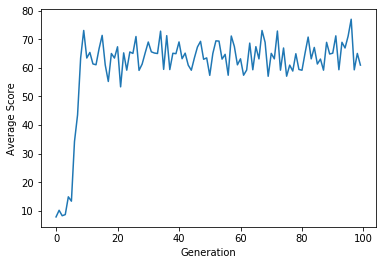

In [21]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[2])
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

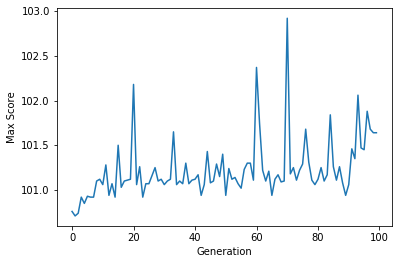

In [22]:
x = []
y = []
for i in range(num_gen):
    x.append(i)
    
for score in allScores:
    y.append(score[1])

plt.xlabel('Generation')
plt.ylabel('Max Score')
plt.plot(x, y)
plt.show()

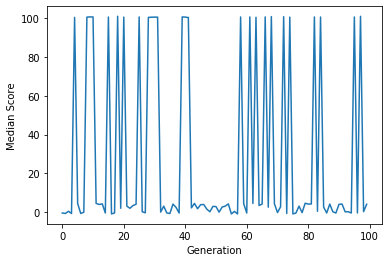

In [23]:
x = []
y = []
for i in range(num_gen):
    x.append(i)
    
for score in allScores:
    y.append(score[3])

plt.xlabel('Generation')
plt.ylabel('Median Score')
plt.plot(x, y)
plt.show()

## Diagnostics

In [24]:
# find all q values that correspond to given team
def find_team_q (q_table, team):
    result = []  
    for entry in q_table.q:
        if entry['team'] == str(team.id):
            result.append(entry)
    return result

# TODO better organize this for quicker analysis
def display_q (result):
    for entry in result:
        print(entry)

In [25]:
# run a given team after training
def post_training_run (env_name, team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    actions = []
    learners = []
    states = []
    #print(states)
    states.append(env.current_state)
    learners.append(l_t)
    actions.append(a_t)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        learners.append(l_t)
        actions.append(a_t)
        total_reward += reward
        if isDone:
            return states, actions, learners, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        #print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        if l_t.id != l_next.id:
            #print('Switching Learners!')
            #print('Learner: ' + str(l_next.id))
            update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, actions, learners, total_reward

In [26]:
from tpg.agent import loadAgent
def load_champion(agent_path):
    agent = loadAgent(agent_path)
    agent.configFunctionsSelf()
    print(agent.team)
    return agent.team

In [27]:
# champ = '41';
# champ = load_champion('champions/'+champ+'.pk1')

run = 5
gen = 80
file_name = 'saved-runs/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_'+str(goalReached)+'_'+str(teamPopSize)+'_'+str(pActAtom)+'_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+str(nActRegisters)+'_'+str(initMaxActProgSize)+'_'+str(initMaxTeamSize)+'_'+str(maxTeamSize)+'_'+str(gap)+'_'+str(pLrnDel)+'_'+str(pLrnAdd)+'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+'_'+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_'+str(run)+'_'+str(gen)+'.pk1'
print(file_name)
champ = load_champion(file_name)

state = env.reset()
visited = []
visited.append(state)
print(state)
score = 0

for i in range(50):
    act = champ.act(state, visited)
    state, reward, isDone = env.step(act)
    visited.append(state)
    score += reward
    print(score)
print(score)

#print(runAgent([agent, envName, scoreList, 10, 100, gen, env]))

# #print(champ.q_table)
# for q_value in champ.q_table:
#     print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

# print('\n\n\n')
# for i in range(10):
#     print('Run: ' + str(i) + ' -----')
#     states, actions, learners, score = post_training_run(envName, champ, epsilon, alpha, discount)
#     print(score)
#     for j in range(len(states)):
#         print(str(states[j]) + '  Action: ' + str(actions[j]) + ' Learner: ' + str(learners[j].id))
#     print('\n\n')
# #print(champ.q_table)
# print('\n\n\n')
# for q_value in champ.q_table:
#     print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

saved-runs/fig11_20_0.1_-0.01_-0.01_-0.01_100_50_1.0_4_24_0_0_2_4_0.5_0.3_0.2_0.7_0.5_0.0_0.5_0.5_0.5_0.5_0_0.1_0.05_0.45_5_80.pk1
(4, 0)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
%matplotlib notebook
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
x = [0, 1, 2]
y = [0, 1, 2]

lines = plt.plot([], 'bo')
line = lines[0]

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def animate(frame):
    #line.set_data((0, 1), (states[frame][1], states[frame][0]))
#     obs_x = [1]
#     obs_y = [1]
#     plt.plot(obs_x, obs_y, 'ro')
    # obstacles
    obs_x = [2, 1, 2, 1, 2, 3, 3]
    obs_y = [0, 1, 1, 3, 3, 3, 4]
    # win state
    win_x = [2]
    win_y = [4]
    # the animated trajectory
    #plt.cla()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    traj_x = []
    traj_y = []
    for i in range(frame+1):
        traj_x.append(states[i][0])
        traj_y.append(states[i][1])
    # plot all of the points
    plt.plot(obs_x, obs_y, 'ro')
    plt.plot(win_x, win_y, 'go')
    plt.plot(traj_x, traj_y, 'b-')
    plt.plot(states[frame][0], states[frame][1], 'yo')
        
#anim = FuncAnimation(fig, animate, frames = len(states), interval = 1000)
#plt.grid(alpha=1)
#plt.show()